In [1]:
#import required packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 500
from scipy.stats import skew
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.model_selection import train_test_split as sklearn_train_test_split
import statsmodels.api as sm
from pandas import to_datetime
import math
import itertools
import scipy.stats as stats

import datetime
from datetime import datetime



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [2]:
milk_prices = pd.read_csv("EU_Milk_Prices_1.1.csv", encoding= 'unicode_escape')

In [3]:
df_dairy = pd.read_csv("Dairy_Production_EU.csv", encoding= 'unicode_escape')

In [4]:
df_dairy.head(10000)

Member State Member State Code  \
0         Austria                AT   
1         Austria                AT   
2         Austria                AT   
3         Austria                AT   
4         Austria                AT   
...           ...               ...   
9995        Italy                IT   
9996        Italy                IT   
9997        Italy                IT   
9998        Italy                IT   
9999        Italy                IT   

                                               Category  Year    Month  \
0                   Acidified milk (yoghurts and other)  2022  January   
1     Butter, incl. dehydrated butter and ghee, and ...  2022  January   
2                          Cheese from cows'milk (pure)  2022  January   
3                          Cream for direct consumption  2022  January   
4                                         Drinking milk  2022  January   
...                                                 ...   ...      ...   
9995                                      Drinking milk  2019  January   
9996  Milk and cream powders, excluding skimmed milk...  2019  January   
9997  Raw cream delivered to dairies (in milk equiva...  2019  January   
9998                                Skimmed milk powder  2019  January   
9999          Total raw cow's milk delivered to dairies  2019  January   

     Thousand tonnes  
0              19.56  
1               3.32  
2              18.37  
3               5.37  
4              65.14  
...              ...  
9995          208.20  
9996            0.00  
9997           61.60  
9998            0.00  
9999        1,013.52  

[10000 rows x 6 columns]

In [5]:
milk_prices.head(100)

Year Month    Member State           Product  Begin Date    End Date  \
0   2022   Jan  European Union          Raw milk  01/01/2022  31/01/2022   
1   2022   Jan         Belgium  Organic raw milk  01/01/2022  31/01/2022   
2   2022   Jan         Belgium          Raw milk  01/01/2022  31/01/2022   
3   2022   Jan        Bulgaria  Organic raw milk  01/01/2022  31/01/2022   
4   2022   Jan        Bulgaria          Raw milk  01/01/2022  31/01/2022   
5   2022   Jan         Czechia  Organic raw milk  01/01/2022  31/01/2022   
6   2022   Jan         Czechia          Raw milk  01/01/2022  31/01/2022   
7   2022   Jan         Denmark  Organic raw milk  01/01/2022  31/01/2022   
8   2022   Jan         Denmark          Raw milk  01/01/2022  31/01/2022   
9   2022   Jan         Germany  Organic raw milk  01/01/2022  31/01/2022   
10  2022   Jan         Germany          Raw milk  01/01/2022  31/01/2022   
11  2022   Jan         Estonia  Organic raw milk  01/01/2022  31/01/2022   
12  2022   Jan         Estonia          Raw milk  01/01/2022  31/01/2022   
13  2022   Jan         Ireland          Raw milk  01/01/2022  31/01/2022   
14  2022   Jan          Greece  Organic raw milk  01/01/2022  31/01/2022   
15  2022   Jan          Greece          Raw milk  01/01/2022  31/01/2022   
16  2022   Jan           Spain  Organic raw milk  01/01/2022  31/01/2022   
17  2022   Jan           Spain          Raw milk  01/01/2022  31/01/2022   
18  2022   Jan          France  Organic raw milk  01/01/2022  31/01/2022   
19  2022   Jan          France          Raw milk  01/01/2022  31/01/2022   
20  2022   Jan         Croatia          Raw milk  01/01/2022  31/01/2022   
21  2022   Jan           Italy  Organic raw milk  01/01/2022  31/01/2022   
22  2022   Jan           Italy          Raw milk  01/01/2022  31/01/2022   
23  2022   Jan          Cyprus  Organic raw milk  01/01/2022  31/01/2022   
24  2022   Jan          Cyprus          Raw milk  01/01/2022  31/01/2022   
25  2022   Jan          Latvia  Organic raw milk  01/01/2022  31/01/2022   
26  2022   Jan          Latvia          Raw milk  01/01/2022  31/01/2022   
27  2022   Jan       Lithuania  Organic raw milk  01/01/2022  31/01/2022   
28  2022   Jan       Lithuania          Raw milk  01/01/2022  31/01/2022   
29  2022   Jan         Hungary          Raw milk  01/01/2022  31/01/2022   
30  2022   Jan           Malta          Raw milk  01/01/2022  31/01/2022   
31  2022   Jan     Netherlands  Organic raw milk  01/01/2022  31/01/2022   
32  2022   Jan     Netherlands          Raw milk  01/01/2022  31/01/2022   
33  2022   Jan         Austria  Organic raw milk  01/01/2022  31/01/2022   
34  2022   Jan         Austria          Raw milk  01/01/2022  31/01/2022   
35  2022   Jan          Poland  Organic raw milk  01/01/2022  31/01/2022   
36  2022   Jan          Poland          Raw milk  01/01/2022  31/01/2022   
37  2022   Jan        Portugal  Organic raw milk  01/01/2022  31/01/2022   
38  2022   Jan        Portugal          Raw milk  01/01/2022  31/01/2022   
39  2022   Jan         Romania          Raw milk  01/01/2022  31/01/2022   
40  2022   Jan        Slovenia  Organic raw milk  01/01/2022  31/01/2022   
41  2022   Jan        Slovenia          Raw milk  01/01/2022  31/01/2022   
42  2022   Jan        Slovakia  Organic raw milk  01/01/2022  31/01/2022   
43  2022   Jan        Slovakia          Raw milk  01/01/2022  31/01/2022   
44  2022   Jan         Finland          Raw milk  01/01/2022  31/01/2022   
45  2022   Jan          Sweden  Organic raw milk  01/01/2022  31/01/2022   
46  2022   Jan          Sweden          Raw milk  01/01/2022  31/01/2022   
47  2022   Feb  European Union          Raw milk  01/02/2022  28/02/2022   
48  2022   Feb         Belgium  Organic raw milk  01/02/2022  28/02/2022   
49  2022   Feb         Belgium          Raw milk  01/02/2022  28/02/2022   
50  2022   Feb        Bulgaria  Organic raw milk  01/02/2022  28/02/2022   
51  2022   Feb        Bulgaria          Raw milk  01

Checking to see if there any null values are present to develop a better understanding of the dataset. Null values can often create noise that will obscure the signal in dataset that is used for machine learning algorithm training. In this case the there are no null values in either datasets.

In [6]:
df_dairy.isnull().sum()

Member State         0
Member State Code    0
Category             0
Year                 0
Month                0
Thousand tonnes      0
dtype: int64

In [7]:
milk_prices.isnull().sum()

Year                 0
Month                0
Member State         0
Product              0
Begin Date           0
End Date             0
Price(Euro/100kg)    0
dtype: int64

In [8]:
df_dairy.head()

Member State Member State Code  \
0      Austria                AT   
1      Austria                AT   
2      Austria                AT   
3      Austria                AT   
4      Austria                AT   

                                            Category  Year    Month  \
0                Acidified milk (yoghurts and other)  2022  January   
1  Butter, incl. dehydrated butter and ghee, and ...  2022  January   
2                       Cheese from cows'milk (pure)  2022  January   
3                       Cream for direct consumption  2022  January   
4                                      Drinking milk  2022  January   

  Thousand tonnes  
0           19.56  
1            3.32  
2           18.37  
3            5.37  
4           65.14

In [9]:
df_dairy.head(10000)

Member State Member State Code  \
0         Austria                AT   
1         Austria                AT   
2         Austria                AT   
3         Austria                AT   
4         Austria                AT   
...           ...               ...   
9995        Italy                IT   
9996        Italy                IT   
9997        Italy                IT   
9998        Italy                IT   
9999        Italy                IT   

                                               Category  Year    Month  \
0                   Acidified milk (yoghurts and other)  2022  January   
1     Butter, incl. dehydrated butter and ghee, and ...  2022  January   
2                          Cheese from cows'milk (pure)  2022  January   
3                          Cream for direct consumption  2022  January   
4                                         Drinking milk  2022  January   
...                                                 ...   ...      ...   
9995                                      Drinking milk  2019  January   
9996  Milk and cream powders, excluding skimmed milk...  2019  January   
9997  Raw cream delivered to dairies (in milk equiva...  2019  January   
9998                                Skimmed milk powder  2019  January   
9999          Total raw cow's milk delivered to dairies  2019  January   

     Thousand tonnes  
0              19.56  
1               3.32  
2              18.37  
3               5.37  
4              65.14  
...              ...  
9995          208.20  
9996            0.00  
9997           61.60  
9998            0.00  
9999        1,013.52  

[10000 rows x 6 columns]

In [10]:
df_dairy.isnull().sum()

Member State         0
Member State Code    0
Category             0
Year                 0
Month                0
Thousand tonnes      0
dtype: int64

Gaining further understaning by accessing what datatype the columns are stored in to access what columns may or may not require conversion. For example training and testing in a numeric based regression model will require numeric datatypes. The info() function reveals that all columns except year are object datatype columns that contain string values. Any values containing '0' will have to be treated before machine learning training.

In [11]:
df_dairy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15550 entries, 0 to 15549
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Member State       15550 non-null  object
 1   Member State Code  15550 non-null  object
 2   Category           15550 non-null  object
 3   Year               15550 non-null  int64 
 4   Month              15550 non-null  object
 5   Thousand tonnes    15550 non-null  object
dtypes: int64(1), object(5)
memory usage: 729.0+ KB


In [12]:
milk_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7191 non-null   int64  
 1   Month              7191 non-null   object 
 2   Member State       7191 non-null   object 
 3   Product            7191 non-null   object 
 4   Begin Date         7191 non-null   object 
 5   End Date           7191 non-null   object 
 6   Price(Euro/100kg)  7191 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 393.4+ KB


Retrieving a count to assesss the overall amount of data that could potentially be used for training & testing as machine learn models generally perform better when trained with a greater amount of data.

In [13]:
df_dairy.count()

Member State         15550
Member State Code    15550
Category             15550
Year                 15550
Month                15550
Thousand tonnes      15550
dtype: int64

In [14]:
milk_prices.count()

Year                 7191
Month                7191
Member State         7191
Product              7191
Begin Date           7191
End Date             7191
Price(Euro/100kg)    7191
dtype: int64

Columns 'Begin Date' & 'End Date' are not relevant the project as the dataset already possesses a date value for the rows that is more relevant.

In [15]:
milk_prices_2 = milk_prices.drop(columns=['Begin Date', 'End Date'])

In [16]:
milk_prices_3 = milk_prices_2.copy()

In [17]:
milk_prices_3.head()

Year Month    Member State           Product  Price(Euro/100kg)
0  2022   Jan  European Union          Raw milk               41.8
1  2022   Jan         Belgium  Organic raw milk               48.1
2  2022   Jan         Belgium          Raw milk               45.1
3  2022   Jan        Bulgaria  Organic raw milk               47.5
4  2022   Jan        Bulgaria          Raw milk               37.6

In [18]:
df_dairy_sample = df_dairy.copy()

In [19]:
df_dairy_sample.head()

Member State Member State Code  \
0      Austria                AT   
1      Austria                AT   
2      Austria                AT   
3      Austria                AT   
4      Austria                AT   

                                            Category  Year    Month  \
0                Acidified milk (yoghurts and other)  2022  January   
1  Butter, incl. dehydrated butter and ghee, and ...  2022  January   
2                       Cheese from cows'milk (pure)  2022  January   
3                       Cream for direct consumption  2022  January   
4                                      Drinking milk  2022  January   

  Thousand tonnes  
0           19.56  
1            3.32  
2           18.37  
3            5.37  
4           65.14

In [20]:
df_dairy_sample.drop(df_dairy_sample.index[(df_dairy_sample["Category"] != "Drinking milk")], axis=0, inplace=True)

In [21]:
df_dairy_sample.head()

Member State Member State Code       Category  Year     Month  \
4       Austria                AT  Drinking milk  2022   January   
14      Austria                AT  Drinking milk  2022  February   
24      Austria                AT  Drinking milk  2022     March   
34      Austria                AT  Drinking milk  2022     April   
44      Austria                AT  Drinking milk  2022       May   

   Thousand tonnes  
4            65.14  
14           60.72  
24           69.94  
34           65.33  
44           67.70

In [22]:
df_dairy_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 4 to 15547
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Member State       1513 non-null   object
 1   Member State Code  1513 non-null   object
 2   Category           1513 non-null   object
 3   Year               1513 non-null   int64 
 4   Month              1513 non-null   object
 5   Thousand tonnes    1513 non-null   object
dtypes: int64(1), object(5)
memory usage: 82.7+ KB


In [23]:
df_dairy_sample["Thousand tonnes"] = df_dairy_sample["Thousand tonnes"].str.replace(r',', '').astype(float)

In [24]:
df_dairy_sample.head()

Member State Member State Code       Category  Year     Month  \
4       Austria                AT  Drinking milk  2022   January   
14      Austria                AT  Drinking milk  2022  February   
24      Austria                AT  Drinking milk  2022     March   
34      Austria                AT  Drinking milk  2022     April   
44      Austria                AT  Drinking milk  2022       May   

    Thousand tonnes  
4             65.14  
14            60.72  
24            69.94  
34            65.33  
44            67.70

In [25]:
milk_prices_3.drop(milk_prices_3.index[(milk_prices_3["Product"] != "Raw milk")], axis=0, inplace=True)

milk_prices_3.drop(milk_prices_3.index[(milk_prices_3["Member State"] == "Ireland")], axis=0, inplace=True)

In [26]:
milk_prices_3.head()

Year Month    Member State   Product  Price(Euro/100kg)
0  2022   Jan  European Union  Raw milk               41.8
2  2022   Jan         Belgium  Raw milk               45.1
4  2022   Jan        Bulgaria  Raw milk               37.6
6  2022   Jan         Czechia  Raw milk               39.8
8  2022   Jan         Denmark  Raw milk               43.7

In [27]:
milk_prices_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6768 entries, 0 to 7190
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6768 non-null   int64  
 1   Month              6768 non-null   object 
 2   Member State       6768 non-null   object 
 3   Product            6768 non-null   object 
 4   Price(Euro/100kg)  6768 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 317.2+ KB


In [28]:
milk_prices_3["Price(Euro/100kg)"] = milk_prices_3["Price(Euro/100kg)"].astype(float)

Considering that organic raw milk does not contain records as far back as 2018, the project scope will focus on analysing the connection dairy production and raw milk

In [29]:
milk_prices_2.drop(milk_prices.index[(milk_prices["Product"] == "Organic raw milk")], axis=0, inplace=True)

Preparing a new dataset to isolate records pertaining to Ireland.

In [30]:
milk_prices_ireland = milk_prices_2.copy()

In [31]:
milk_prices_ireland.drop(milk_prices_ireland.index[(milk_prices_ireland["Member State"] != "Ireland")], axis=0, inplace=True)

In [32]:
milk_prices_ireland_testing = milk_prices_ireland

In [33]:
milk_prices_ireland.count()

Year                 213
Month                213
Member State         213
Product              213
Price(Euro/100kg)    213
dtype: int64

In [34]:
milk_prices_ireland.head()

Year Month Member State   Product  Price(Euro/100kg)
13   2022   Jan      Ireland  Raw milk               46.0
60   2022   Feb      Ireland  Raw milk               47.6
107  2022   Mar      Ireland  Raw milk               49.0
153  2022   Apr      Ireland  Raw milk               51.3
200  2022   May      Ireland  Raw milk               53.6

Due to the removal of data, the indexes of the dataset have become cluttered. These will be reset to count from 0 to 212.

In [35]:
milk_prices_ireland.reset_index(drop=True, inplace=True)

In [36]:
milk_prices_ireland.head()

Year Month Member State   Product  Price(Euro/100kg)
0  2022   Jan      Ireland  Raw milk               46.0
1  2022   Feb      Ireland  Raw milk               47.6
2  2022   Mar      Ireland  Raw milk               49.0
3  2022   Apr      Ireland  Raw milk               51.3
4  2022   May      Ireland  Raw milk               53.6

In [37]:
milk_prices_ireland.tail()

Year Month Member State   Product  Price(Euro/100kg)
208  2005   Aug      Ireland  Raw milk               27.4
209  2005   Sep      Ireland  Raw milk               28.3
210  2005   Oct      Ireland  Raw milk               30.7
211  2005   Nov      Ireland  Raw milk               30.5
212  2005   Dec      Ireland  Raw milk               29.7

In [38]:
df_dairy.head()

Member State Member State Code  \
0      Austria                AT   
1      Austria                AT   
2      Austria                AT   
3      Austria                AT   
4      Austria                AT   

                                            Category  Year    Month  \
0                Acidified milk (yoghurts and other)  2022  January   
1  Butter, incl. dehydrated butter and ghee, and ...  2022  January   
2                       Cheese from cows'milk (pure)  2022  January   
3                       Cream for direct consumption  2022  January   
4                                      Drinking milk  2022  January   

  Thousand tonnes  
0           19.56  
1            3.32  
2           18.37  
3            5.37  
4           65.14

In [39]:
df_dairy_2 = df_dairy.drop(columns=['Member State Code'])

'Member State' Code is redudant to analysis as member state is already defined  in the column 'Member State' so therefore 'Member State Code' will be removed.

In [40]:
df_dairy_2.head()

Member State                                           Category  Year  \
0      Austria                Acidified milk (yoghurts and other)  2022   
1      Austria  Butter, incl. dehydrated butter and ghee, and ...  2022   
2      Austria                       Cheese from cows'milk (pure)  2022   
3      Austria                       Cream for direct consumption  2022   
4      Austria                                      Drinking milk  2022   

     Month Thousand tonnes  
0  January           19.56  
1  January            3.32  
2  January           18.37  
3  January            5.37  
4  January           65.14

Preparing a new dataset to isolate records pertaining to Ireland to examine Ireland's dairy production data.

In [41]:
df_dairy_ireland = df_dairy_2.copy()

Drop member states that are not equal to Ireland.

In [42]:
df_dairy_ireland.drop(df_dairy_ireland.index[(df_dairy_ireland["Member State"] != "Ireland")], axis=0, inplace=True)

In [43]:
df_dairy_ireland.head(15)

Member State                                           Category  Year  \
9144      Ireland                Acidified milk (yoghurts and other)  2022   
9145      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
9146      Ireland                                  Concentrated milk  2022   
9147      Ireland                       Cream for direct consumption  2022   
9148      Ireland                                      Drinking milk  2022   
9149      Ireland  Milk and cream powders, excluding skimmed milk...  2022   
9150      Ireland  Raw cream delivered to dairies (in milk equiva...  2022   
9151      Ireland                                Skimmed milk powder  2022   
9152      Ireland          Total raw cow's milk delivered to dairies  2022   
9153      Ireland                Acidified milk (yoghurts and other)  2022   
9154      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
9155      Ireland                                  Concentrated milk  2022   
9156      Ireland                       Cream for direct consumption  2022   
9157      Ireland                                      Drinking milk  2022   
9158      Ireland  Milk and cream powders, excluding skimmed milk...  2022   

         Month Thousand tonnes  
9144   January            0.00  
9145   January            6.71  
9146   January            0.00  
9147   January            2.14  
9148   January           42.03  
9149   January            0.00  
9150   January            0.00  
9151   January            5.21  
9152   January          188.70  
9153  February            0.00  
9154  February           11.62  
9155  February            0.00  
9156  February            1.72  
9157  February           39.07  
9158  February            0.00

In [44]:
df_dairy_2.count()

Member State       15550
Category           15550
Year               15550
Month              15550
Thousand tonnes    15550
dtype: int64

In [45]:
df_dairy_ireland.count()

Member State       484
Category           484
Year               484
Month              484
Thousand tonnes    484
dtype: int64

A total of 15,016 columns were dropped to isolate Ireland's dairy production data

Resetting the index to count from 0 to 484

In [46]:
df_dairy_ireland.reset_index(drop=True, inplace=True)

In [47]:
df_dairy_ireland.head(50)

Member State                                           Category  Year  \
0       Ireland                Acidified milk (yoghurts and other)  2022   
1       Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
2       Ireland                                  Concentrated milk  2022   
3       Ireland                       Cream for direct consumption  2022   
4       Ireland                                      Drinking milk  2022   
5       Ireland  Milk and cream powders, excluding skimmed milk...  2022   
6       Ireland  Raw cream delivered to dairies (in milk equiva...  2022   
7       Ireland                                Skimmed milk powder  2022   
8       Ireland          Total raw cow's milk delivered to dairies  2022   
9       Ireland                Acidified milk (yoghurts and other)  2022   
10      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
11      Ireland                                  Concentrated milk  2022   
12      Ireland                       Cream for direct consumption  2022   
13      Ireland                                      Drinking milk  2022   
14      Ireland  Milk and cream powders, excluding skimmed milk...  2022   
15      Ireland  Raw cream delivered to dairies (in milk equiva...  2022   
16      Ireland                                Skimmed milk powder  2022   
17      Ireland          Total raw cow's milk delivered to dairies  2022   
18      Ireland                Acidified milk (yoghurts and other)  2022   
19      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
20      Ireland                                  Concentrated milk  2022   
21      Ireland                       Cream for direct consumption  2022   
22      Ireland                                      Drinking milk  2022   
23      Ireland  Milk and cream powders, excluding skimmed milk...  2022   
24      Ireland  Raw cream delivered to dairies (in milk equiva...  2022   
25      Ireland                                Skimmed milk powder  2022   
26      Ireland          Total raw cow's milk delivered to dairies  2022   
27      Ireland                Acidified milk (yoghurts and other)  2022   
28      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
29      Ireland                                  Concentrated milk  2022   
30      Ireland                       Cream for direct consumption  2022   
31      Ireland                                      Drinking milk  2022   
32      Ireland  Milk and cream powders, excluding skimmed milk...  2022   
33      Ireland  Raw cream delivered to dairies (in milk equiva...  2022   
34      Ireland                                Skimmed milk powder  2022   
35      Ireland          Total raw cow's milk delivered to dairies  2022   
36      Ireland                Acidified milk (yoghurts and other)  2022   
37      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
38      Ireland                                  Concentrated milk  2022   
39      Ireland                       Cream for direct consumption  2022   
40      Ireland                                      Drinking milk  2022   
41      Ireland  Milk and cream powders, excluding skimmed milk...  2022   
42      Ireland  Raw cream delivered to dairies (in milk equiva...  2022   
43      Ireland                                Skimmed milk powder  2022   
44      Ireland          Total raw cow's milk delivered to dairies  2022   
45      Ireland                Acidified milk (yoghurts and other)  2022   
46      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
47      Ireland                                  Concentrated milk  2022   
48      Ireland                       Cream for direct consumption  2022   
49      Ireland                                      Drinking milk  2022   

       Month Thousand tonnes  
0    January            0.00  
1    January            6.71  
2    January            0.00  
3 

In [48]:
df_dairy_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member State     484 non-null    object
 1   Category         484 non-null    object
 2   Year             484 non-null    int64 
 3   Month            484 non-null    object
 4   Thousand tonnes  484 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.0+ KB


In order to interact with numeric data it is necessary to convert it from a string format to a float format to find correlation

Create a dataframe and pop

In [49]:
df_dairy_ireland.head()

Member State                                           Category  Year  \
0      Ireland                Acidified milk (yoghurts and other)  2022   
1      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
2      Ireland                                  Concentrated milk  2022   
3      Ireland                       Cream for direct consumption  2022   
4      Ireland                                      Drinking milk  2022   

     Month Thousand tonnes  
0  January            0.00  
1  January            6.71  
2  January            0.00  
3  January            2.14  
4  January           42.03

Create and populate a list with the months contained in 'df_dairy_ireland'

In [50]:
df_month = df_dairy_ireland["Month"]

In [51]:
df_month.head()

0    January
1    January
2    January
3    January
4    January
Name: Month, dtype: object

Create lists for each month to assign a boolean variable for it contains that month it is assigned to.

In [52]:
jan = df_month.str.contains("January")
feb = df_month.str.contains("February")
mar = df_month.str.contains("March")
apr = df_month.str.contains("April")
may = df_month.str.contains("May")
jun = df_month.str.contains("June")
jul = df_month.str.contains("July")
aug = df_month.str.contains("August")
sep = df_month.str.contains("September")
octo = df_month.str.contains("October")
nov = df_month.str.contains("November")
dec = df_month.str.contains("December")

In [53]:
jan

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

Assign number value to where in the list equals true. For January, where 'True' assign '1'. For February where 'True' assign '2' etc.

In [54]:
df_dairy_ireland["Month"] = np.where(jan, "1", np.where(feb, "2", np.where(mar, "3", 
               np.where(apr, "4", np.where(may, "5", np.where(jun, "6",
                 np.where(jul, "7", np.where(aug, "8", np.where(sep, "9", 
                    np.where(octo, "10", np.where(nov, "11", np.where(dec, "12",
                df_month.str.replace("-","")))))))))))))

Convert string values for 'Month' into integers

In [55]:
df_dairy_ireland["Month"] = df_dairy_ireland["Month"].astype(int)

Create a date column using the 'Month' and 'Year' columns and convert it to a datetime data type. Assign the '+' operator to differentiate the column from the date column contained in the prices dataframe. This will allow for the targetting of these data columns for removal after the rows have been matched with the corresponding rows contained in the prices dataset.

In [56]:
df_dairy_ireland['Date+'] = pd.to_datetime(df_dairy_ireland[['Year','Month']].assign(Day=1))

In [57]:
df_dairy_ireland.head()

Member State                                           Category  Year  \
0      Ireland                Acidified milk (yoghurts and other)  2022   
1      Ireland  Butter, incl. dehydrated butter and ghee, and ...  2022   
2      Ireland                                  Concentrated milk  2022   
3      Ireland                       Cream for direct consumption  2022   
4      Ireland                                      Drinking milk  2022   

   Month Thousand tonnes      Date+  
0      1            0.00 2022-01-01  
1      1            6.71 2022-01-01  
2      1            0.00 2022-01-01  
3      1            2.14 2022-01-01  
4      1           42.03 2022-01-01

Drop 'Member State','Year','Month' as they are no longer required.

In [58]:
df_dairy_ireland_2 = df_dairy_ireland.drop(columns=['Member State','Year','Month'])

Create dataframes for each product category thatr are to be used for further analysis and training of machine learning models. This is done to create an individual column for each category and the amount prouduced on the corresponding date. These will then be added to the prices dataframe matching by date. This will grant the ability to see the amount of product produced for a given month and the price of raw milk for that month.

In [59]:
df_dairy_ireland_drinking_milk = df_dairy_ireland_2.copy()

In [60]:
df_dairy_ireland_total_raw_cow_milk = df_dairy_ireland_2.copy()

In [61]:
df_dairy_ireland_skimmed_milk_powder = df_dairy_ireland_2.copy()

In [62]:
df_dairy_ireland_cream_for_direct_consumption = df_dairy_ireland_2.copy()

In [63]:
df_dairy_ireland_butter = df_dairy_ireland_2.copy()

In [64]:
df_dairy_ireland_2.head()

Category Thousand tonnes  \
0                Acidified milk (yoghurts and other)            0.00   
1  Butter, incl. dehydrated butter and ghee, and ...            6.71   
2                                  Concentrated milk            0.00   
3                       Cream for direct consumption            2.14   
4                                      Drinking milk           42.03   

       Date+  
0 2022-01-01  
1 2022-01-01  
2 2022-01-01  
3 2022-01-01  
4 2022-01-01

# Drinking milk

Isolating the product category into the correct dataframe. This is repeated for 5 product categories that have been chosen for modelling. Due to the removal for rows from the dataframe, indexes sorting is required to correctly sort the index.

In [65]:
df_dairy_ireland_drinking_milk.drop(df_dairy_ireland_drinking_milk.index[(df_dairy_ireland_drinking_milk.Category != "Drinking milk")], axis=0, inplace=True)

In [66]:
df_dairy_ireland_drinking_milk.reset_index(drop=True, inplace=True)

In [67]:
df_dairy_ireland_drinking_milk = df_dairy_ireland_drinking_milk.rename(columns={"Thousand tonnes": "Drinking Milk (TT)"})

In [68]:
df_dairy_ireland_drinking_milk.head()

Category Drinking Milk (TT)      Date+
0  Drinking milk              42.03 2022-01-01
1  Drinking milk              39.07 2022-02-01
2  Drinking milk              44.51 2022-03-01
3  Drinking milk              44.57 2022-04-01
4  Drinking milk              47.81 2022-05-01

# raw_cow_milk

In [69]:
df_dairy_ireland_total_raw_cow_milk.drop(df_dairy_ireland_total_raw_cow_milk.index[(df_dairy_ireland_total_raw_cow_milk.Category != "Total raw cow's milk delivered to dairies")], axis=0, inplace=True)

In [70]:
df_dairy_ireland_total_raw_cow_milk.reset_index(drop=True, inplace=True)

In [71]:
df_dairy_ireland_total_raw_cow_milk = df_dairy_ireland_total_raw_cow_milk.rename(columns={"Thousand tonnes": "Raw Milk (TT)"})

In [72]:
df_dairy_ireland_total_raw_cow_milk.head()

Category Raw Milk (TT)      Date+
0  Total raw cow's milk delivered to dairies        188.70 2022-01-01
1  Total raw cow's milk delivered to dairies        378.36 2022-02-01
2  Total raw cow's milk delivered to dairies        832.64 2022-03-01
3  Total raw cow's milk delivered to dairies      1,085.93 2022-04-01
4  Total raw cow's milk delivered to dairies      1,200.57 2022-05-01

# skimmed_milk_powder

In [73]:
df_dairy_ireland_skimmed_milk_powder.drop(df_dairy_ireland_skimmed_milk_powder.index[(df_dairy_ireland_skimmed_milk_powder.Category != "Skimmed milk powder")], axis=0, inplace=True)

In [74]:
df_dairy_ireland_skimmed_milk_powder.reset_index(drop=True, inplace=True)

In [75]:
df_dairy_ireland_skimmed_milk_powder.head(50)

Category Thousand tonnes      Date+
0   Skimmed milk powder            5.21 2022-01-01
1   Skimmed milk powder            3.42 2022-02-01
2   Skimmed milk powder            9.72 2022-03-01
3   Skimmed milk powder           21.74 2022-04-01
4   Skimmed milk powder           28.26 2022-05-01
5   Skimmed milk powder           26.19 2022-06-01
6   Skimmed milk powder           22.06 2022-07-01
7   Skimmed milk powder           16.92 2022-08-01
8   Skimmed milk powder           13.15 2022-09-01
9   Skimmed milk powder           11.36 2021-03-01
10  Skimmed milk powder           17.69 2021-04-01
11  Skimmed milk powder           27.69 2021-05-01
12  Skimmed milk powder           19.34 2021-06-01
13  Skimmed milk powder           17.06 2021-07-01
14  Skimmed milk powder           16.35 2021-08-01
15  Skimmed milk powder           11.13 2021-09-01
16  Skimmed milk powder            5.46 2021-10-01
17  Skimmed milk powder            7.40 2021-12-01
18  Skimmed milk powder            2.80 2020-02-01
19  Skimmed milk powder            7.27 2020-03-01
20  Skimmed milk powder           18.87 2020-04-01
21  Skimmed milk powder           24.60 2020-05-01
22  Skimmed milk powder           20.14 2020-06-01
23  Skimmed milk powder           20.29 2020-07-01
24  Skimmed milk powder           17.76 2020-08-01
25  Skimmed milk powder           12.51 2020-09-01
26  Skimmed milk powder            8.27 2020-10-01
27  Skimmed milk powder            5.24 2019-01-01
28  Skimmed milk powder            5.77 2019-03-01
29  Skimmed milk powder           21.41 2019-04-01
30  Skimmed milk powder           24.20 2019-05-01
31  Skimmed milk powder           18.43 2019-06-01
32  Skimmed milk powder           19.09 2019-07-01
33  Skimmed milk powder           12.29 2019-08-01
34  Skimmed milk powder            9.13 2019-09-01
35  Skimmed milk powder            8.58 2019-10-01
36  Skimmed milk powder           10.22 2019-12-01
37  Skimmed milk powder            3.83 2018-01-01
38  Skimmed milk powder            2.68 2018-02-01
39  Skimmed milk powder            7.09 2018-03-01
40  Skimmed milk powder           10.05 2018-04-01
41  Skimmed milk powder           20.37 2018-05-01
42  Skimmed milk powder           18.64 2018-06-01
43  Skimmed milk powder           13.09 2018-07-01
44  Skimmed milk powder           13.55 2018-08-01
45  Skimmed milk powder           11.53 2018-09-01
46  Skimmed milk powder           10.07 2018-10-01
47  Skimmed milk powder           11.65 2018-11-01
48  Skimmed milk powder           11.30 2018-12-01

# df_dairy_ireland_cream_for_direct_consumption

In [76]:
df_dairy_ireland_cream_for_direct_consumption.drop(df_dairy_ireland_cream_for_direct_consumption.index[(df_dairy_ireland_cream_for_direct_consumption.Category != "Cream for direct consumption")], axis=0, inplace=True)

In [77]:
df_dairy_ireland_cream_for_direct_consumption.reset_index(drop=True, inplace=True)

In [78]:
df_dairy_ireland_cream_for_direct_consumption = df_dairy_ireland_cream_for_direct_consumption.rename(columns={"Thousand tonnes": "Cream (TT)"})

In [79]:
df_dairy_ireland_cream_for_direct_consumption.head()

Category Cream (TT)      Date+
0  Cream for direct consumption       2.14 2022-01-01
1  Cream for direct consumption       1.72 2022-02-01
2  Cream for direct consumption       2.52 2022-03-01
3  Cream for direct consumption       2.56 2022-04-01
4  Cream for direct consumption       2.98 2022-05-01

# df_dairy_ireland_butter

In [80]:
df_dairy_ireland_butter.drop(df_dairy_ireland_butter.index[(df_dairy_ireland_butter.Category != "Butter, incl. dehydrated butter and ghee, and other fats and oils derived from milk; dairy spreads")], axis=0, inplace=True)

In [81]:
df_dairy_ireland_butter.reset_index(drop=True, inplace=True)

In [82]:
df_dairy_ireland_butter = df_dairy_ireland_butter.rename(columns={"Thousand tonnes": "Butter (TT)"})

A count is sought for each product category to ensure that all categories have a matching number of rows. Null or zero values would negatively impact the accuracy of the models.

In [83]:
df_dairy_ireland_butter.count()

Category       58
Butter (TT)    58
Date+          58
dtype: int64

In [84]:
df_dairy_ireland_cream_for_direct_consumption.count()

Category      58
Cream (TT)    58
Date+         58
dtype: int64

In [85]:
df_dairy_ireland_skimmed_milk_powder.count()

Category           49
Thousand tonnes    49
Date+              49
dtype: int64

In [86]:
df_dairy_ireland_total_raw_cow_milk.count()

Category         58
Raw Milk (TT)    58
Date+            58
dtype: int64

In [87]:
df_dairy_ireland_drinking_milk.count()

Category              58
Drinking Milk (TT)    58
Date+                 58
dtype: int64

In [88]:
milk_prices_ireland_update = milk_prices_ireland.copy()

In [89]:
milk_prices_ireland_update.count()

Year                 213
Month                213
Member State         213
Product              213
Price(Euro/100kg)    213
dtype: int64

The same process is repeated as before to change the Month and Year columns into a date column.

In [90]:
df_month = milk_prices_ireland_update["Month"]

In [91]:
jan = df_month.str.contains("Jan")
feb = df_month.str.contains("Feb")
mar = df_month.str.contains("Mar")
apr = df_month.str.contains("Apr")
may = df_month.str.contains("May")
jun = df_month.str.contains("Jun")
jul = df_month.str.contains("Jul")
aug = df_month.str.contains("Aug")
sep = df_month.str.contains("Sep")
octo = df_month.str.contains("Oct")
nov = df_month.str.contains("Nov")
dec = df_month.str.contains("Dec")

In [92]:
milk_prices_ireland_update["Month"] = np.where(jan, "1", np.where(feb, "2", np.where(mar, "3", 
               np.where(apr, "4", np.where(may, "5", np.where(jun, "6",
                 np.where(jul, "7", np.where(aug, "8", np.where(sep, "9", 
                    np.where(octo, "10", np.where(nov, "11", np.where(dec, "12",
                df_month.str.replace("-","")))))))))))))

In [93]:
milk_prices_ireland_update['Date'] = pd.to_datetime(milk_prices_ireland_update[['Year','Month']].assign(Day=1))

In [94]:
milk_prices_ireland_update.head()

Year Month Member State   Product  Price(Euro/100kg)       Date
0  2022     1      Ireland  Raw milk               46.0 2022-01-01
1  2022     2      Ireland  Raw milk               47.6 2022-02-01
2  2022     3      Ireland  Raw milk               49.0 2022-03-01
3  2022     4      Ireland  Raw milk               51.3 2022-04-01
4  2022     5      Ireland  Raw milk               53.6 2022-05-01

In [95]:
milk_prices_ireland_update = milk_prices_ireland_update.rename(columns={"Price(Euro/100kg)": " Raw Milk - Price(Euro/100kg) (TT)"})

In [96]:
milk_prices_ireland_update.head()

Year Month Member State   Product   Raw Milk - Price(Euro/100kg) (TT)  \
0  2022     1      Ireland  Raw milk                                46.0   
1  2022     2      Ireland  Raw milk                                47.6   
2  2022     3      Ireland  Raw milk                                49.0   
3  2022     4      Ireland  Raw milk                                51.3   
4  2022     5      Ireland  Raw milk                                53.6   

        Date  
0 2022-01-01  
1 2022-02-01  
2 2022-03-01  
3 2022-04-01  
4 2022-05-01

In [97]:
milk_prices_ireland_update_2 = milk_prices_ireland_update.copy()

As a column for the raw milk product and price has been created, the 'Product' column is no longer is required as well as 'Year','Month','Member State'.

In [98]:
milk_prices_ireland_update_3 = milk_prices_ireland_update_2.drop(columns=['Year','Month','Member State','Product'])

In [99]:
milk_prices_ireland_update_3.head()

Raw Milk - Price(Euro/100kg) (TT)       Date
0                                46.0 2022-01-01
1                                47.6 2022-02-01
2                                49.0 2022-03-01
3                                51.3 2022-04-01
4                                53.6 2022-05-01

In [100]:
milk_prices_ireland_update_3.count()

 Raw Milk - Price(Euro/100kg) (TT)    213
Date                                  213
dtype: int64

All columns are merged into a single dataframe so that raw milk price is matching with the dairy category being produced.

In [101]:
df_col_merged = pd.concat([milk_prices_ireland_update_3, df_dairy_ireland_drinking_milk,df_dairy_ireland_total_raw_cow_milk,df_dairy_ireland_cream_for_direct_consumption,df_dairy_ireland_butter], axis=1)

In [102]:
df_col_merged.head()

Raw Milk - Price(Euro/100kg) (TT)       Date       Category  \
0                                46.0 2022-01-01  Drinking milk   
1                                47.6 2022-02-01  Drinking milk   
2                                49.0 2022-03-01  Drinking milk   
3                                51.3 2022-04-01  Drinking milk   
4                                53.6 2022-05-01  Drinking milk   

  Drinking Milk (TT)      Date+                                   Category  \
0              42.03 2022-01-01  Total raw cow's milk delivered to dairies   
1              39.07 2022-02-01  Total raw cow's milk delivered to dairies   
2              44.51 2022-03-01  Total raw cow's milk delivered to dairies   
3              44.57 2022-04-01  Total raw cow's milk delivered to dairies   
4              47.81 2022-05-01  Total raw cow's milk delivered to dairies   

  Raw Milk (TT)      Date+                      Category Cream (TT)  \
0        188.70 2022-01-01  Cream for direct consumption       2.14   
1        378.36 2022-02-01  Cream for direct consumption       1.72   
2        832.64 2022-03-01  Cream for direct consumption       2.52   
3      1,085.93 2022-04-01  Cream for direct consumption       2.56   
4      1,200.57 2022-05-01  Cream for direct consumption       2.98   

       Date+                                           Category Butter (TT)  \
0 2022-01-01  Butter, incl. dehydrated butter and ghee, and ...        6.71   
1 2022-02-01  Butter, incl. dehydrated butter and ghee, and ...       11.62   
2 2022-03-01  Butter, incl. dehydrated butter and ghee, and ...       24.43   
3 2022-04-01  Butter, incl. dehydrated butter and ghee, and ...       29.60   
4 2022-05-01  Butter, incl. dehydrated butter and ghee, and ...       32.01   

       Date+  
0 2022-01-01  
1 2022-02-01  
2 2022-03-01  
3 2022-04-01  
4 2022-05-01

All dates are matching so therefore the 'Date+' columns can be dropped. The category produced columns with amount produced are also matching so therefore the 'Category' columns are no longer required.

In [103]:
df_col_merged_2 = df_col_merged.drop(columns=['Category', 'Date+'])

This method rearranges the columns so that the 'Date' column is the first column as this will be used as the index.

In [104]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [105]:
df_col_merged_3 = swap_columns(df_col_merged_2, ' Raw Milk - Price(Euro/100kg) (TT)', 'Date');

In [106]:
df_col_merged_3.count()

Date                                  213
 Raw Milk - Price(Euro/100kg) (TT)    213
Drinking Milk (TT)                     58
Raw Milk (TT)                          58
Cream (TT)                             58
Butter (TT)                            58
dtype: int64

In [107]:
df_col_merged_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                213 non-null    datetime64[ns]
 1    Raw Milk - Price(Euro/100kg) (TT)  213 non-null    float64       
 2   Drinking Milk (TT)                  58 non-null     object        
 3   Raw Milk (TT)                       58 non-null     object        
 4   Cream (TT)                          58 non-null     object        
 5   Butter (TT)                         58 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.6+ KB


The object columns need to be converted into a float values as the machine learning models being used are regressive and therefore a numeric value. The string ',' denoting the thousand value needs to removed.

In [108]:
df_col_merged_3["Drinking Milk (TT)"] = df_col_merged_3["Drinking Milk (TT)"].astype(float)

In [109]:
df_col_merged_3["Cream (TT)"] = df_col_merged_3["Cream (TT)"].astype(float)

In [110]:
df_col_merged_3['Raw Milk (TT)'] = df_col_merged_3['Raw Milk (TT)'].str.replace(r',', '').astype(float)

In [111]:
df_col_merged_3["Butter (TT)"] = df_col_merged_3["Butter (TT)"].astype(float)

In [112]:
df_col_merged_3.count()

Date                                  213
 Raw Milk - Price(Euro/100kg) (TT)    213
Drinking Milk (TT)                     58
Raw Milk (TT)                          58
Cream (TT)                             58
Butter (TT)                            58
dtype: int64

The data range begins at 2022. To plot this data using time series plots, the order needs to be reversed beginning with the earliest date value.

In [113]:
df_col_merged_3.sort_values(by='Date', inplace = True) 

In [114]:
df_col_merged_3.head()

Date   Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
201 2005-01-01                                29.4                 NaN   
202 2005-02-01                                28.8                 NaN   
203 2005-03-01                                27.8                 NaN   
204 2005-04-01                                27.4                 NaN   
205 2005-05-01                                27.2                 NaN   

     Raw Milk (TT)  Cream (TT)  Butter (TT)  
201            NaN         NaN          NaN  
202            NaN         NaN          NaN  
203            NaN         NaN          NaN  
204            NaN         NaN          NaN  
205            NaN         NaN          NaN

In [115]:
df_col_merged_3.reset_index(drop=True, inplace=True)

The dairy production dataset records only go as far back as January 2018. Therefore the raw milks prices recorded for this data won't serve a role in training the machine learning models as supervised learning will be utilised.

In [116]:
df_col_merged_4 = df_col_merged_3.drop(df_col_merged_3.index[0:155])

In [117]:
df_col_merged_4.head()

Date   Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
155 2018-01-01                                39.4               46.76   
156 2018-02-01                                37.0               44.59   
157 2018-03-01                                33.3               48.18   
158 2018-04-01                                31.1               45.71   
159 2018-05-01                                31.2               48.39   

     Raw Milk (TT)  Cream (TT)  Butter (TT)  
155         166.56        1.24         8.85  
156         302.97        1.31         9.45  
157         646.08        1.68        20.18  
158         847.51        1.48        23.73  
159        1022.56        1.91        27.50

In [118]:
df_col_merged_4.reset_index(drop=True, inplace=True)

In [119]:
df_col_merged_4.head()

Date   Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
0 2018-01-01                                39.4               46.76   
1 2018-02-01                                37.0               44.59   
2 2018-03-01                                33.3               48.18   
3 2018-04-01                                31.1               45.71   
4 2018-05-01                                31.2               48.39   

   Raw Milk (TT)  Cream (TT)  Butter (TT)  
0         166.56        1.24         8.85  
1         302.97        1.31         9.45  
2         646.08        1.68        20.18  
3         847.51        1.48        23.73  
4        1022.56        1.91        27.50

In [120]:
df_col_merged_4.count()

Date                                  58
 Raw Milk - Price(Euro/100kg) (TT)    58
Drinking Milk (TT)                    58
Raw Milk (TT)                         58
Cream (TT)                            58
Butter (TT)                           58
dtype: int64

Set the date to be the index value to plot using time series plots.

In [121]:
df_col_merged_4.set_index('Date', inplace=True)

In [122]:
sns.set(rc={'figure.figsize':(8,8)}, style='whitegrid')

In [123]:
df_col_merged_4.describe()

Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  Raw Milk (TT)  \
count                           58.000000           58.000000      58.000000   
mean                            39.218966           44.841724     722.420172   
std                              8.878388            2.465633     319.217594   
min                             30.000000           37.420000     166.560000   
25%                             32.925000           43.192500     439.440000   
50%                             36.950000           45.025000     773.500000   
75%                             39.350000           46.545000    1004.285000   
max                             68.500000           48.780000    1216.070000   

       Cream (TT)  Butter (TT)  
count   58.000000    58.000000  
mean     1.935517    21.824138  
std      0.556509     7.767416  
min      1.240000     6.530000  
25%      1.492500    15.690000  
50%      1.720000    23.555000  
75%      2.307500    28.552500  
max      3.280000    32.010000

plt.style.use("fivethirtyeight")

In the normal distribution plots above, the mean is value for the column is represented by the green while median value for the same column is represented by the red bar. The mean is more is more affected by outliers and skewness as is visually demonstrated in the plots. The median is a more robust central tendency measure that tends to resist the influence of sknewness and outliers. The median provides a better representation of a typical value than the mean.  In normally distributed data, both the median and mean are in exactly the same place. These plots prove that the data is not evenly distributed. The data is skewed which can negatively impact the accuracy of the machin learning models.

Text(0.5, 1.0, 'Normal Distribution - Raw Milk - Price(Euro/100kg) (TT)')

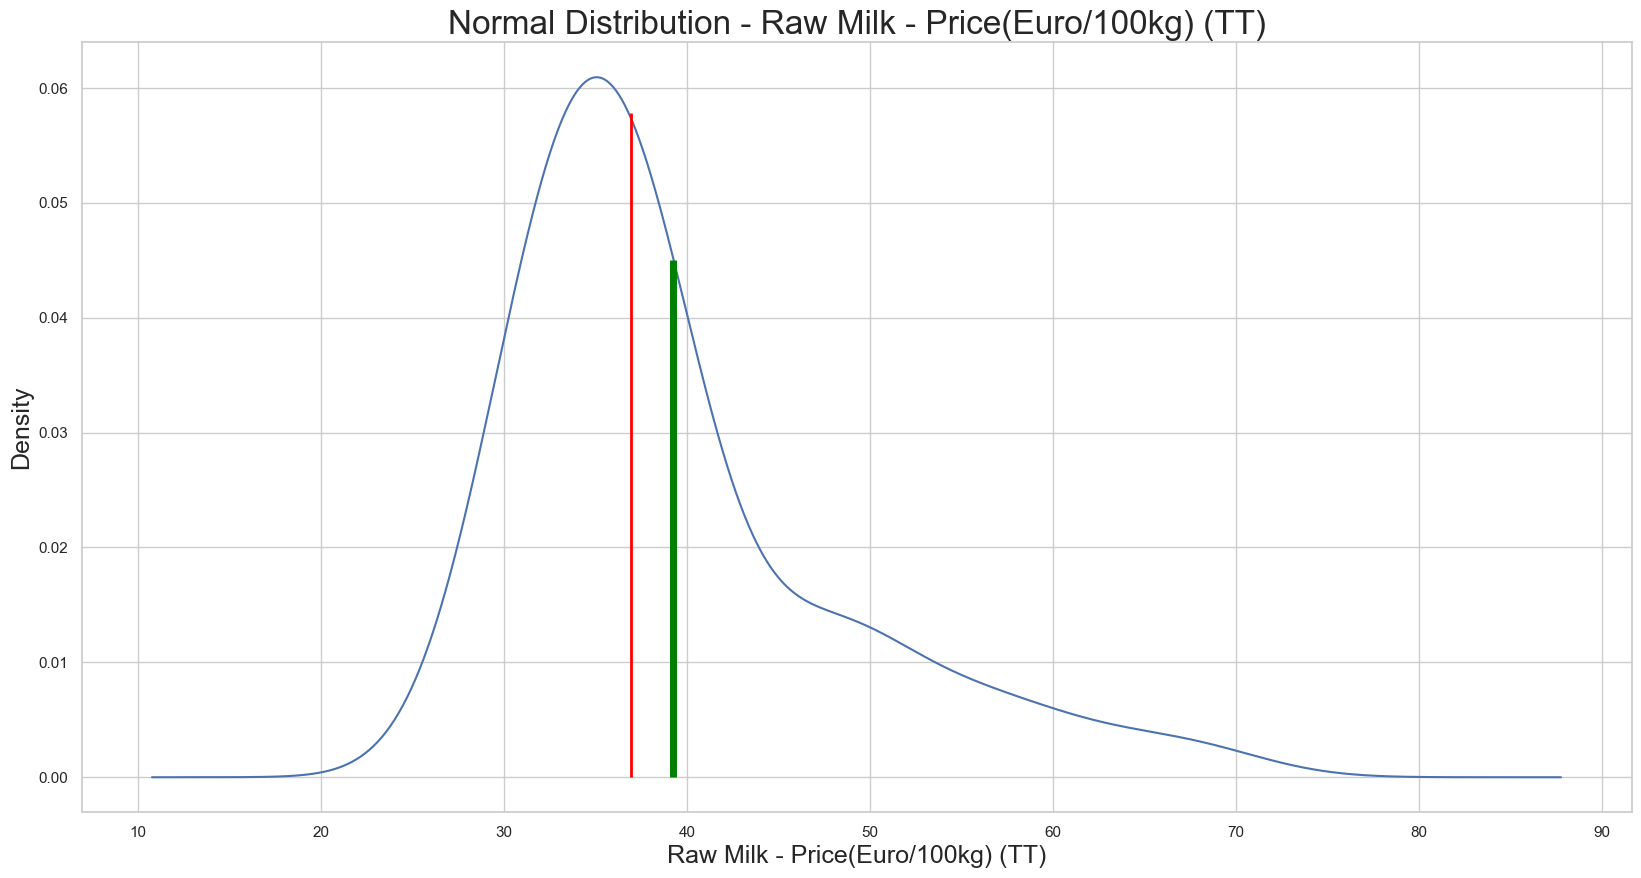

In [124]:
data = df_col_merged_4[' Raw Milk - Price(Euro/100kg) (TT)']

data.plot(kind="density",
         figsize=(20,10));

plt.vlines(data.mean(),
          ymin=0,
          ymax=0.045,
          linewidth=5.0,
          color="green")

plt.vlines(data.median(),
          ymin=0,
          ymax=0.0578,
          linewidth=2.0,
          color="red")

plt.ylabel("Density", fontsize="18")
plt.xlabel("Raw Milk - Price(Euro/100kg) (TT)", fontsize="18")
plt.title("Normal Distribution - Raw Milk - Price(Euro/100kg) (TT)", fontsize="24")

In [125]:
data = df_col_merged_4['Raw Milk (TT)']

data.plot(kind="density",
         figsize=(20,10));

plt.vlines(data.mean(),
          ymin=0,
          ymax=0.00095,
          linewidth=5.0,
          color="green")

plt.vlines(data.median(),
          ymin=0,
          ymax=0.00104,
          linewidth=2.0,
          color="red")

plt.ylabel("Density", fontsize="18")
plt.xlabel("Raw Milk Produced (TT)", fontsize="18")
plt.title("Normal Distribution - Raw Milk Produced(TT) ", fontsize="24")

Text(0.5, 1.0, 'Normal Distribution - Raw Milk Produced(TT) ')

Text(0.5, 1.0, 'Normal Distribution - Cream (TT) ')

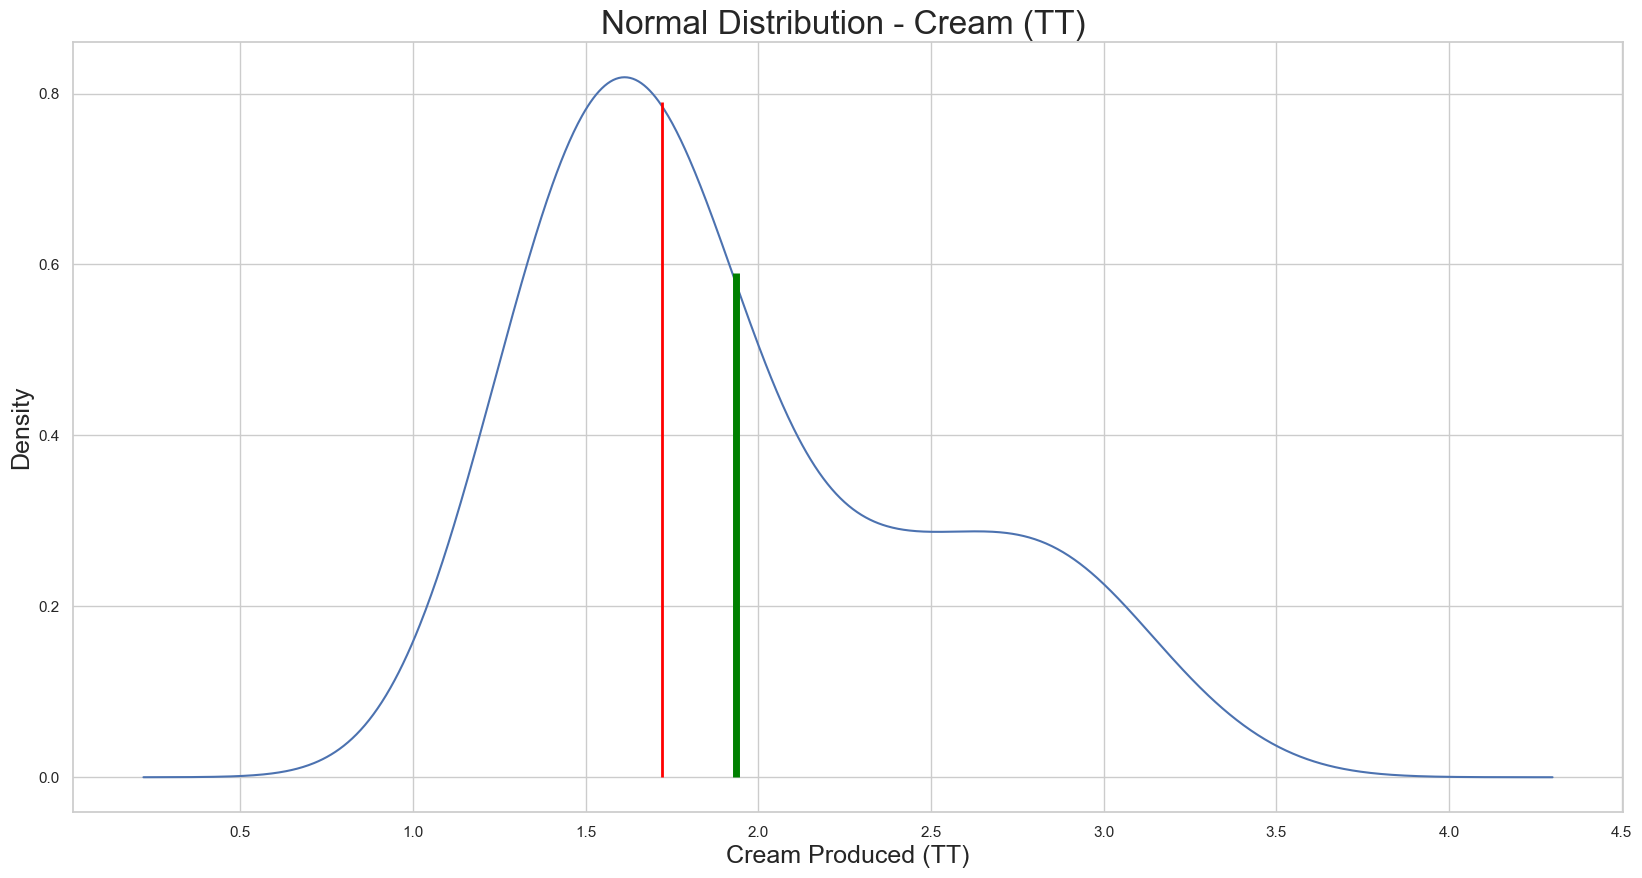

In [126]:
data = df_col_merged_4['Cream (TT)']

data.plot(kind="density",
         figsize=(20,10));

plt.vlines(data.mean(),
          ymin=0,
          ymax=0.59,
          linewidth=5.0,
          color="green")

plt.vlines(data.median(),
          ymin=0,
          ymax=0.79,
          linewidth=2.0,
          color="red")

plt.ylabel("Density", fontsize="18")
plt.xlabel("Cream Produced (TT)", fontsize="18")
plt.title("Normal Distribution - Cream (TT) ", fontsize="24")

Text(0.5, 1.0, 'Normal Distribution - Butter Produced(TT) ')

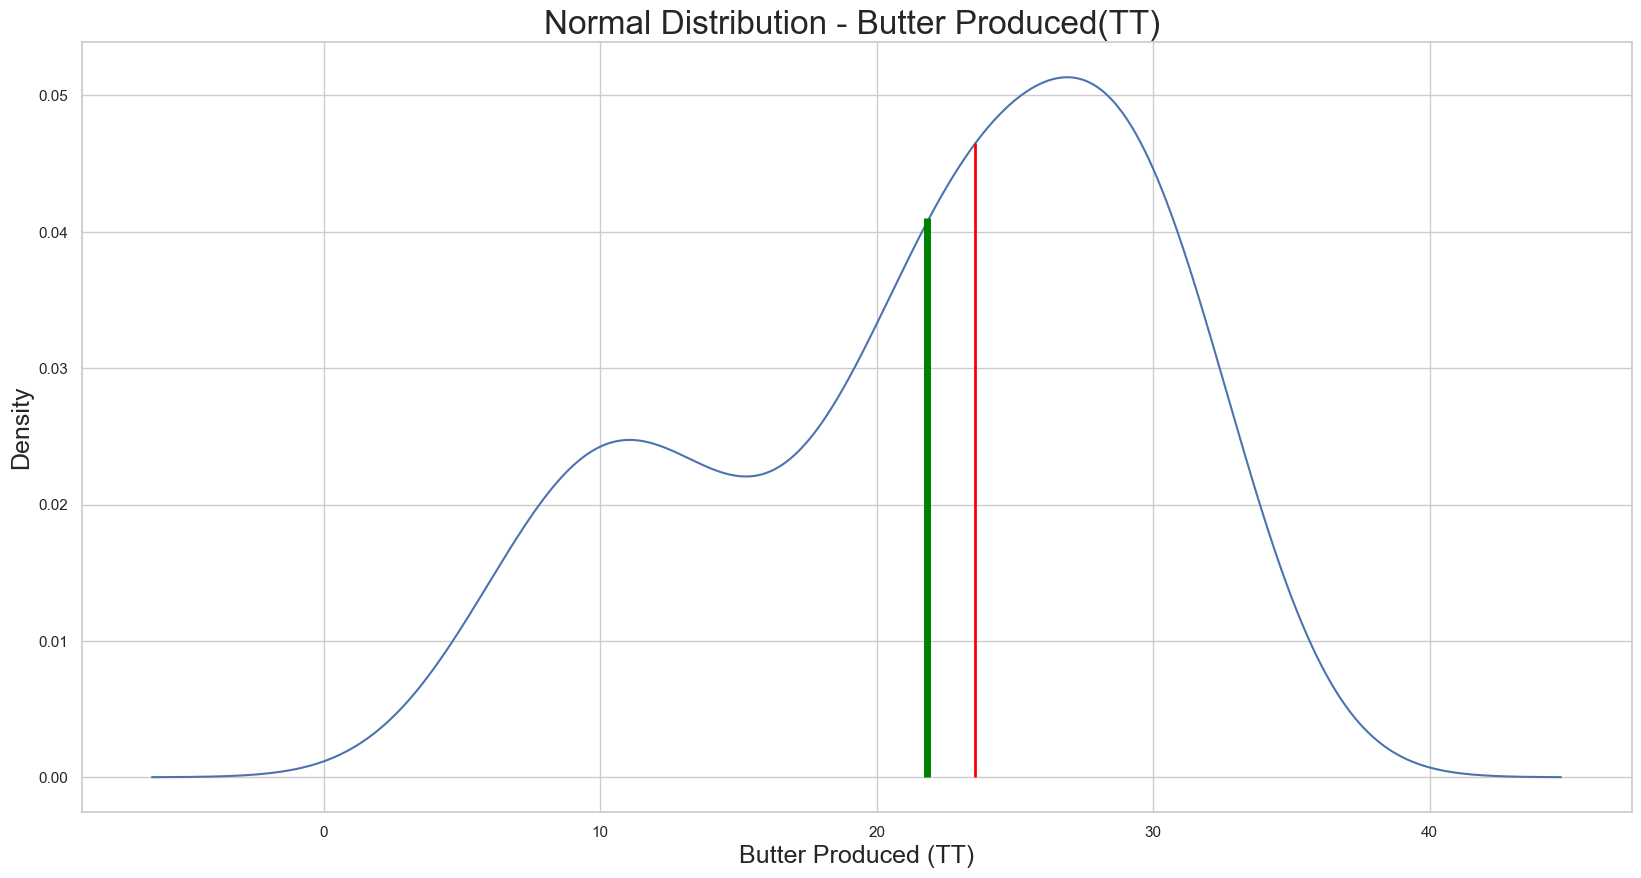

In [127]:
data = df_col_merged_4['Butter (TT)']

data.plot(kind="density",
         figsize=(20,10));

plt.vlines(data.mean(),
          ymin=0,
          ymax=0.041,
          linewidth=5.0,
          color="green")

plt.vlines(data.median(),
          ymin=0,
          ymax=0.0465,
          linewidth=2.0,
          color="red")

plt.ylabel("Density", fontsize="18")
plt.xlabel("Butter Produced (TT)", fontsize="18")
plt.title("Normal Distribution - Butter Produced(TT) ", fontsize="24")

Text(0.5, 1.0, 'Normal Distribution - Drinking Milk Produced (TT) ')

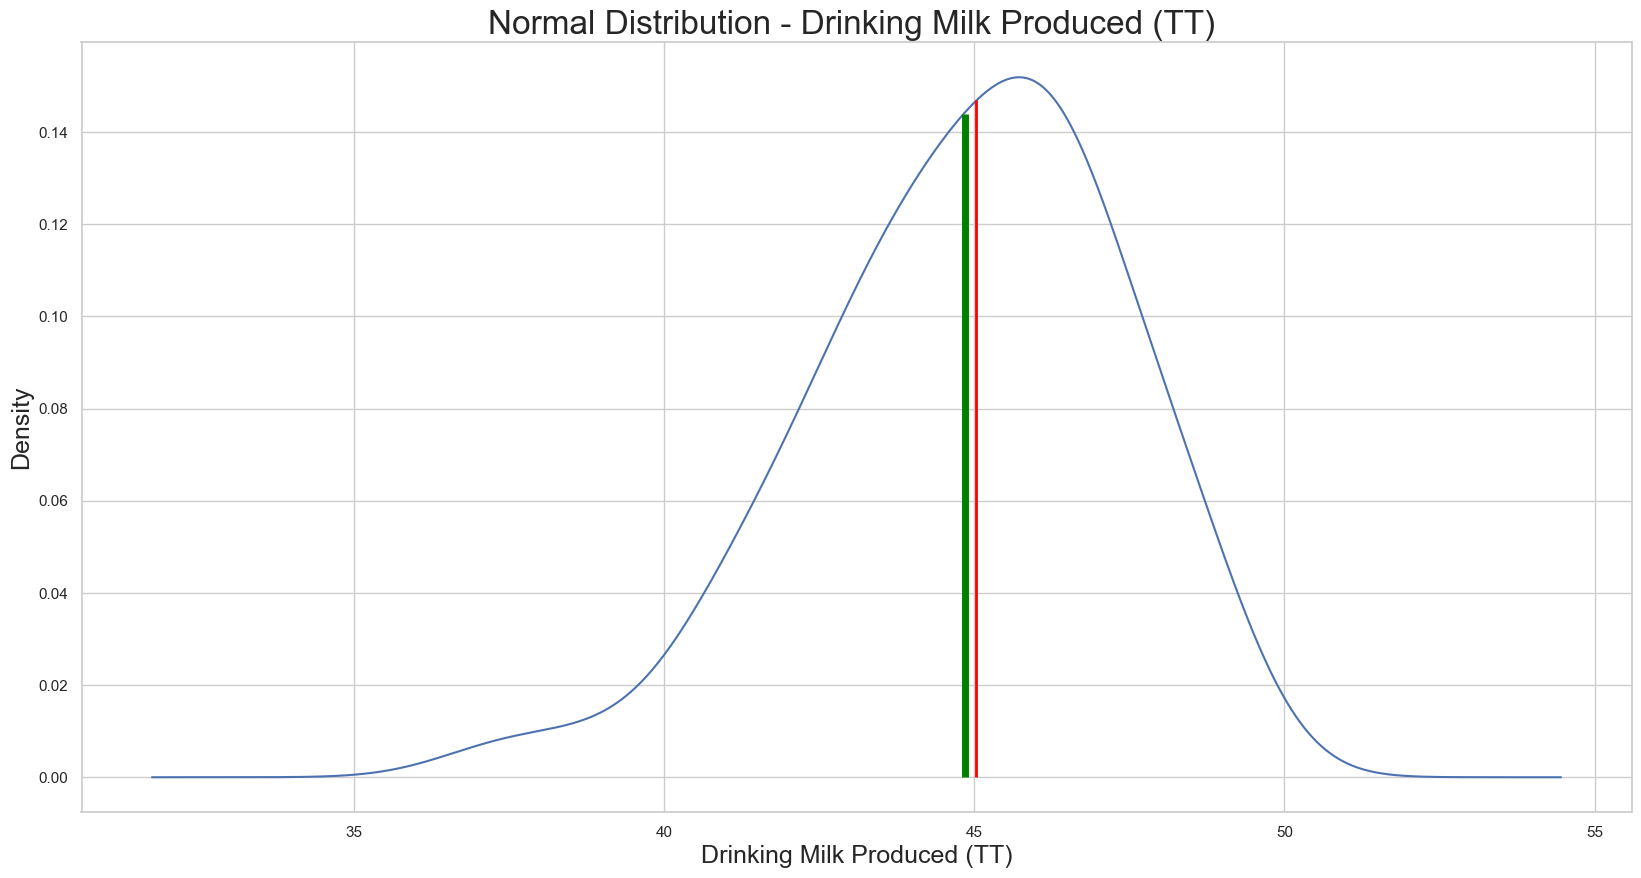

In [128]:
data = df_col_merged_4['Drinking Milk (TT)']

data.plot(kind="density",
         figsize=(20,10));

plt.vlines(data.mean(),
          ymin=0,
          ymax=0.144,
          linewidth=5.0,
          color="green")

plt.vlines(data.median(),
          ymin=0,
          ymax=0.147,
          linewidth=2.0,
          color="red")

plt.ylabel("Density", fontsize="18")
plt.xlabel("Drinking Milk Produced (TT)", fontsize="18")
plt.title("Normal Distribution - Drinking Milk Produced (TT) ", fontsize="24")

# Data Preparation for Hypothesis Testing

In [129]:
milk_prices_2 = milk_prices.drop(columns=['Begin Date', 'End Date'])

In [130]:
milk_prices_3 = milk_prices_2.copy()

In [131]:
milk_prices_3.head()

Year Month    Member State           Product  Price(Euro/100kg)
0  2022   Jan  European Union          Raw milk               41.8
1  2022   Jan         Belgium  Organic raw milk               48.1
2  2022   Jan         Belgium          Raw milk               45.1
3  2022   Jan        Bulgaria  Organic raw milk               47.5
4  2022   Jan        Bulgaria          Raw milk               37.6

In [132]:
df_dairy_sample = df_dairy.copy()

In [133]:
df_dairy_sample.head()

Member State Member State Code  \
0      Austria                AT   
1      Austria                AT   
2      Austria                AT   
3      Austria                AT   
4      Austria                AT   

                                            Category  Year    Month  \
0                Acidified milk (yoghurts and other)  2022  January   
1  Butter, incl. dehydrated butter and ghee, and ...  2022  January   
2                       Cheese from cows'milk (pure)  2022  January   
3                       Cream for direct consumption  2022  January   
4                                      Drinking milk  2022  January   

  Thousand tonnes  
0           19.56  
1            3.32  
2           18.37  
3            5.37  
4           65.14

In [134]:
df_dairy_sample.drop(df_dairy_sample.index[(df_dairy_sample["Category"] != "Drinking milk")], axis=0, inplace=True)

In [135]:
df_dairy_sample.head()

Member State Member State Code       Category  Year     Month  \
4       Austria                AT  Drinking milk  2022   January   
14      Austria                AT  Drinking milk  2022  February   
24      Austria                AT  Drinking milk  2022     March   
34      Austria                AT  Drinking milk  2022     April   
44      Austria                AT  Drinking milk  2022       May   

   Thousand tonnes  
4            65.14  
14           60.72  
24           69.94  
34           65.33  
44           67.70

In [136]:
df_dairy_sample["Thousand tonnes"] = df_dairy_sample["Thousand tonnes"].str.replace(r',', '').astype(float)

In [137]:
milk_prices_3.drop(milk_prices_3.index[(milk_prices_3["Product"] != "Raw milk")], axis=0, inplace=True)

In [138]:
milk_prices_3["Price(Euro/100kg)"] = milk_prices_3["Price(Euro/100kg)"].astype(float)

# Statistics

In [139]:
milk_prices_3["Price(Euro/100kg)"].describe()

count    6768.000000
mean       33.186673
std         7.605834
min        15.300000
25%        28.600000
50%        32.000000
75%        36.300000
max        68.500000
Name: Price(Euro/100kg), dtype: float64

In [140]:
milk_prices_3["Price(Euro/100kg)"].count()

6768

The Normal Distribution demonstrates the raw milk prices for all of the countries in the EU are not Gaussian. Further tests will visual and statistical tests will be used to prove this.

Text(0.5, 1.0, 'Normal Distribution - Raw Milk Prices (Europe)')

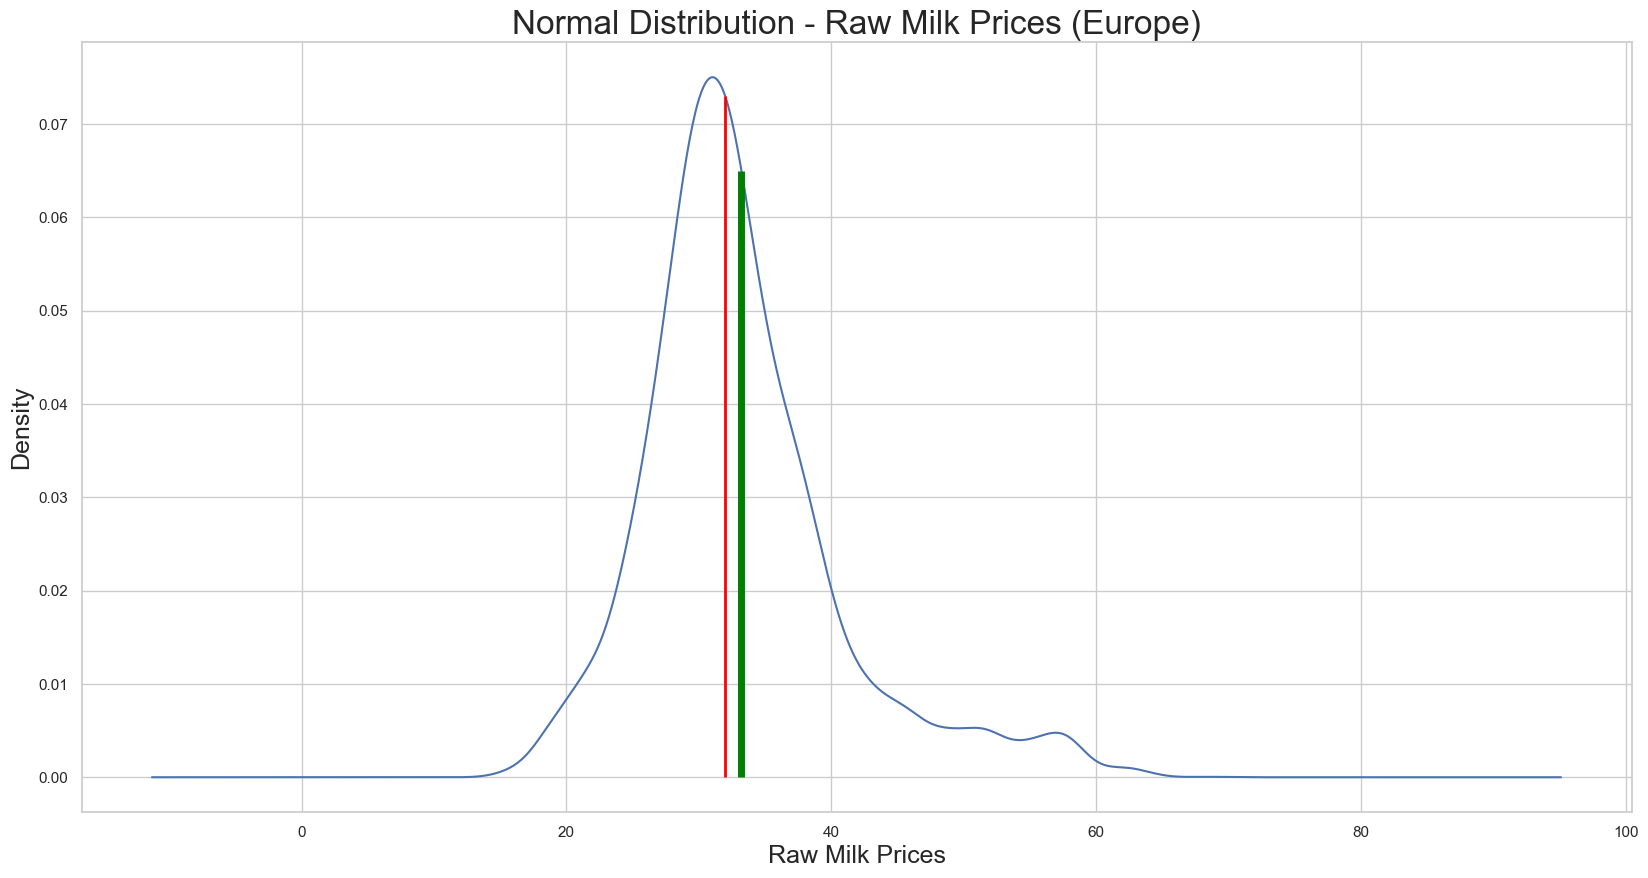

In [141]:
data = milk_prices_3["Price(Euro/100kg)"]

data.plot(kind="density",
         figsize=(20,10));

plt.vlines(data.mean(),
          ymin=0,
          ymax=0.065,
          linewidth=5.0,
          color="green")

plt.vlines(data.median(),
          ymin=0,
          ymax=0.073,
          linewidth=2.0,
          color="red")

plt.ylabel("Density", fontsize="18")
plt.xlabel("Raw Milk Prices", fontsize="18")
plt.title("Normal Distribution - Raw Milk Prices (Europe)", fontsize="24")

In [142]:
import scipy.stats as stats

In [143]:
sns.set(rc={'figure.figsize':(12,6)}, style='whitegrid')

Text(0.5, 1.0, 'Normal Distribution - Raw Milk Prices (Europe)')

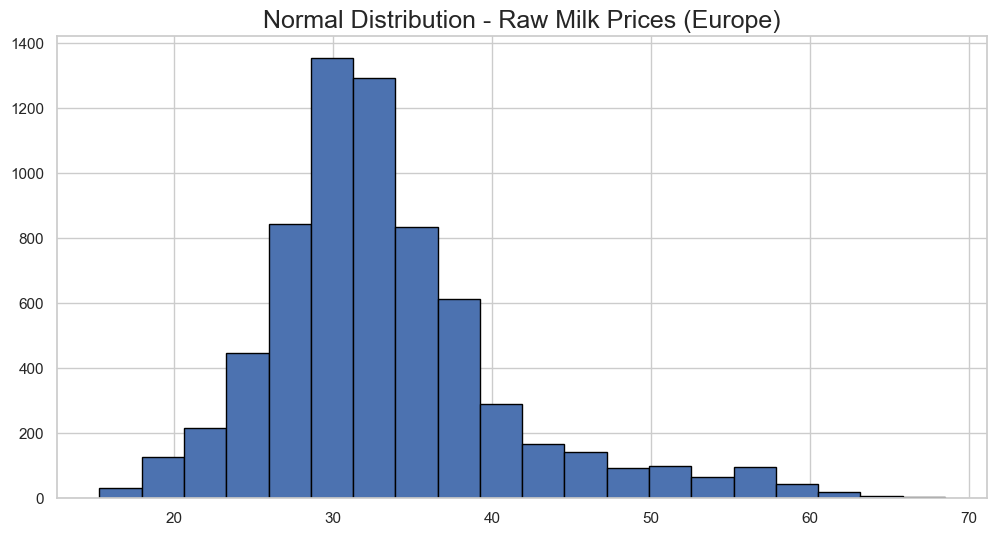

In [144]:
plt.hist(milk_prices_3["Price(Euro/100kg)"], edgecolor='black', bins=20)
plt.title("Normal Distribution - Raw Milk Prices (Europe)", fontsize="18")


In [145]:
from statsmodels.graphics.gofplots import qqplot

Text(0.5, 1.0, 'Normal Distribution - Raw Milk Prices (Europe)')

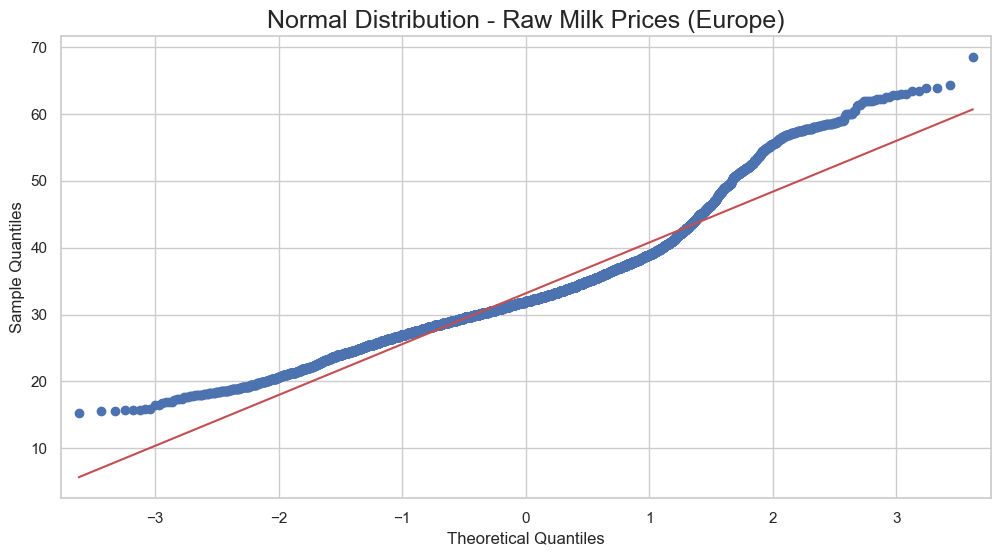

In [146]:
qqplot(milk_prices_3["Price(Euro/100kg)"], line='s');
plt.title("Normal Distribution - Raw Milk Prices (Europe)", fontsize="18")

H0: Raw milk prices for Europe are Gaussian,
H1: Raw milk prices for Europe are not Gaussian

In [647]:
milk_prices_3.mean()

Year                 2011.240396
Price(Euro/100kg)      33.186673
dtype: float64

In [649]:
milk_prices_3['Price(Euro/100kg)'].mean()

33.18667257683212

In [619]:
# normality test
stat, p = normaltest(milk_prices_europe["Price(Euro/100kg)"])
print('Statistics=%.3f, p=%.40f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
     print('Sample looks Gaussian (fail to reject H0)')
else:
     print('Sample does not look Gaussian (reject H0)')

Statistics=36.219, p=0.0000000136509858912161555942053726780093
Sample does not look Gaussian (reject H0)


Using the culmulative distribution function to understand where the data is distributed at Q1 and Q2.

In [150]:
stats.uniform.cdf(x=32.1,loc=0,scale=68.5)

0.4686131386861314

In [151]:
stats.uniform.cdf(x=28.7,loc=0,scale=68.5)

0.418978102189781

In [625]:
df_col_merged_4[" Raw Milk - Price(Euro/100kg) (TT)"].count()

58

In [621]:
milk_prices_Germany = milk_prices_3.copy()

In [622]:
milk_prices_Germany.drop(milk_prices_Germany.index[(milk_prices_Germany["Member State"] != "Germany")], axis=0, inplace=True)

In [627]:
milk_prices_Germany.head()

Year Month Member State   Product  Price(Euro/100kg)
10   2022   Jan      Germany  Raw milk               43.0
57   2022   Feb      Germany  Raw milk               44.2
104  2022   Mar      Germany  Raw milk               48.0
150  2022   Apr      Germany  Raw milk               49.7
197  2022   May      Germany  Raw milk               51.7

In [646]:
milk_prices_Germany.mean()

Year                 2013.467290
Price(Euro/100kg)      33.474299
dtype: float64

In [630]:
sample_size = 58
sample = np.random.choice(a = df_col_merged_4[" Raw Milk - Price(Euro/100kg) (TT)"], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)

print("z-critical value:", z_critical)

pop_stdev = milk_prices_3["Price(Euro/100kg)"].std()

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print("Confidence interval:", confidence_interval)
print("Sample mean", sample_mean)

z-critical value: 1.959963984540054
Confidence interval: (37.79086968574903, 41.7056820383889)
Sample mean 39.748275862068965


In [633]:
sample_size = 214
sample = np.random.choice(a = milk_prices_Germany["Price(Euro/100kg)"], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)

print("z-critical value:", z_critical)

pop_stdev = milk_prices_3["Price(Euro/100kg)"].std()

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print("Confidence interval:", confidence_interval)
print("Sample mean", sample_mean)

z-critical value: 1.959963984540054
Confidence interval: (32.420219767775485, 34.45828490512171)
Sample mean 33.4392523364486


In [155]:
sample_size = 40

intervals = []
sample_means = []

for sample in range(40):
    sample = np.random.choice(a = df_col_merged_4[" Raw Milk - Price(Euro/100kg) (TT)"], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)
    
    pop_stdev = milk_prices_3["Price(Euro/100kg)"].std()
    
    stats.norm.ppf(q = 0.025)
    
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)
    
    intervals.append(confidence_interval)

Text(0.5, 1.0, 'How close data samples are to mean (Ireland vs Europe)')

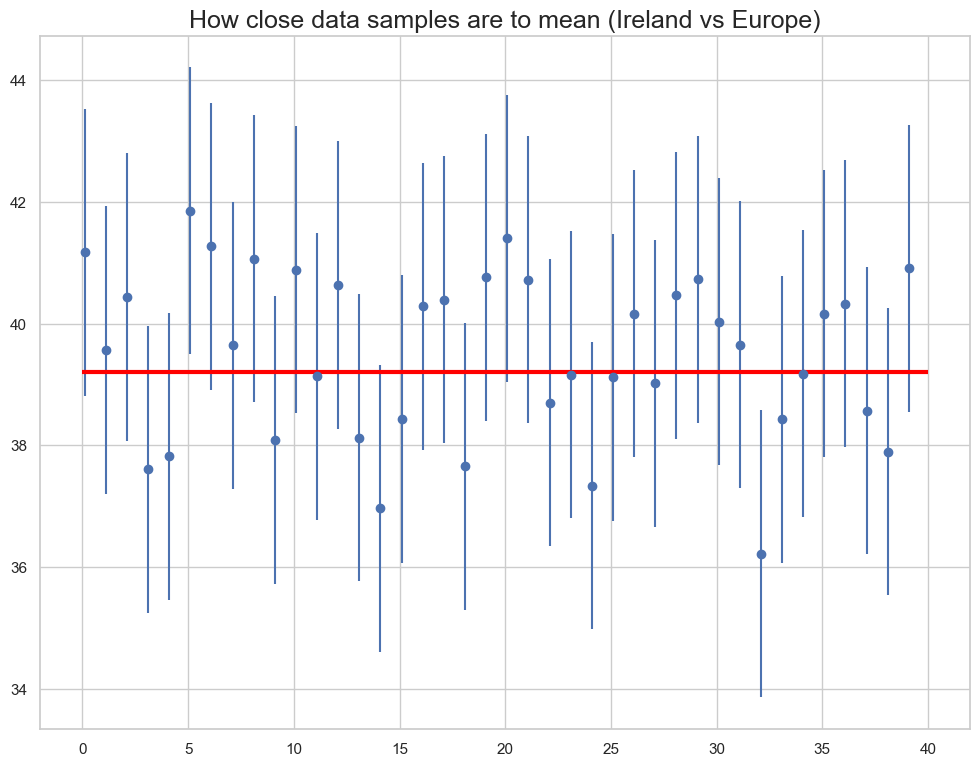

In [643]:
plt.figure(figsize=(12,9))

plt.errorbar(x=np.arange(0.1, 40, 1),
             y=sample_means,
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=40,
                y=39.21,
                linewidth=3.0,
                color='red');

plt.title("How close data samples are to mean (Ireland vs Europe)", fontsize="18")

In [ ]:
sample_size = 40

intervals = []
sample_means = []

for sample in range(40):
    sample = np.random.choice(a = milk_prices_Germany["Price(Euro/100kg)"], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)
    
    pop_stdev = milk_prices_3["Price(Euro/100kg)"].std()
    
    stats.norm.ppf(q = 0.025)
    
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)
    
    intervals.append(confidence_interval)    
    


Text(0.5, 1.0, 'How close data samples are to mean (Germany vs Europe)')

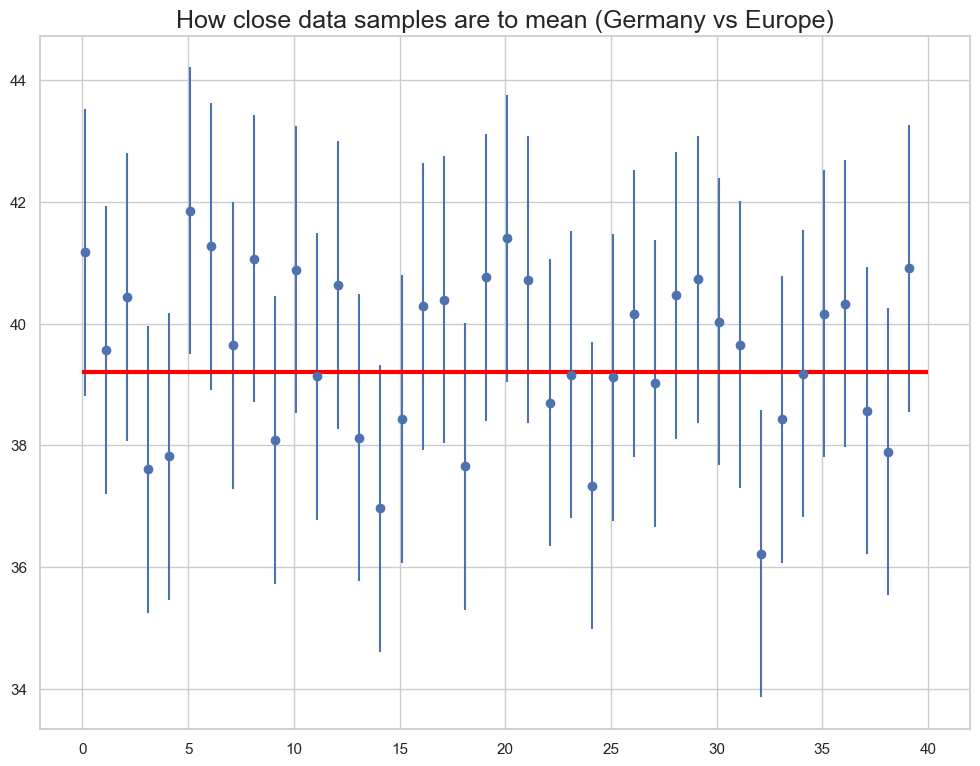

In [644]:
plt.figure(figsize=(12,9))

plt.errorbar(x=np.arange(0.1, 40, 1),
             y=sample_means,
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=40,
                y=39.21,
                linewidth=3.0,
                color='red');

plt.title("How close data samples are to mean (Germany vs Europe)", fontsize="18")

In [157]:
print(milk_prices_3["Price(Euro/100kg)"].mean())

33.18667257683212


In [158]:
df_col_merged_4.head()

Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
Date                                                                 
2018-01-01                                39.4               46.76   
2018-02-01                                37.0               44.59   
2018-03-01                                33.3               48.18   
2018-04-01                                31.1               45.71   
2018-05-01                                31.2               48.39   

            Raw Milk (TT)  Cream (TT)  Butter (TT)  
Date                                                
2018-01-01         166.56        1.24         8.85  
2018-02-01         302.97        1.31         9.45  
2018-03-01         646.08        1.68        20.18  
2018-04-01         847.51        1.48        23.73  
2018-05-01        1022.56        1.91        27.50

In [159]:
milk_prices_ireland = pd.DataFrame()

In [160]:
milk_prices_ireland = df_col_merged_4.copy()

In [161]:
milk_prices_ireland[" Raw Milk - Price(Euro/100kg) (TT)"].mean()

39.21896551724138

The Normal Distribution demonstrates the raw milk prices for Ireland are not Gaussian as the median and mean are not equal to each the other. Further tests will visual and statistical tests will be used to prove this.

Text(0.5, 1.0, 'Normal Distribution - Raw Milk Prices (Ireland)')

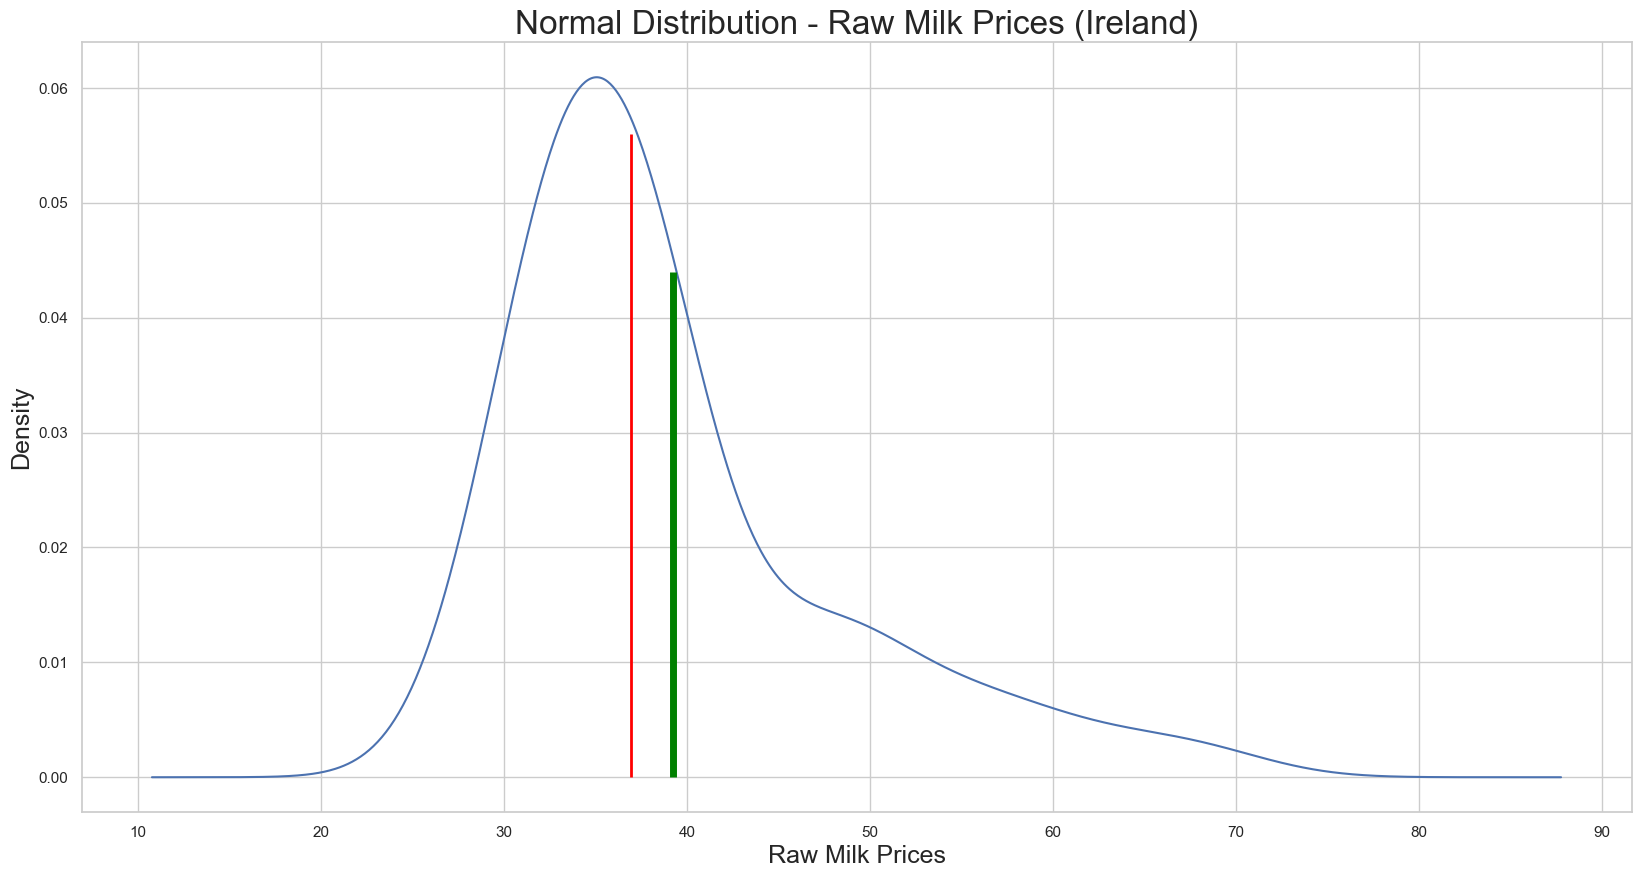

In [162]:
data = milk_prices_ireland[" Raw Milk - Price(Euro/100kg) (TT)"]

data.plot(kind="density",
         figsize=(20,10));

plt.vlines(data.mean(),
          ymin=0,
          ymax=0.044,
          linewidth=5.0,
          color="green")

plt.vlines(data.median(),
          ymin=0,
          ymax=0.056,
          linewidth=2.0,
          color="red")

plt.ylabel("Density", fontsize="18")
plt.xlabel("Raw Milk Prices", fontsize="18")
plt.title("Normal Distribution - Raw Milk Prices (Ireland)", fontsize="24")

Text(0.5, 1.0, 'Normal Distribution - Raw Milk Prices (Ireland)')

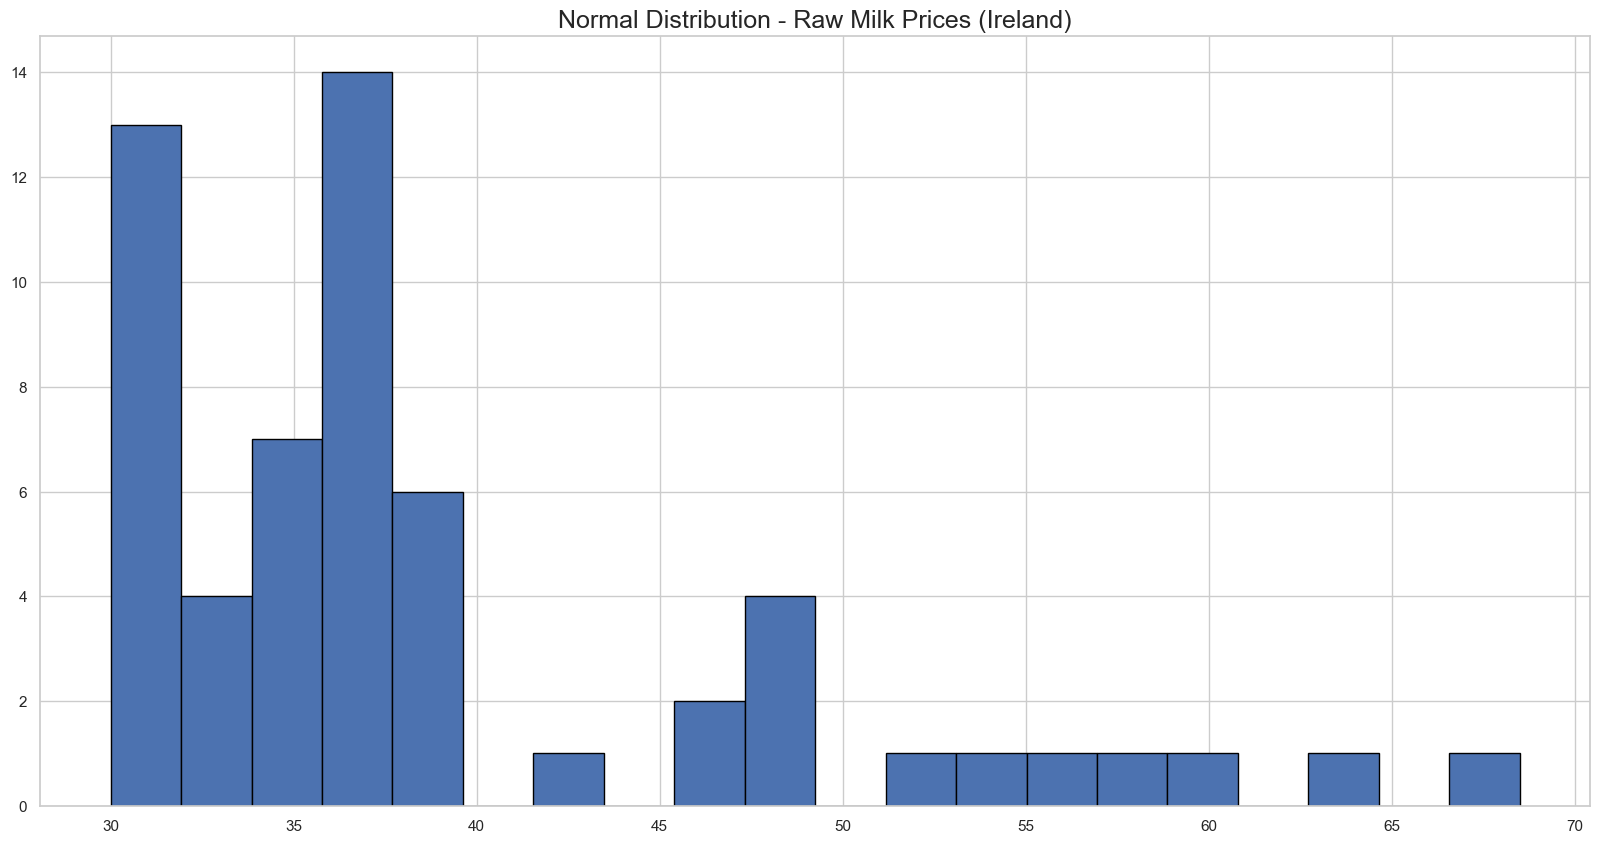

In [608]:
plt.hist(milk_prices_ireland[" Raw Milk - Price(Euro/100kg) (TT)"], edgecolor='black', bins=20)
plt.title("Normal Distribution - Raw Milk Prices (Ireland)", fontsize="18")


Text(0.5, 1.0, 'Normal Distribution - Raw Milk Prices (Ireland) ')

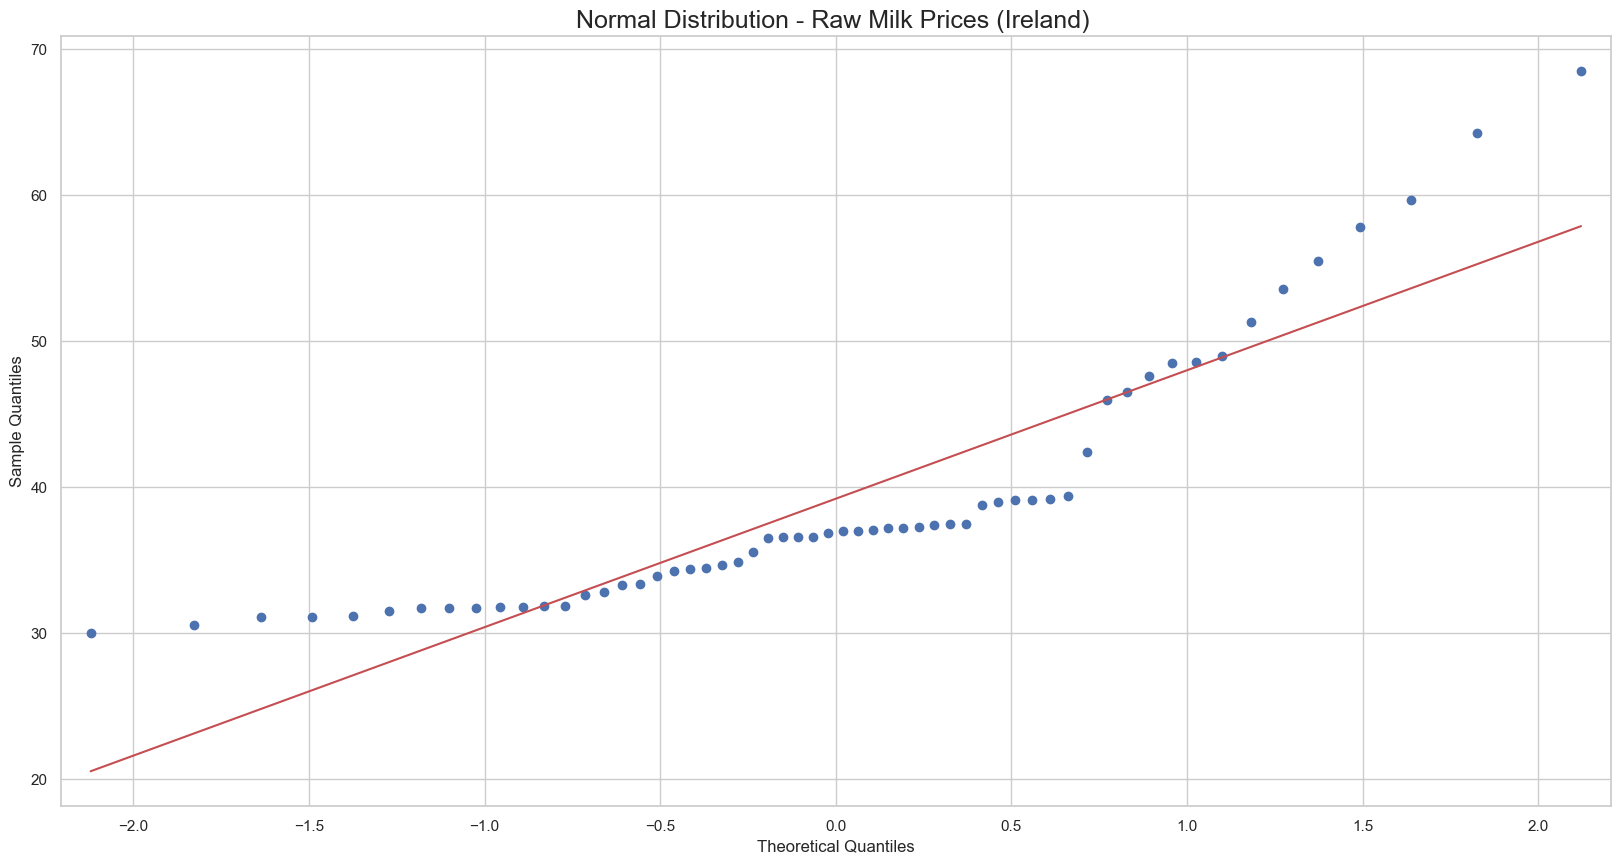

In [605]:
qqplot(milk_prices_ireland[" Raw Milk - Price(Euro/100kg) (TT)"], line='s');
plt.title("Normal Distribution - Raw Milk Prices (Ireland) ", fontsize="18")

H0: Raw milk prices for Ireland are Gaussian,
H1: Raw milk prices for Ireland are not Gaussian

In [164]:
# normality test
stat, p = shapiro(milk_prices_ireland[" Raw Milk - Price(Euro/100kg) (TT)"])
print('Statistics=%.3f, p=%.8f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=0.813, p=0.00000041
Data does not look Gaussian (reject H0)


Given that the data is not Gaussian, a non paramteric test will be used to carry out a statistical test. Below, two data dataframes are prepared. One contains price data for raw milk from 2021. The other contains price data for raw milk from 2018. The Mann–Whitney U test will implemented to assess is there a meaningful statisical difference between both datasets.

In [165]:
milk_prices_ireland_8 = milk_prices_ireland_testing.copy()

In [166]:
milk_prices_ireland_test = milk_prices_ireland_testing.copy()

In [167]:
milk_prices_ireland_test.head()

Year Month Member State   Product  Price(Euro/100kg)
0  2022   Jan      Ireland  Raw milk               46.0
1  2022   Feb      Ireland  Raw milk               47.6
2  2022   Mar      Ireland  Raw milk               49.0
3  2022   Apr      Ireland  Raw milk               51.3
4  2022   May      Ireland  Raw milk               53.6

In [168]:
milk_prices_ireland_8.drop(milk_prices_ireland_8.index[(milk_prices_ireland_8['Year'] != 2021)], axis=0, inplace=True)

In [169]:
milk_prices_ireland_8.head()

Year Month Member State   Product  Price(Euro/100kg)
10  2021   Jan      Ireland  Raw milk               35.6
11  2021   Feb      Ireland  Raw milk               37.2
12  2021   Mar      Ireland  Raw milk               37.1
13  2021   Apr      Ireland  Raw milk               36.6
14  2021   May      Ireland  Raw milk               37.5

In [170]:
milk_prices_ireland_test.drop(milk_prices_ireland_test.index[(milk_prices_ireland_test['Year'] != 2018)], axis=0, inplace=True)

In [171]:
milk_prices_ireland_test.head()

Year Month Member State   Product  Price(Euro/100kg)
46  2018   Jan      Ireland  Raw milk               39.4
47  2018   Feb      Ireland  Raw milk               37.0
48  2018   Mar      Ireland  Raw milk               33.3
49  2018   Apr      Ireland  Raw milk               31.1
50  2018   May      Ireland  Raw milk               31.2

H0: There is no significant difference from 2021 to 2018, H1: There is no significant difference from 2021 to 2018,

In [172]:
stats.mannwhitneyu(milk_prices_ireland_test['Price(Euro/100kg)'], milk_prices_ireland_8["Price(Euro/100kg)"])

MannwhitneyuResult(statistic=28.0, pvalue=0.011985657155376375)

Given that the pvalue is less than .05, the null hypothesis is rejected.

# Visualisation

Using a series a boxplots to locate potential outlier data to remove from the dataset that may obscure a signal within the data.

Text(0.5, 1.0, 'Outlier Detection - All Columns')

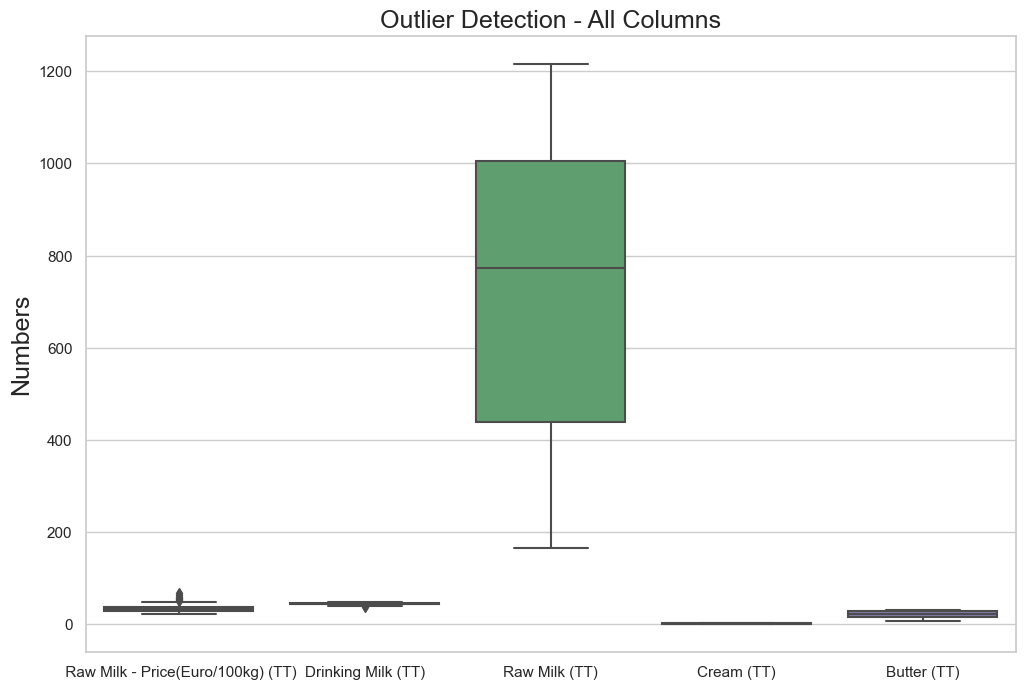

In [173]:
sns.set(rc={'figure.figsize':(12,8)}, style='whitegrid')
sns.boxplot(data=df_col_merged_3)

plt.ylabel("Numbers", fontsize="18")
plt.title("Outlier Detection - All Columns", fontsize="18")

In [174]:
sns.set(rc={'figure.figsize':(20,10)}, style='whitegrid')

According to the boxplot, data that is greater than 47 in terms of pricing outlier data

Text(0.5, 1.0, 'Outlier Detection - Raw Milk Price(Euro/100kg) (Before Outlier Removal)')

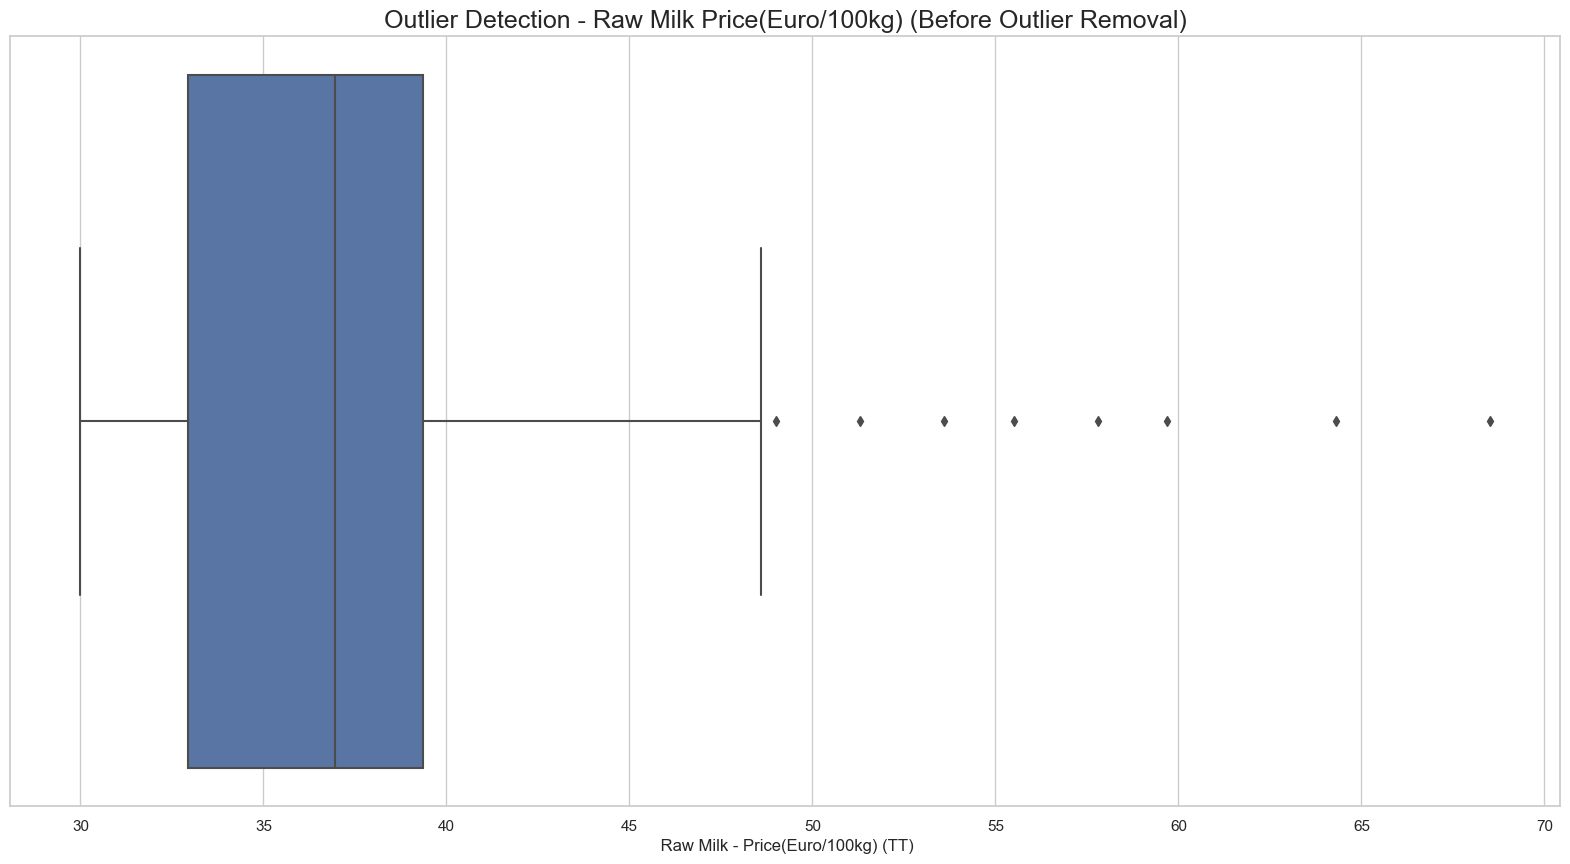

In [175]:
sns.boxplot(x=df_col_merged_4[' Raw Milk - Price(Euro/100kg) (TT)'], width=.9)

plt.title("Outlier Detection - Raw Milk Price(Euro/100kg) (Before Outlier Removal)", fontsize="18")

Analysing the trend of the data throughout the time period within the data to understand when the outlier events occurred. The colours used throughout follow the traffic light system. In this case red indicates that there are outliers present in the data which have not been removed yet. The outlier events occur within 2022. Rising economic inflation has occurred throughout 2022. This is very likely the cause of the rising prices. Many economic projections have determined that inflation will gradually fall relative to where it is now so therefore for this analysis this rising trend in 2022 will be treated as an outlier event. Therefore the outlier data will be removed.

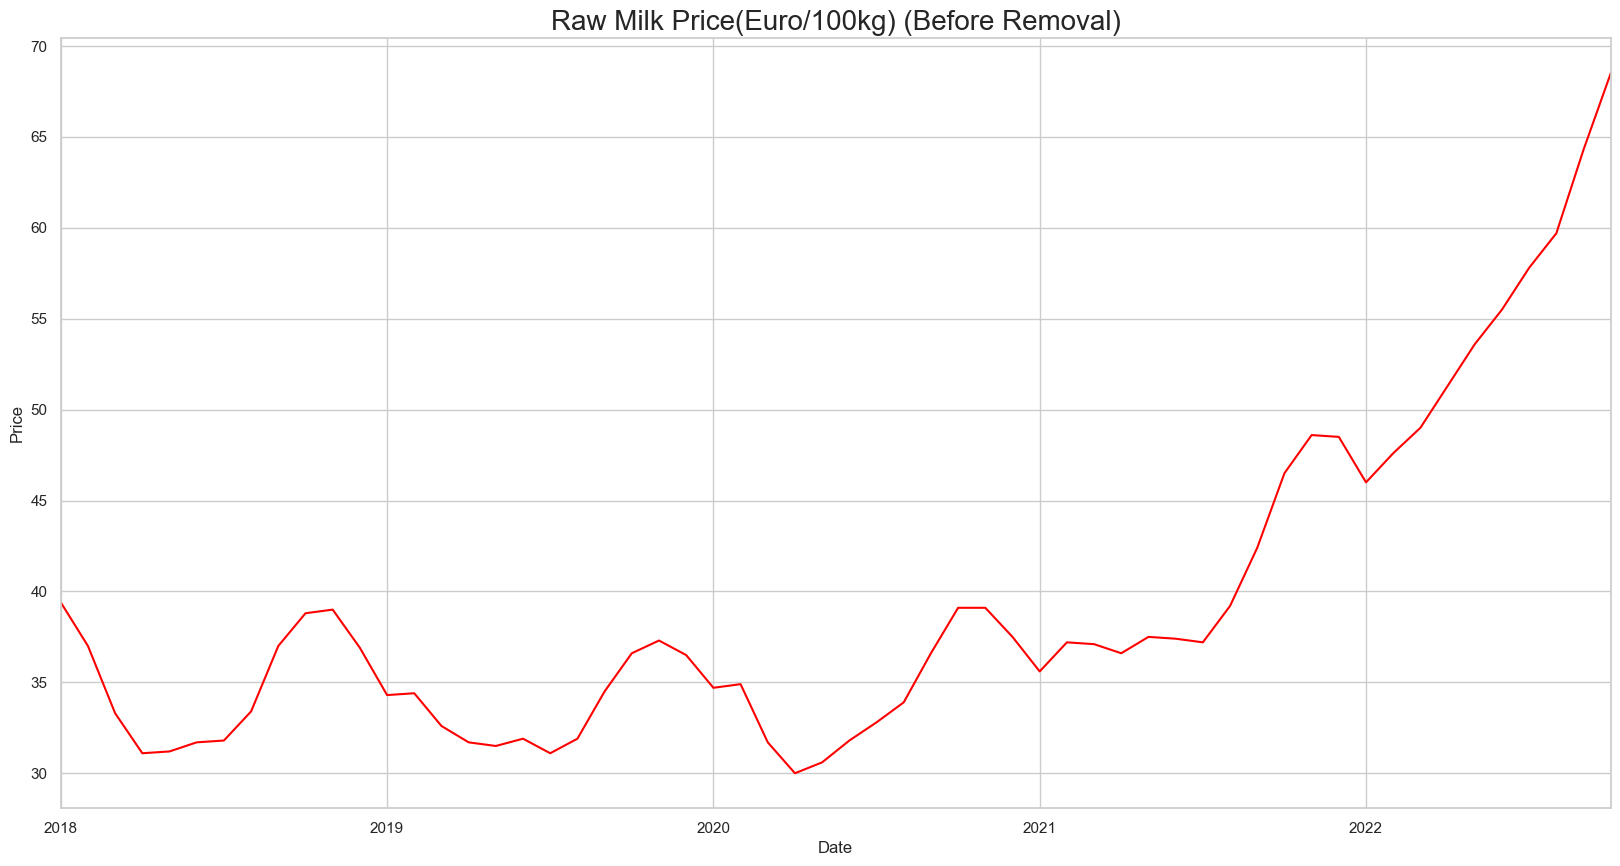

In [638]:
df_col_merged_4[' Raw Milk - Price(Euro/100kg) (TT)'].plot(color = 'red')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Raw Milk Price(Euro/100kg) (Before Removal)',fontsize=20)

plt.show()


In [177]:
df_col_merged_5 = df_col_merged_4[df_col_merged_4[' Raw Milk - Price(Euro/100kg) (TT)'] < 50]

Data points greater than 50 are removed. 

In [178]:
sns.boxplot(x=df_col_merged_5[' Raw Milk - Price(Euro/100kg) (TT)'], width=.9)

plt.title("Outlier Detection - Raw Milk Price(Euro/100kg) (After Outlier Removal)", fontsize="18")

Text(0.5, 1.0, 'Outlier Detection - Raw Milk Price(Euro/100kg) (After Outlier Removal)')

The green coloured time series plot indicates that trend has been treated of outliers.

In [637]:
df_col_merged_5[' Raw Milk - Price(Euro/100kg) (TT)'].plot(color = 'green')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Raw Milk Price(Euro/100kg) (After Removal)',fontsize=20)

plt.show()


Text(0.5, 1.0, 'Dispersion of Data - Before Price Removal')

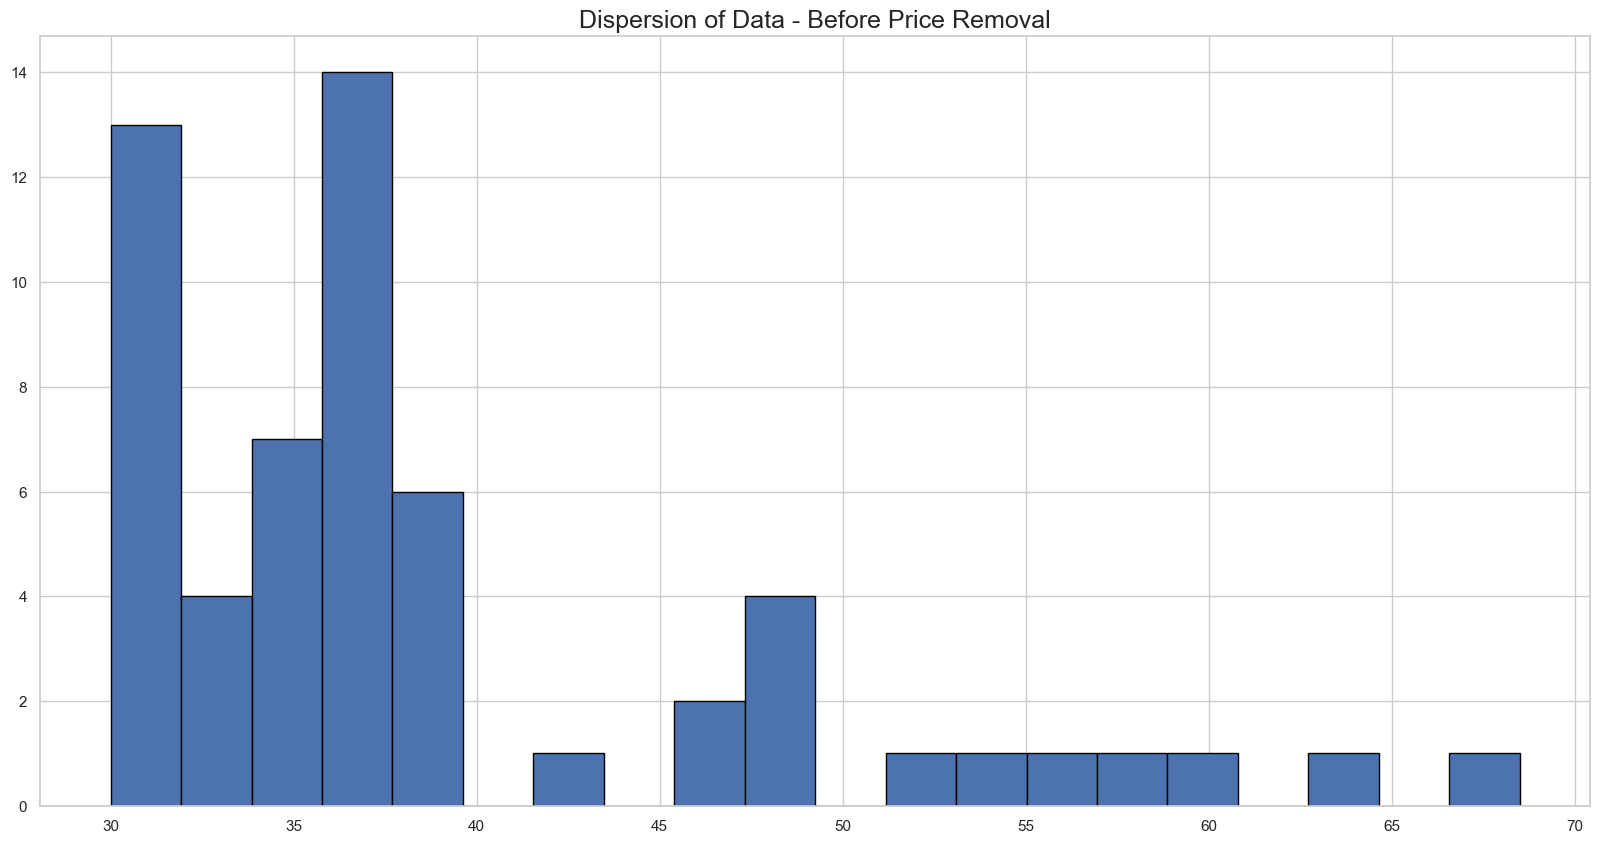

In [180]:
plt.hist(df_col_merged_4[' Raw Milk - Price(Euro/100kg) (TT)'], edgecolor='black', bins=20)
plt.title("Dispersion of Data - Before Price Removal", fontsize="18")


In [181]:
plt.hist(df_col_merged_5[' Raw Milk - Price(Euro/100kg) (TT)'], edgecolor='black', bins=20)
plt.title("Dispersion of Data - After Price Removal", fontsize="18")

Text(0.5, 1.0, 'Dispersion of Data - After Price Removal')

In [182]:
df_col_merged_6 = df_col_merged_5.copy()

In [183]:
df_col_merged_6.head()

Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
Date                                                                 
2018-01-01                                39.4               46.76   
2018-02-01                                37.0               44.59   
2018-03-01                                33.3               48.18   
2018-04-01                                31.1               45.71   
2018-05-01                                31.2               48.39   

            Raw Milk (TT)  Cream (TT)  Butter (TT)  
Date                                                
2018-01-01         166.56        1.24         8.85  
2018-02-01         302.97        1.31         9.45  
2018-03-01         646.08        1.68        20.18  
2018-04-01         847.51        1.48        23.73  
2018-05-01        1022.56        1.91        27.50

The correlation heatmap has identified that correlation between the raw milk price and the categories of dairy produced does exist. Drinking milk has strong negative correlation. Raw milk and Butter has a mild negative correlation. Cream has a medium positive correlation.

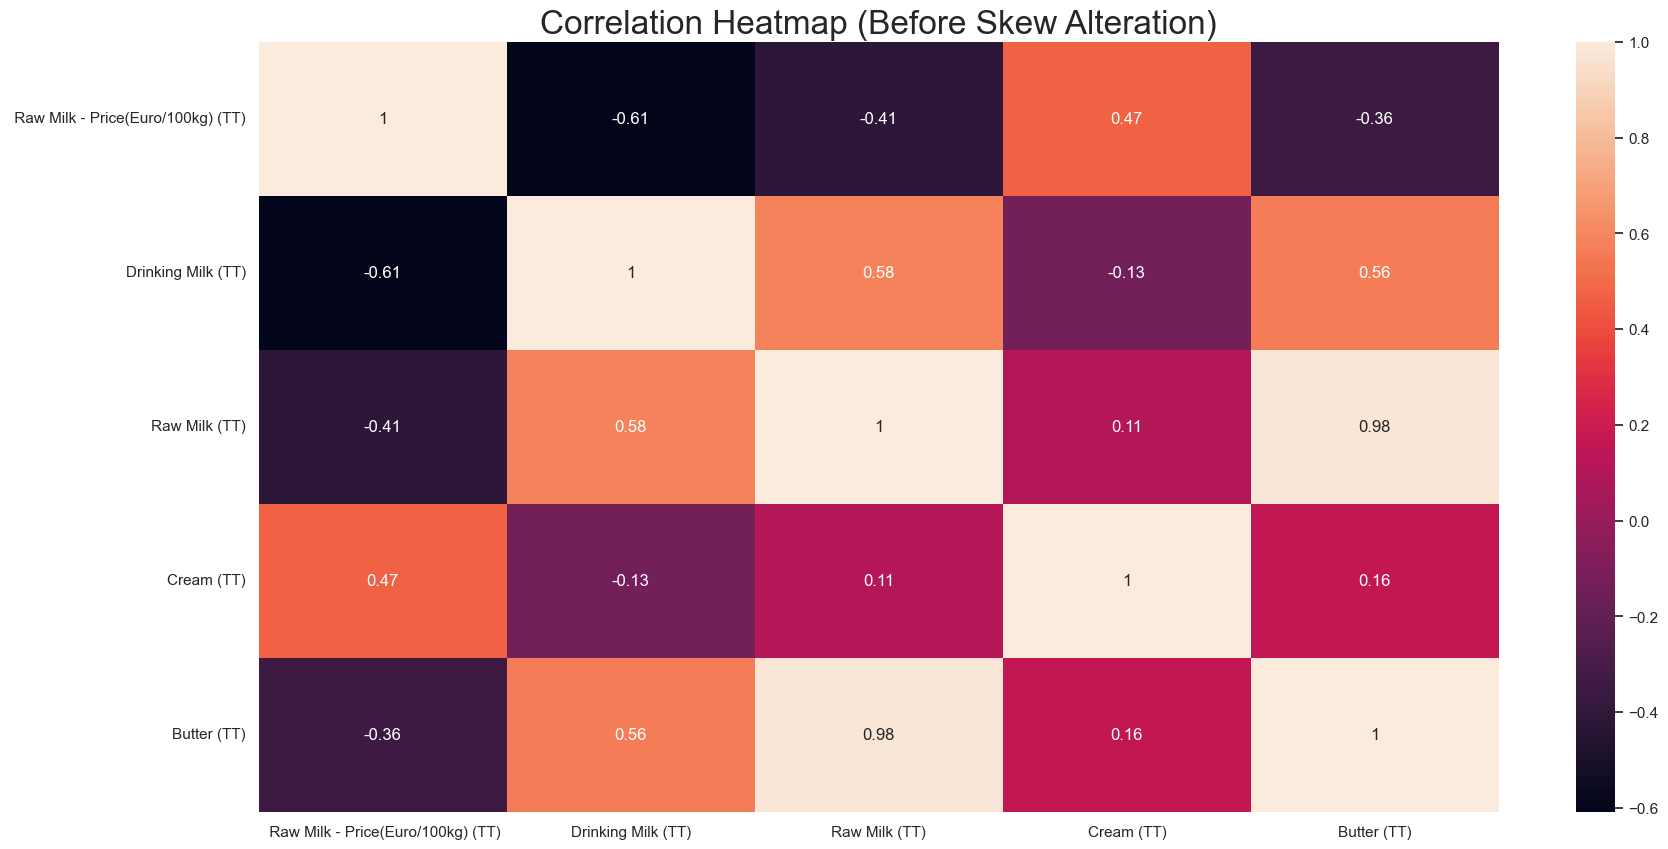

In [184]:
sns.heatmap(df_col_merged_6.corr(),annot=True)
plt.title("Correlation Heatmap (Before Skew Alteration)", fontsize="24")
plt.show()

Given that the data has been proved to not be gaussian, it is important to assess the level of skewnewss for each category that will be used to train the machine learning model. If a negative skew is presented, action will be taken to attempt positively alter the skew.

 Raw Milk - Price(Euro/100kg) (TT)
1.0815401741437505


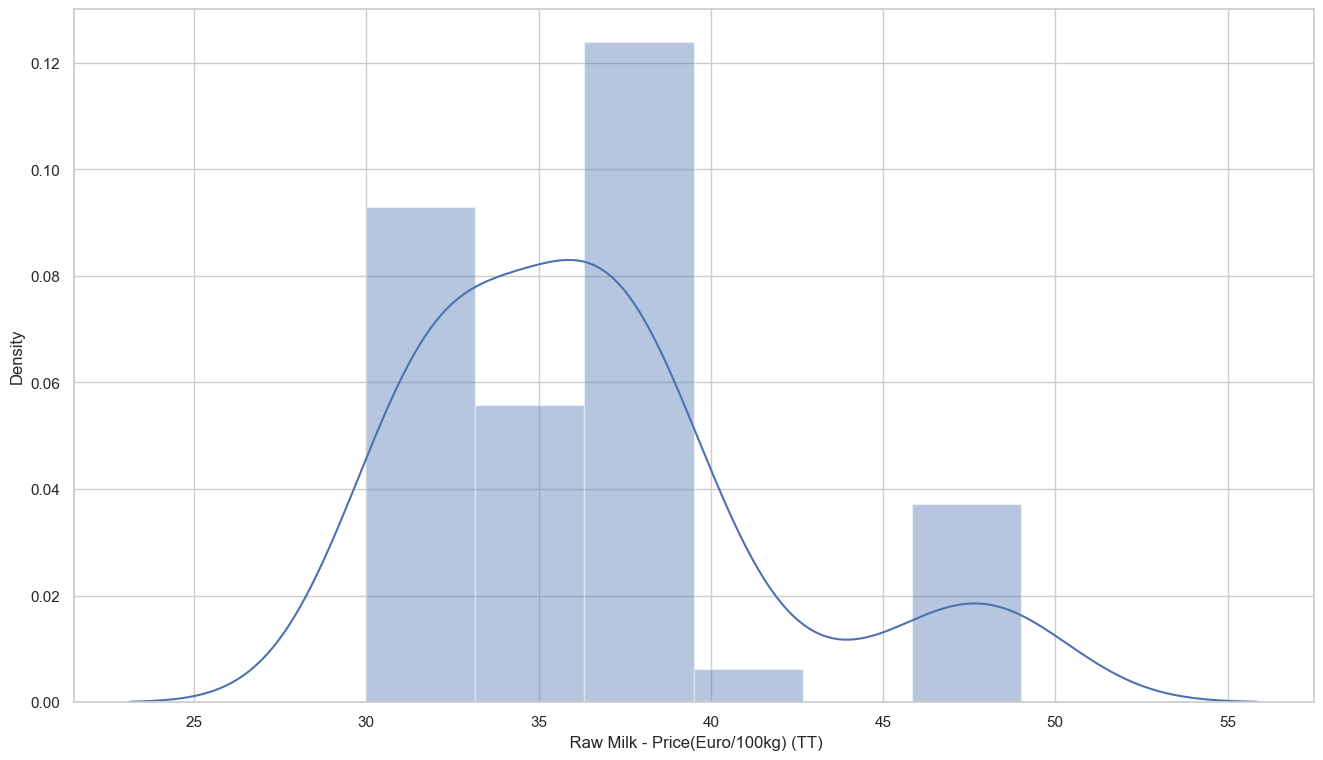

Drinking Milk (TT)
-0.730169744884289


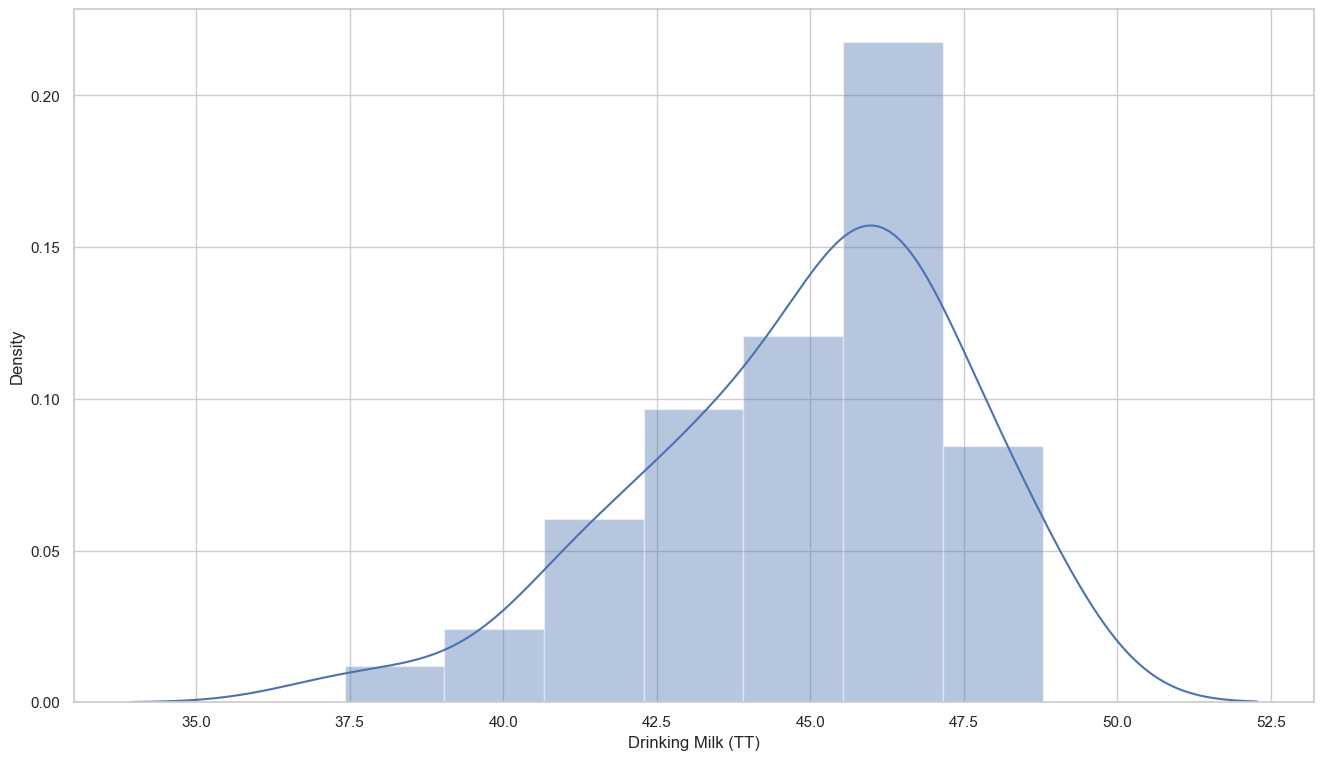

Raw Milk (TT)
-0.23494416858852765


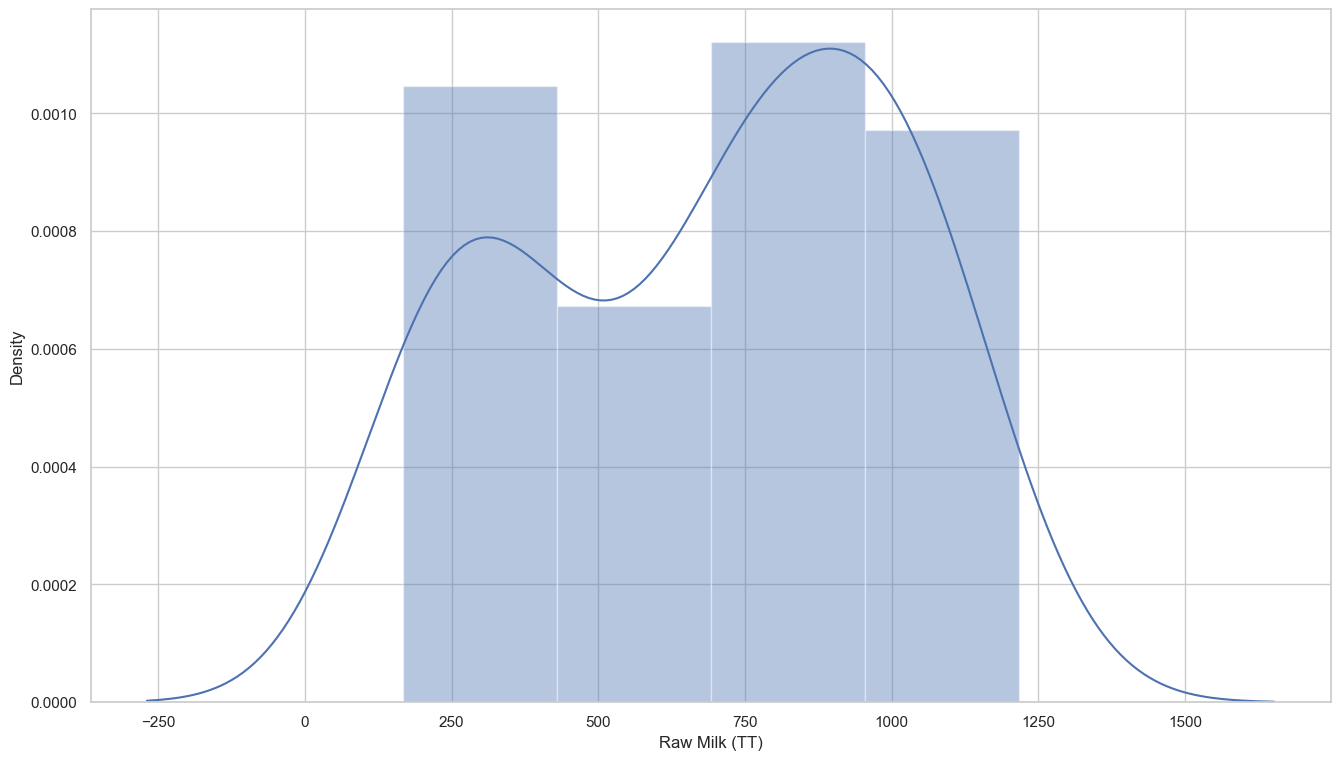

Cream (TT)
1.0132027256983644


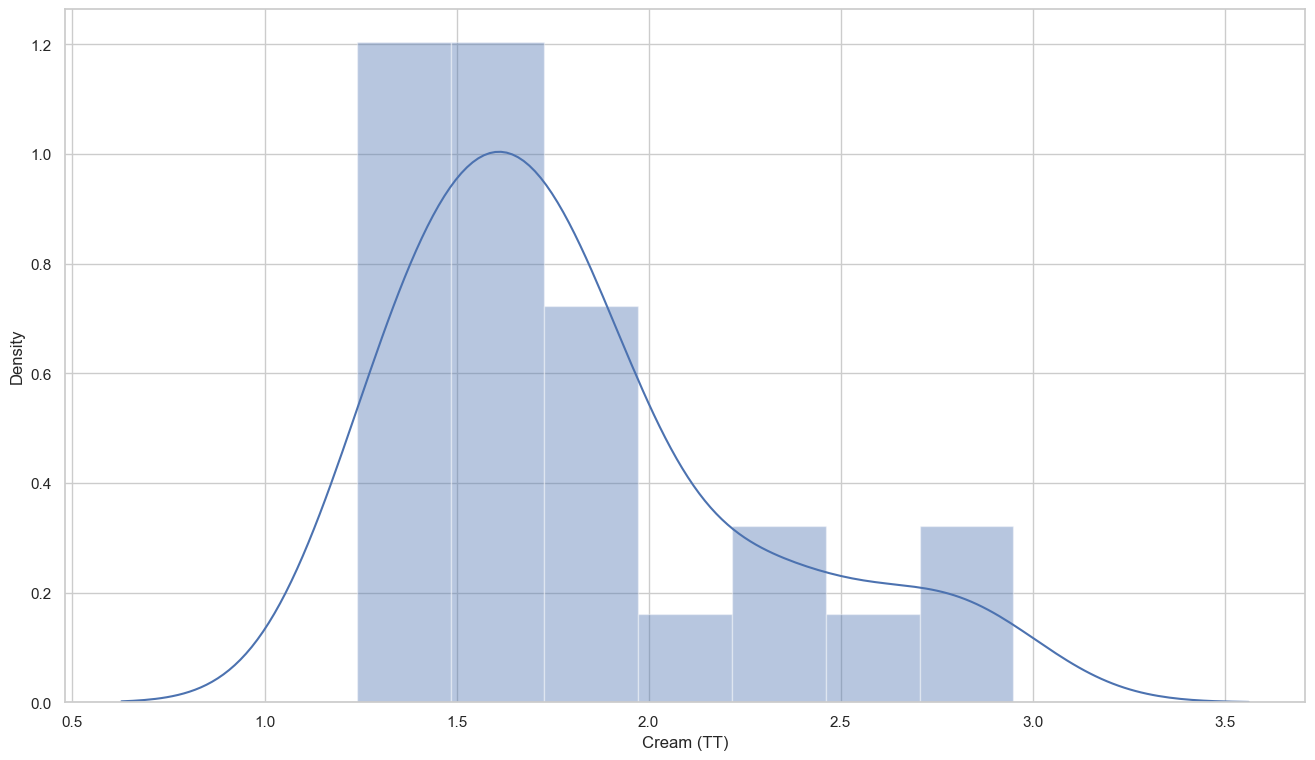

Butter (TT)
-0.4243145600057408


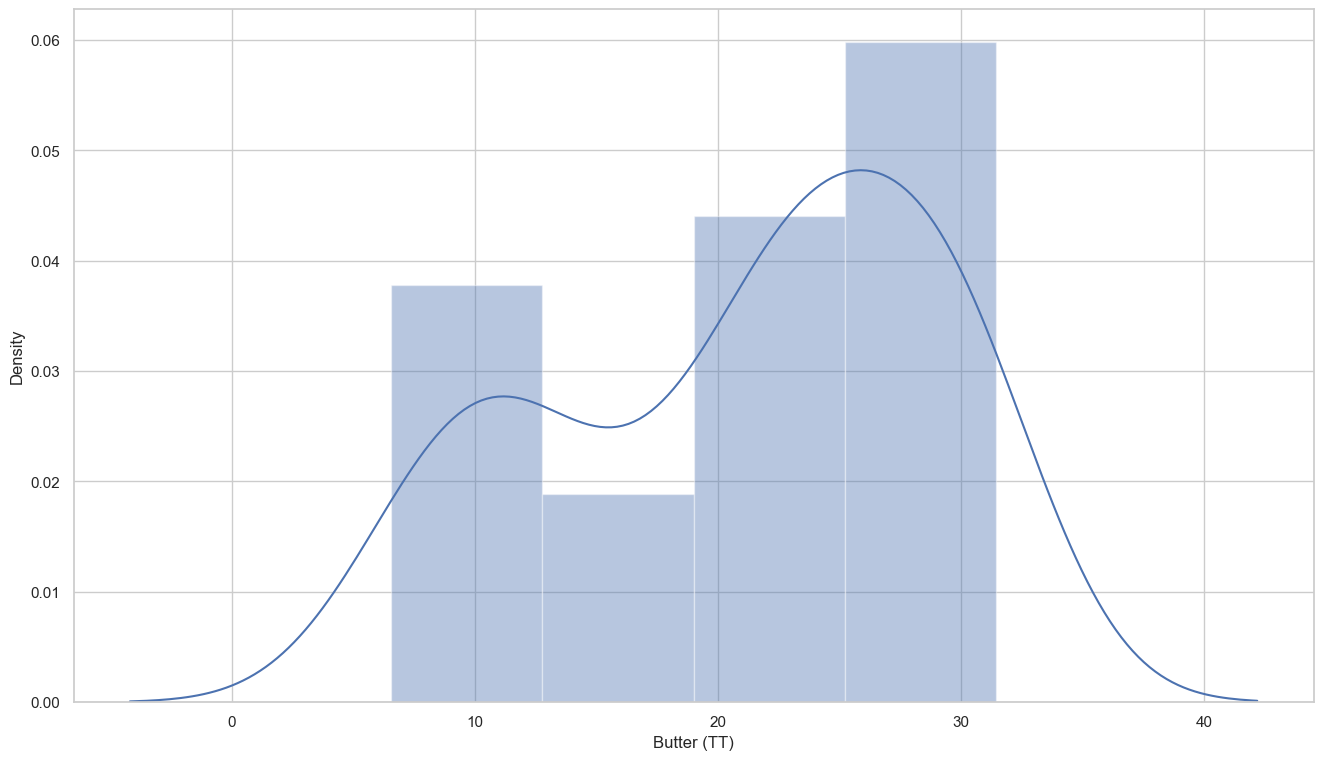

In [185]:
for col in df_col_merged_6: 
    print(col)
    print(skew(df_col_merged_6[col]))
   
    
    plt.figure(figsize=(16,9))
    sns.distplot(df_col_merged_6[col])
    plt.show()
    

Cream and raw milk price are positively skewed. By finding the square root of the data contained within these columns, some of the skewness can be removed.

In [186]:
df_col_merged_6[" Raw Milk - Price(Euro/100kg) (TT)"] = np.sqrt(df_col_merged_6[" Raw Milk - Price(Euro/100kg) (TT)"]) 

In [187]:
skew(df_col_merged_6[" Raw Milk - Price(Euro/100kg) (TT)"])

0.9484491275834978

In [188]:
df_col_merged_6["Cream (TT)"] = np.sqrt(df_col_merged_6["Cream (TT)"]) 

In [189]:
skew(df_col_merged_6["Cream (TT)"])

0.8138299358398057

 Raw Milk - Price(Euro/100kg) (TT)
0.9484491275834978


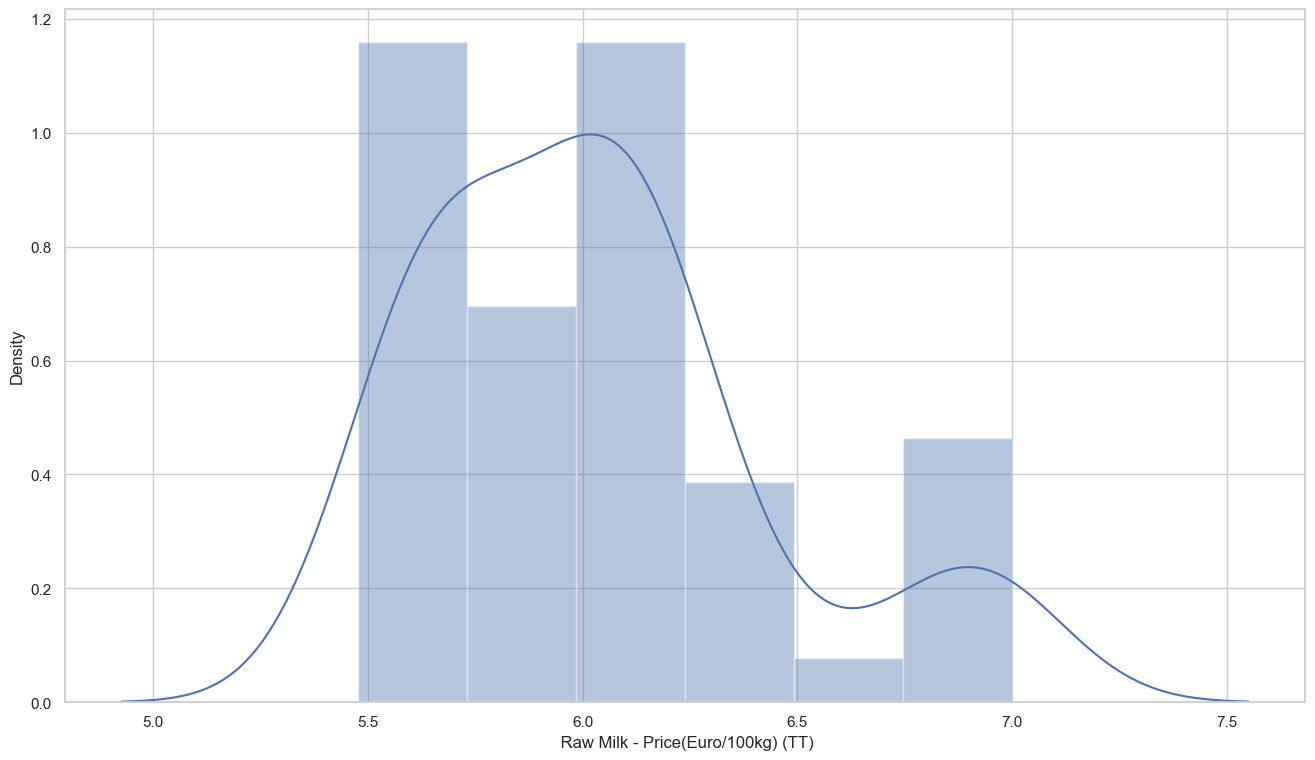

Drinking Milk (TT)
-0.730169744884289


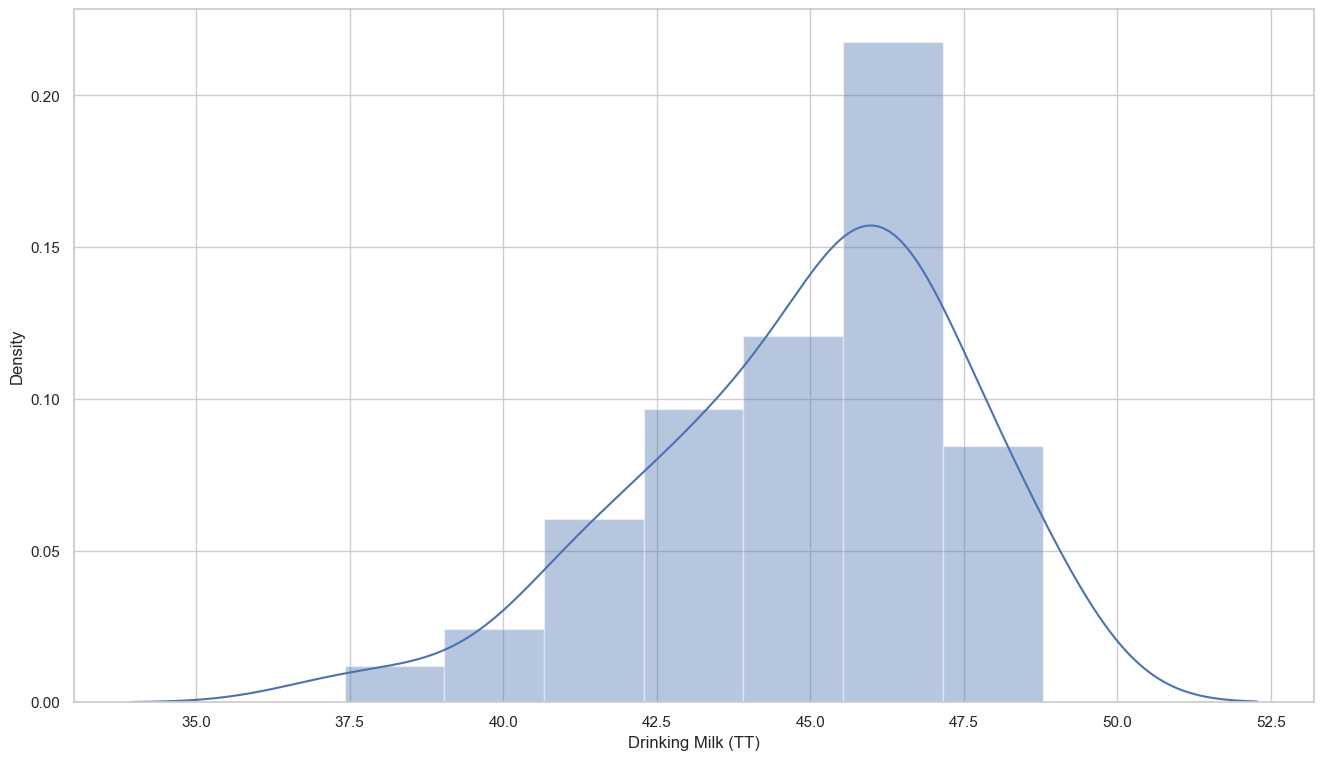

Raw Milk (TT)
-0.23494416858852765


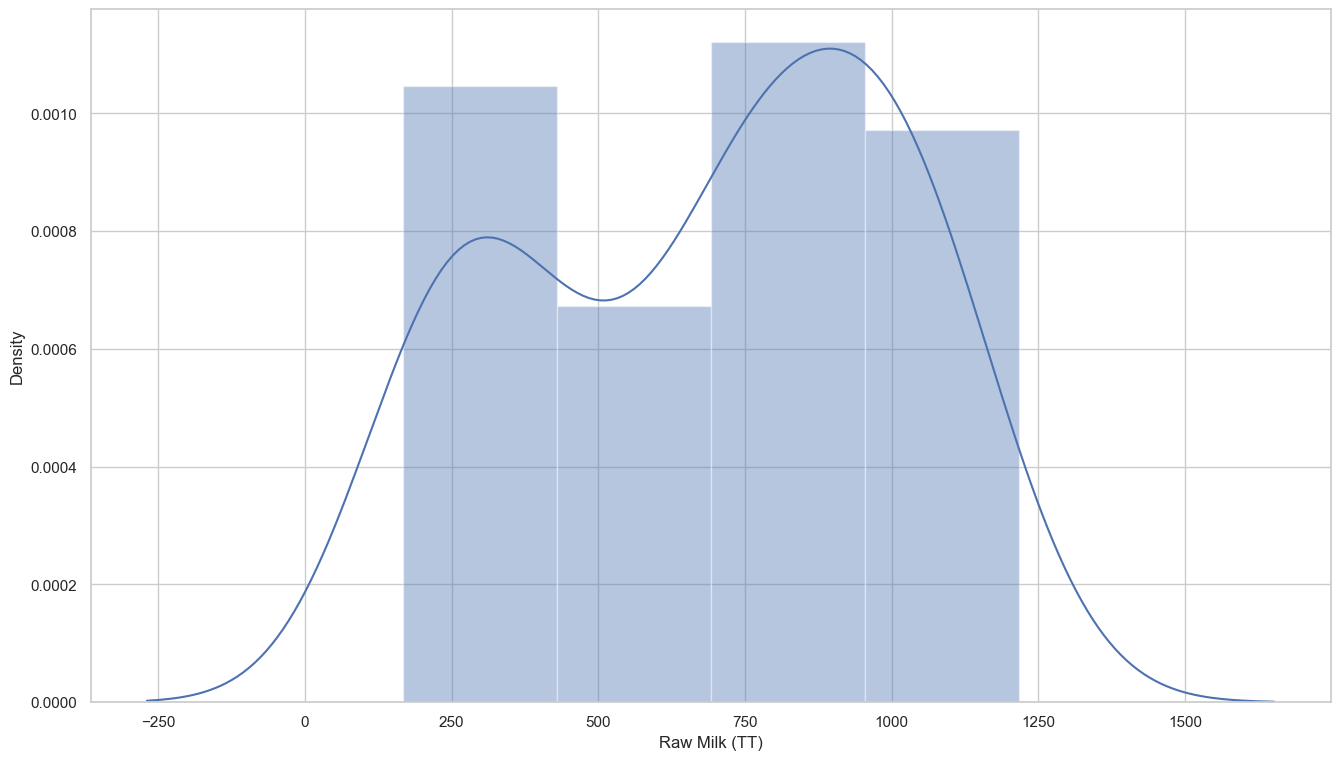

Cream (TT)
0.8138299358398057


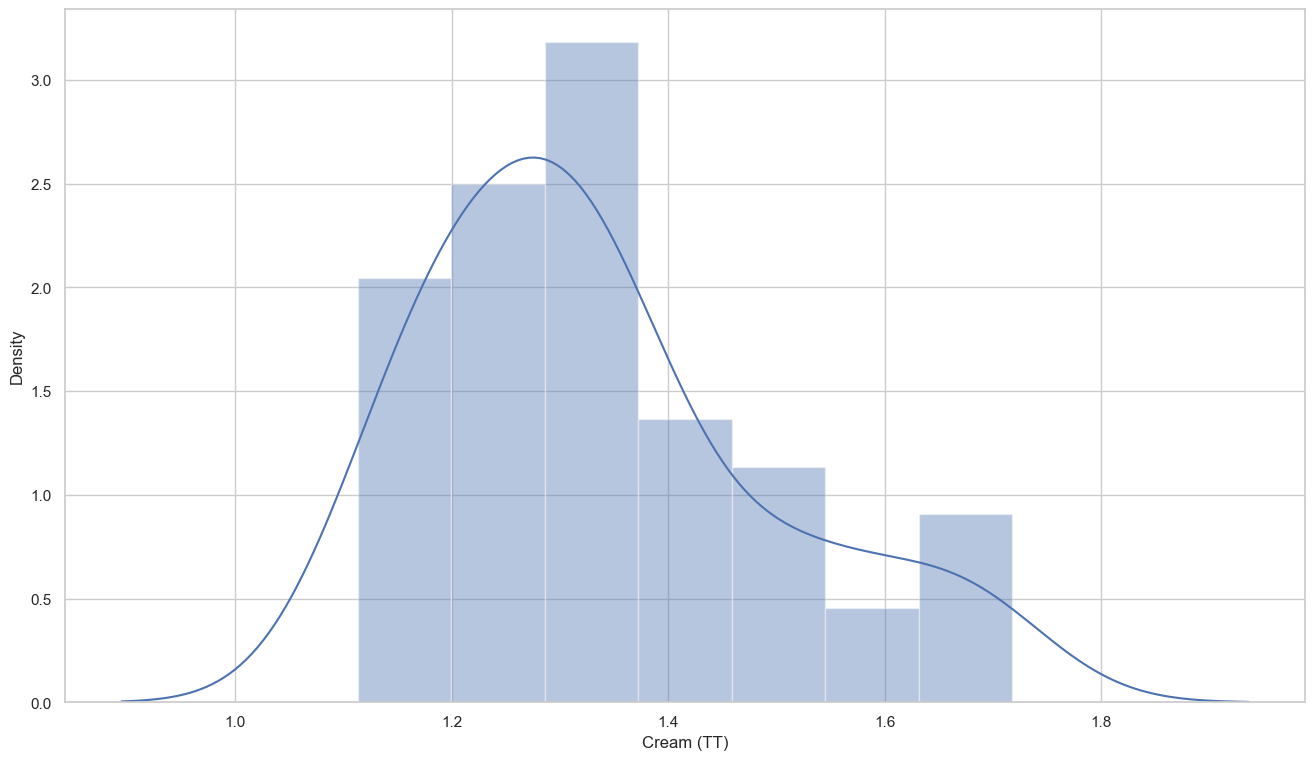

Butter (TT)
-0.4243145600057408


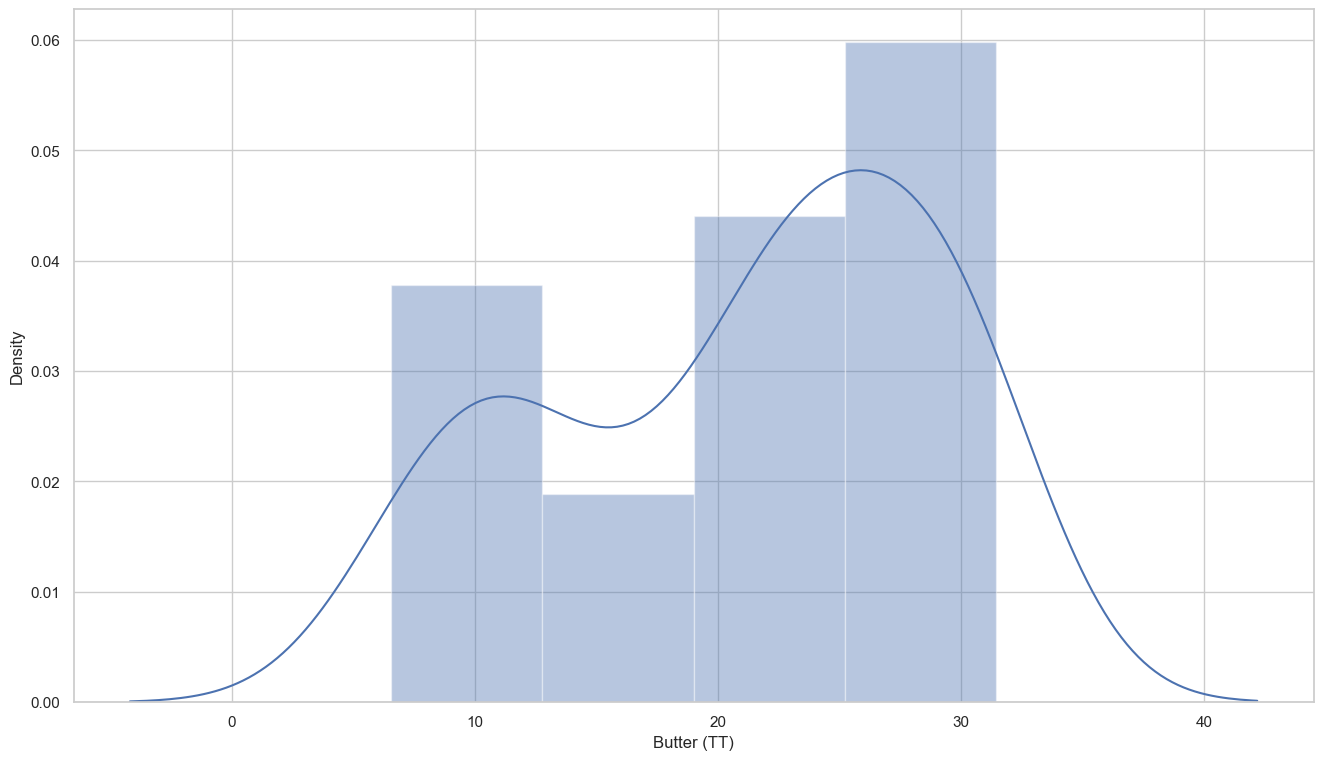

In [190]:
for col in df_col_merged_6: 
    print(col)
    print(skew(df_col_merged_6[col]))
   
    
    plt.figure(figsize=(16,9))
    sns.distplot(df_col_merged_6[col])
    plt.show()

Removing skewness from data can improve the correlation between variables. In this case there was only a slight alteration to the correlation relationship to the raw milk price

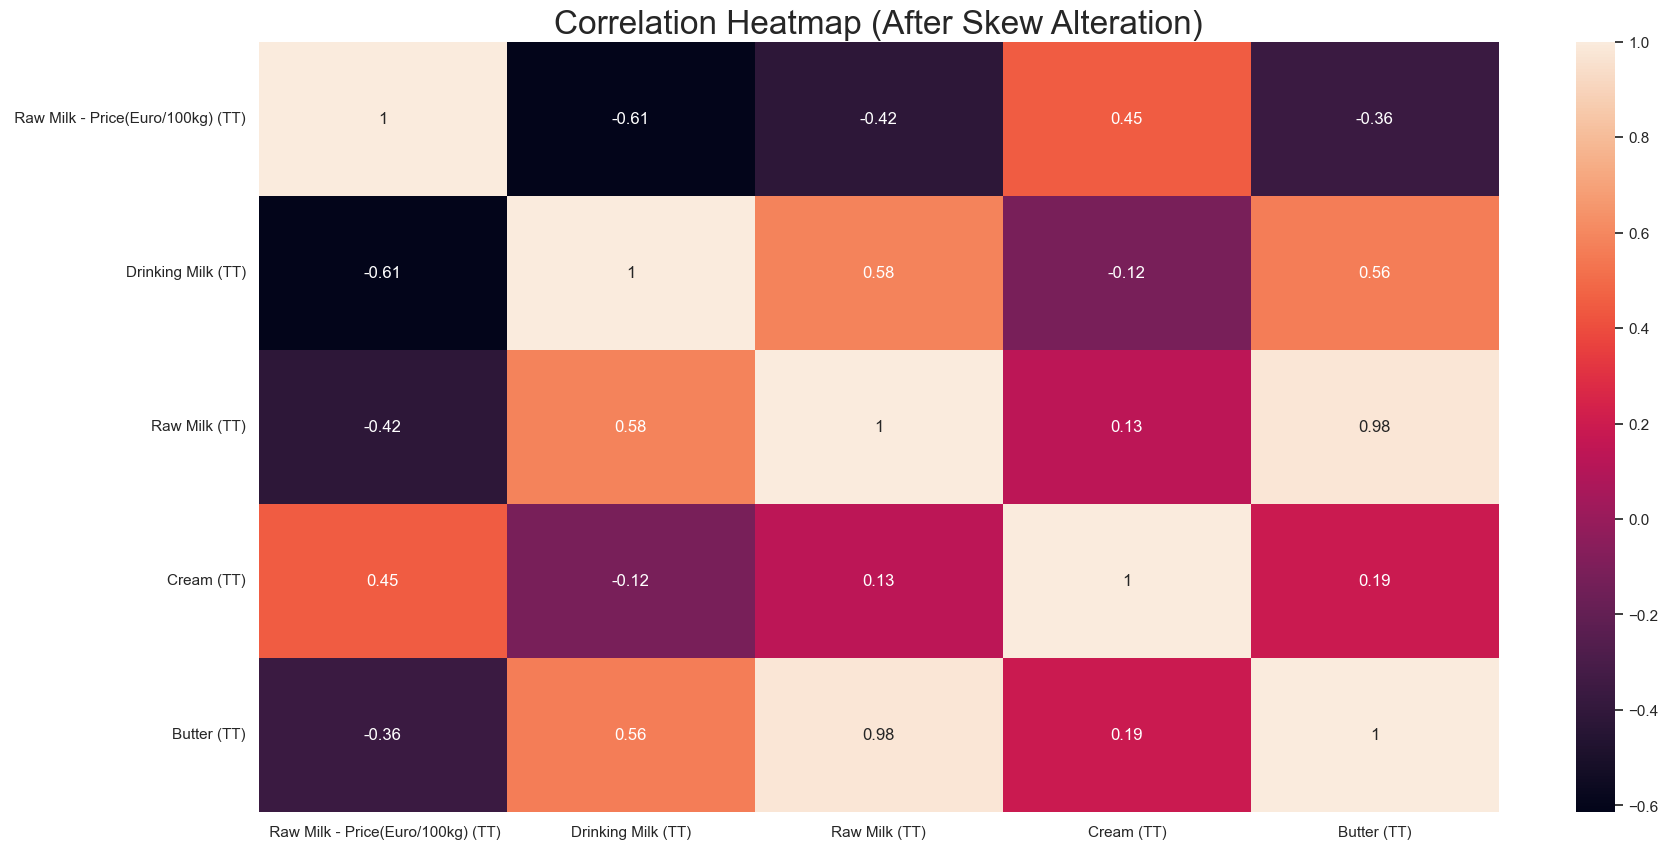

In [191]:
sns.heatmap(df_col_merged_6.corr(),annot=True)
plt.title("Correlation Heatmap (After Skew Alteration)", fontsize="24")
plt.show()

In [192]:
df_col_merged_6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2018-01-01 to 2022-03-01
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0    Raw Milk - Price(Euro/100kg) (TT)  51 non-null     float64
 1   Drinking Milk (TT)                  51 non-null     float64
 2   Raw Milk (TT)                       51 non-null     float64
 3   Cream (TT)                          51 non-null     float64
 4   Butter (TT)                         51 non-null     float64
dtypes: float64(5)
memory usage: 2.4 KB


Correlation scatter plots are used to visualise the relationship between the production of each dairy product and the price of raw milk by visually displaying each data point. The positive and negative correlation relationships demonstrated in the correlation matrix are reflected in these plots. Once again a traffic light system of colour is being to identify the strength of correlation. Green = strong. Orange = mild. Red - weak(relatively)

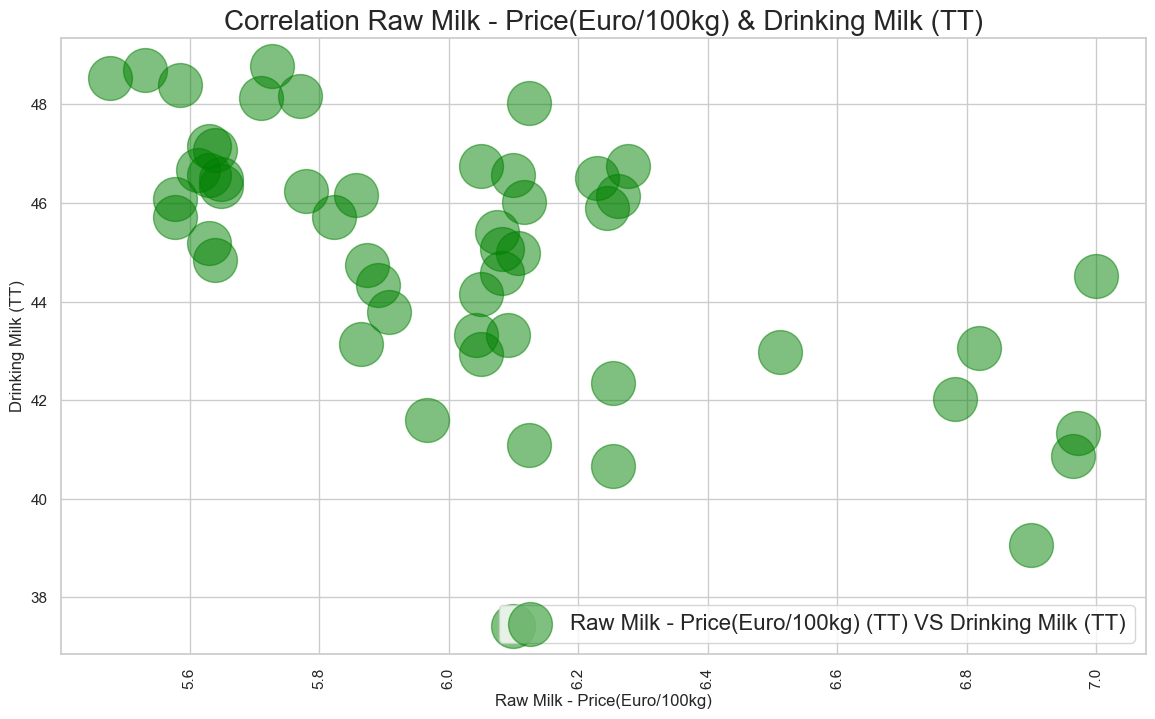

In [193]:
ax0 =df_col_merged_6.plot(kind='scatter',
                  x=' Raw Milk - Price(Euro/100kg) (TT)',
                  y='Drinking Milk (TT)',
                  figsize=(14,8),
                   s = 1000,
                             alpha=0.5,
                             c='green')

plt.xticks(rotation=90)

ax0.set_xlabel('Raw Milk - Price(Euro/100kg)', fontsize=12)
ax0.set_ylabel('Drinking Milk (TT)', fontsize=12)
ax0.set_title('Correlation Raw Milk - Price(Euro/100kg) & Drinking Milk (TT)', fontsize=20)
ax0.legend(['Raw Milk - Price(Euro/100kg) (TT) VS Drinking Milk (TT)', 'Drinking Milk (TT)'], loc='lower right', fontsize=16)

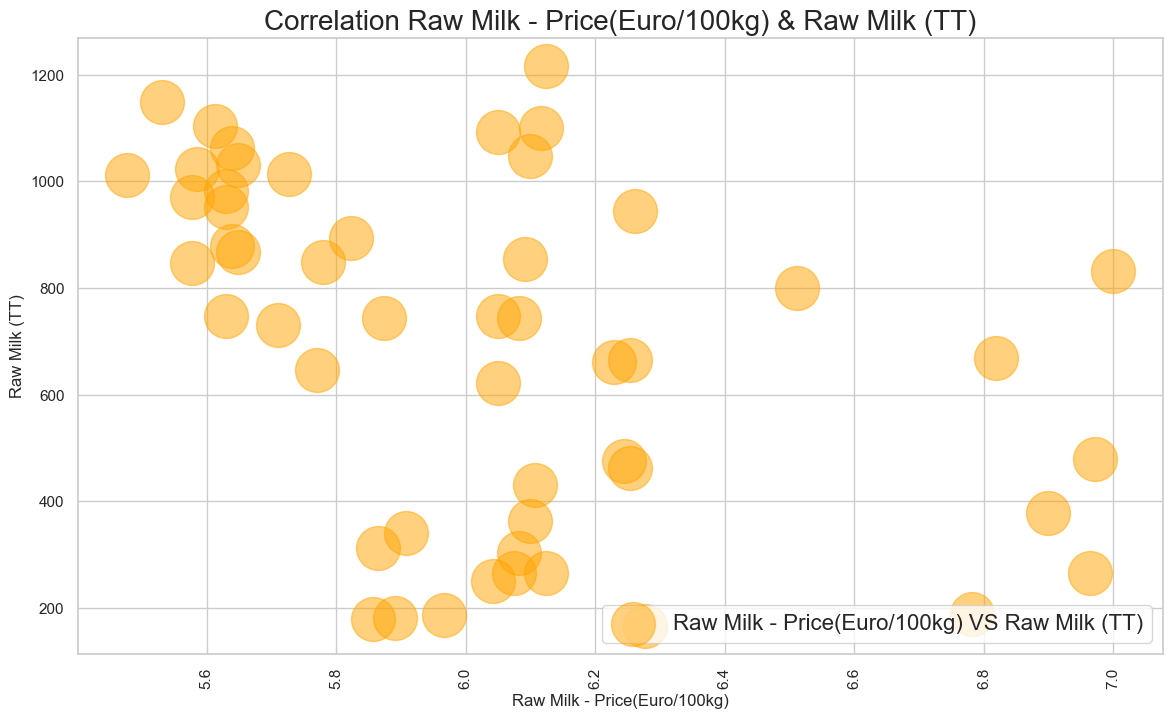

In [194]:
ax0 =df_col_merged_6.plot(kind='scatter',
                  x=' Raw Milk - Price(Euro/100kg) (TT)',
                  y='Raw Milk (TT)',
                  figsize=(14,8),
                   s = 1000,
                             alpha=0.5,
                             c='orange')

plt.xticks(rotation=90)

ax0.set_xlabel('Raw Milk - Price(Euro/100kg)', fontsize=12)
ax0.set_ylabel('Raw Milk (TT)', fontsize=12)
ax0.set_title('Correlation Raw Milk - Price(Euro/100kg) & Raw Milk (TT)', fontsize=20)
ax0.legend(['Raw Milk - Price(Euro/100kg) VS Raw Milk (TT)', 'Raw Milk (TT)'], loc='lower right', fontsize=16)

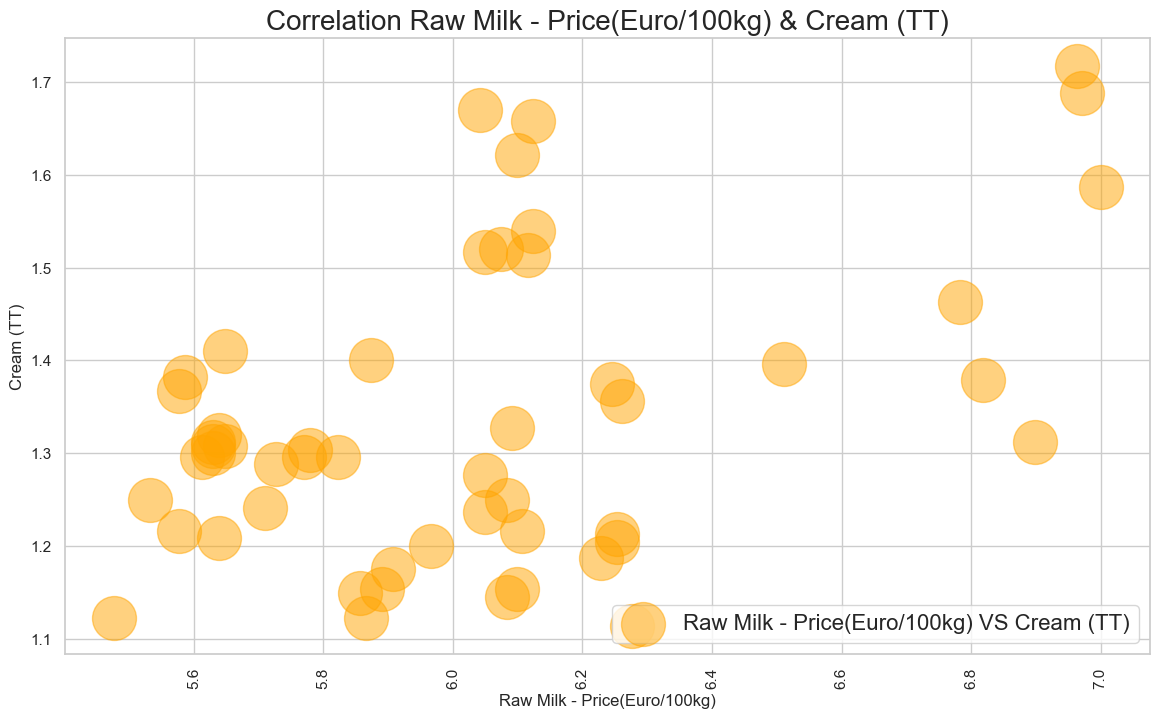

In [195]:
ax0 =df_col_merged_6.plot(kind='scatter',
                  x=' Raw Milk - Price(Euro/100kg) (TT)',
                  y='Cream (TT)',
                  figsize=(14,8),
                   s = 1000,
                             alpha=0.5,
                             c='orange')

plt.xticks(rotation=90)

ax0.set_xlabel('Raw Milk - Price(Euro/100kg)', fontsize=12)
ax0.set_ylabel('Cream (TT)', fontsize=12)
ax0.set_title('Correlation Raw Milk - Price(Euro/100kg) & Cream (TT)', fontsize=20)
ax0.legend(['Raw Milk - Price(Euro/100kg) VS Cream (TT)', 'Cream (TT)'], loc='lower right', fontsize=16)

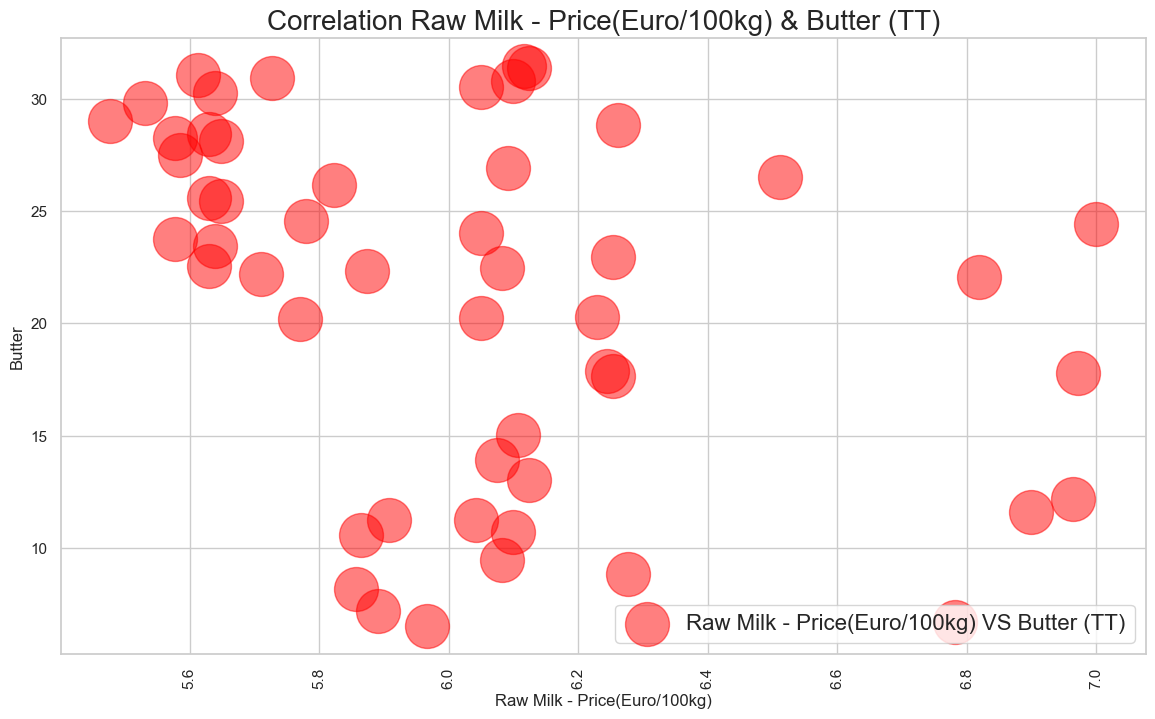

In [196]:
ax0 =df_col_merged_6.plot(kind='scatter',
                  x=' Raw Milk - Price(Euro/100kg) (TT)',
                  y='Butter (TT)',
                  figsize=(14,8),
                   s = 1000,
                             alpha=0.5,
                             c='red')

plt.xticks(rotation=90)

ax0.set_xlabel('Raw Milk - Price(Euro/100kg)', fontsize=12)
ax0.set_ylabel('Butter', fontsize=12)
ax0.set_title('Correlation Raw Milk - Price(Euro/100kg) & Butter (TT)', fontsize=20)
ax0.legend(['Raw Milk - Price(Euro/100kg) VS Butter (TT)', 'Butter'], loc='lower right', fontsize=16)

# Time Series Plots

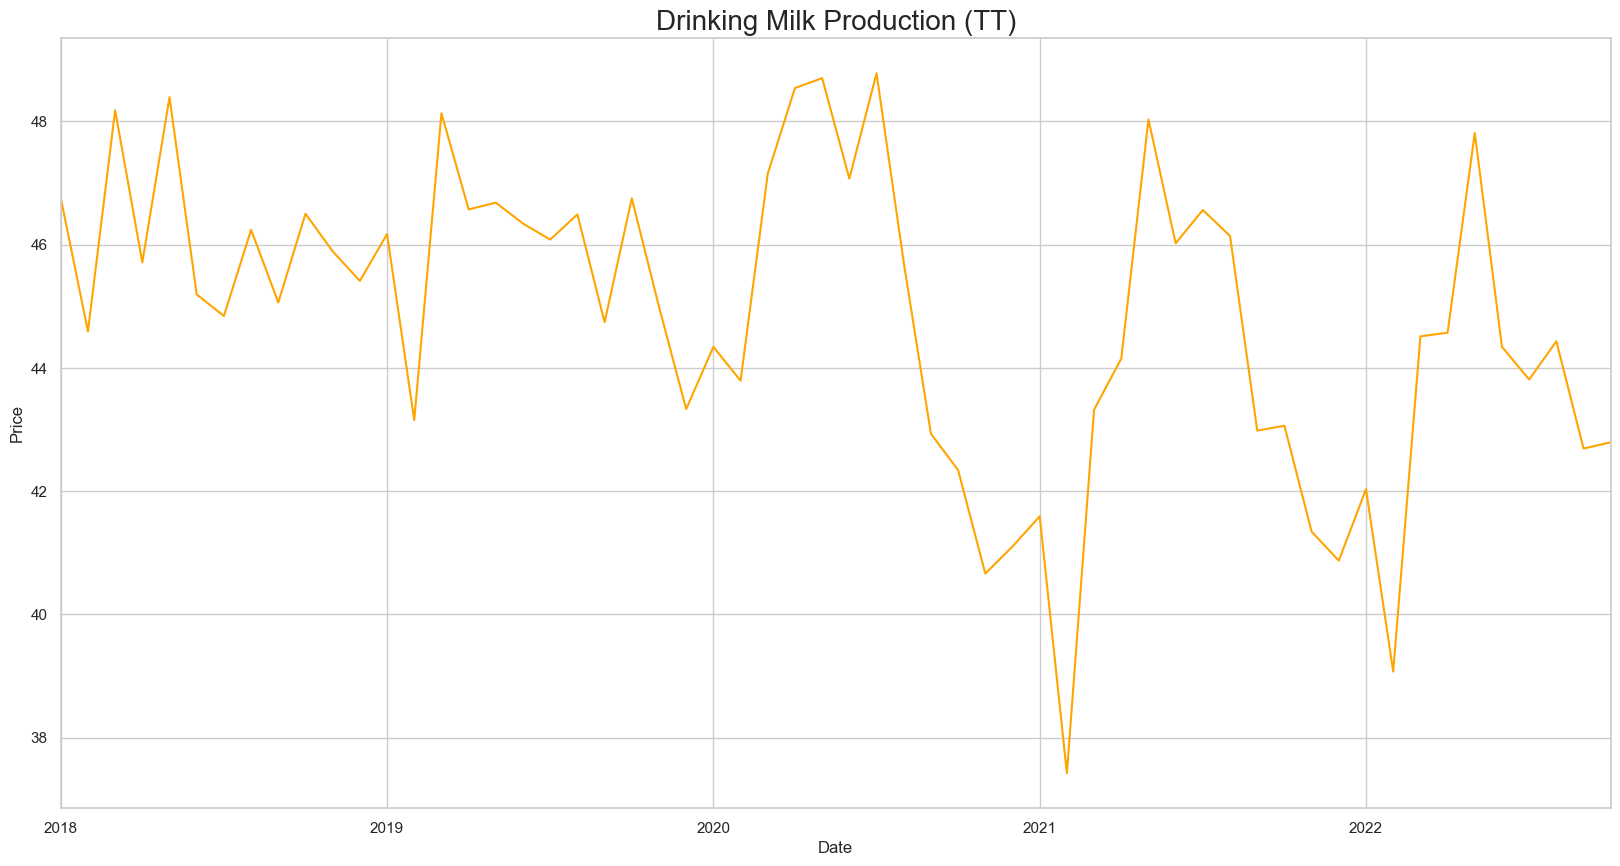

In [197]:
df_col_merged_4['Drinking Milk (TT)'].plot(color = 'orange')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Drinking Milk Production (TT)',fontsize=20)

plt.show()


In [198]:
df_col_merged_4['Raw Milk (TT)'].plot(color = 'green')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Raw Milk Production (TT)',fontsize=20)

plt.show()


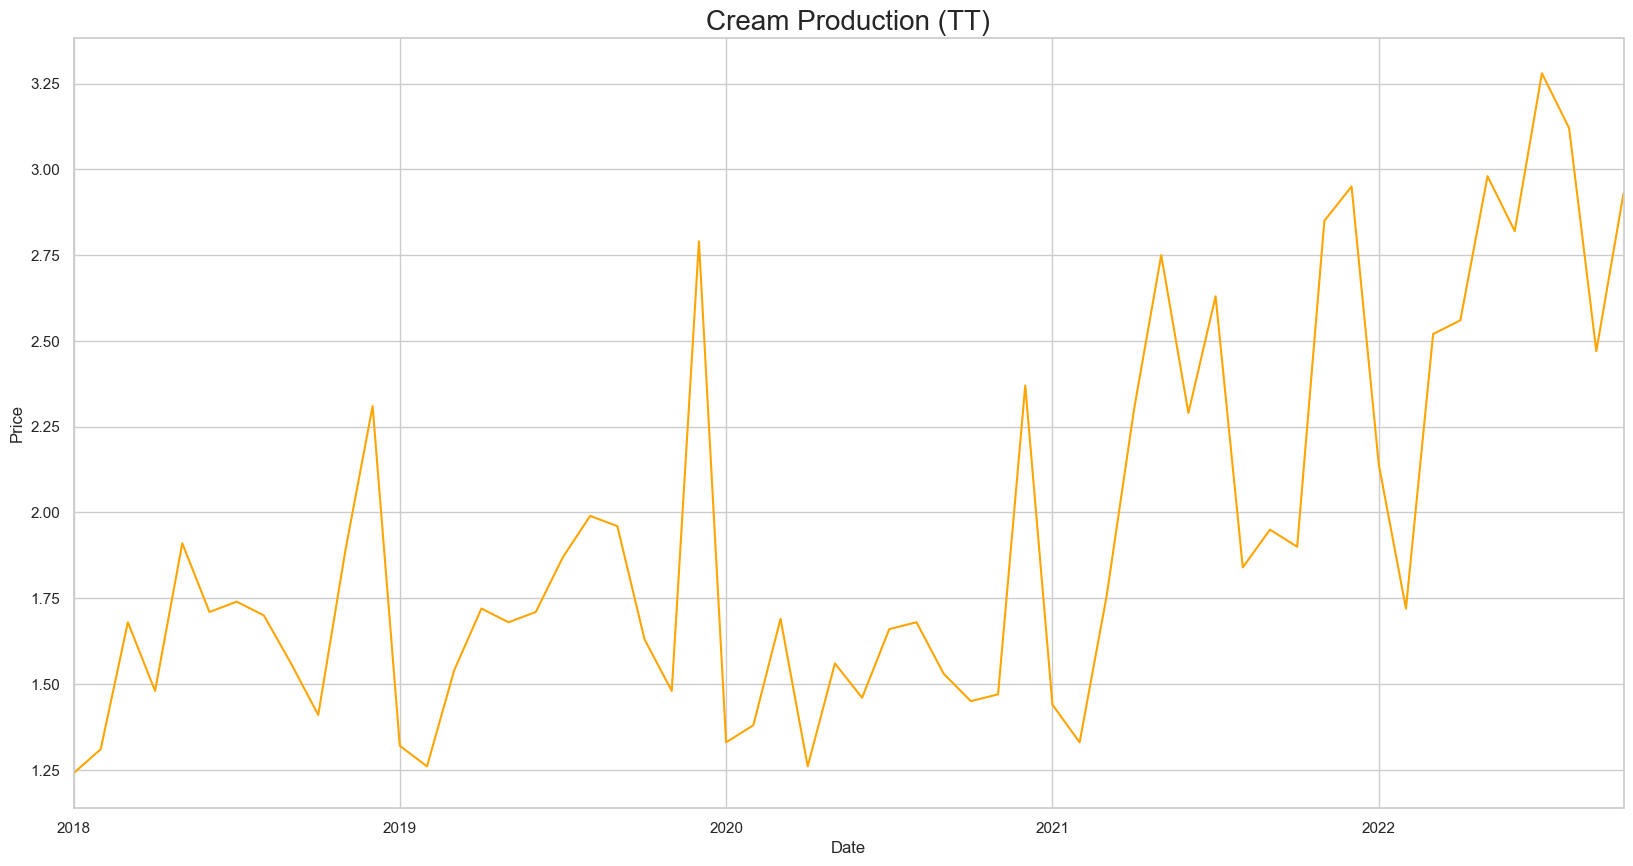

In [199]:
df_col_merged_4['Cream (TT)'].plot(color = 'orange')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Cream Production (TT)',fontsize=20)

plt.show()


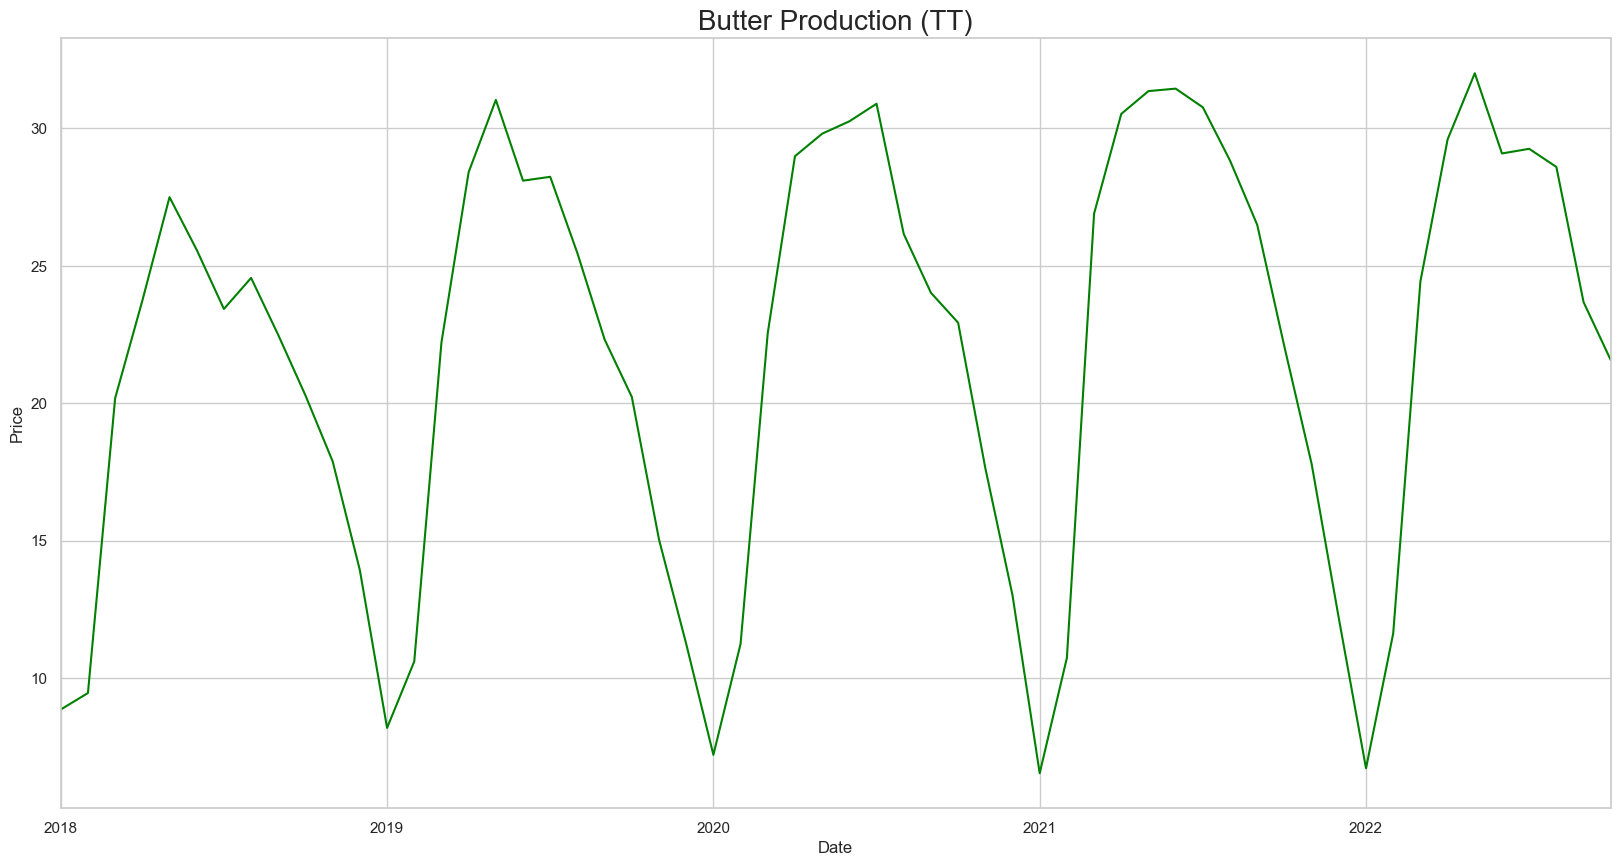

In [200]:
df_col_merged_4['Butter (TT)'].plot(color = 'green')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Butter Production (TT)',fontsize=20)

plt.show()

# Machine Learning

Splitting the data into target and training datasets. y_train contains the label/target raw milk price data while X_train contains the dairy category production data

In [201]:
X_train = df_col_merged_5.drop(" Raw Milk - Price(Euro/100kg) (TT)", axis="columns")
y_train= df_col_merged_5[" Raw Milk - Price(Euro/100kg) (TT)"].copy()

In [202]:
X_train.head()


Drinking Milk (TT)  Raw Milk (TT)  Cream (TT)  Butter (TT)
Date                                                                  
2018-01-01               46.76         166.56        1.24         8.85
2018-02-01               44.59         302.97        1.31         9.45
2018-03-01               48.18         646.08        1.68        20.18
2018-04-01               45.71         847.51        1.48        23.73
2018-05-01               48.39        1022.56        1.91        27.50

In [203]:
y_train.head()

Date
2018-01-01    39.4
2018-02-01    37.0
2018-03-01    33.3
2018-04-01    31.1
2018-05-01    31.2
Name:  Raw Milk - Price(Euro/100kg) (TT), dtype: float64

In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2)

In [205]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 4)
(11, 4)
(40,)
(11,)


Creating function to find Mean Absolute Error which will used to assess the accuracy of all 3 models

In [206]:
def MAE (true, predicted):
    MAE = mean_absolute_error(true,predicted)
    return MAE

In [207]:
import statsmodels.api as sm

Scale the data as well as find the ideal amount regressor neighbours as well the most efficient method

In [208]:
pipeline = Pipeline(steps = [('scaler', StandardScaler()),
                               ('regressor', KNeighborsRegressor())])

parameters = {'regressor__n_neighbors':[1,3,5,7,9],
             'regressor__metric':['manhattan','euclidean','minkowski']}

gs = GridSearchCV(estimator=pipeline,
                 param_grid=parameters,
                 verbose = 1)

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'regressor__metric': 'euclidean', 'regressor__n_neighbors': 5}

In [209]:
knn_tuned_pred_test=gs.predict(X_test)
knn_tuned_pred_train=gs.predict(X_train)

In [210]:
knn_tuned_df=pd.DataFrame({"Actual Output":y_train, 'KNN Tuned Predicted Output':knn_tuned_pred_train})

In [211]:
np.abs(r2_score(y_train,knn_tuned_pred_train))

0.5624712546736319

In [212]:
np.sqrt(mean_squared_error(y_test,knn_tuned_pred_test))

4.0049832595269255

In [213]:
gs.score(X_test, y_test)

0.5283256374612371

print results

In [214]:
print("KNN Tuned Results")
print("R2:", np.abs(r2_score(y_train,knn_tuned_pred_train)))
print("MAE:", MAE(y_train,knn_tuned_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_test,knn_tuned_pred_test)))

KNN Tuned Results
R2: 0.5624712546736319
MAE: 2.2245
RMSE: 4.0049832595269255


Plot results

Text(0.5, 1.0, 'KNN Tuned')

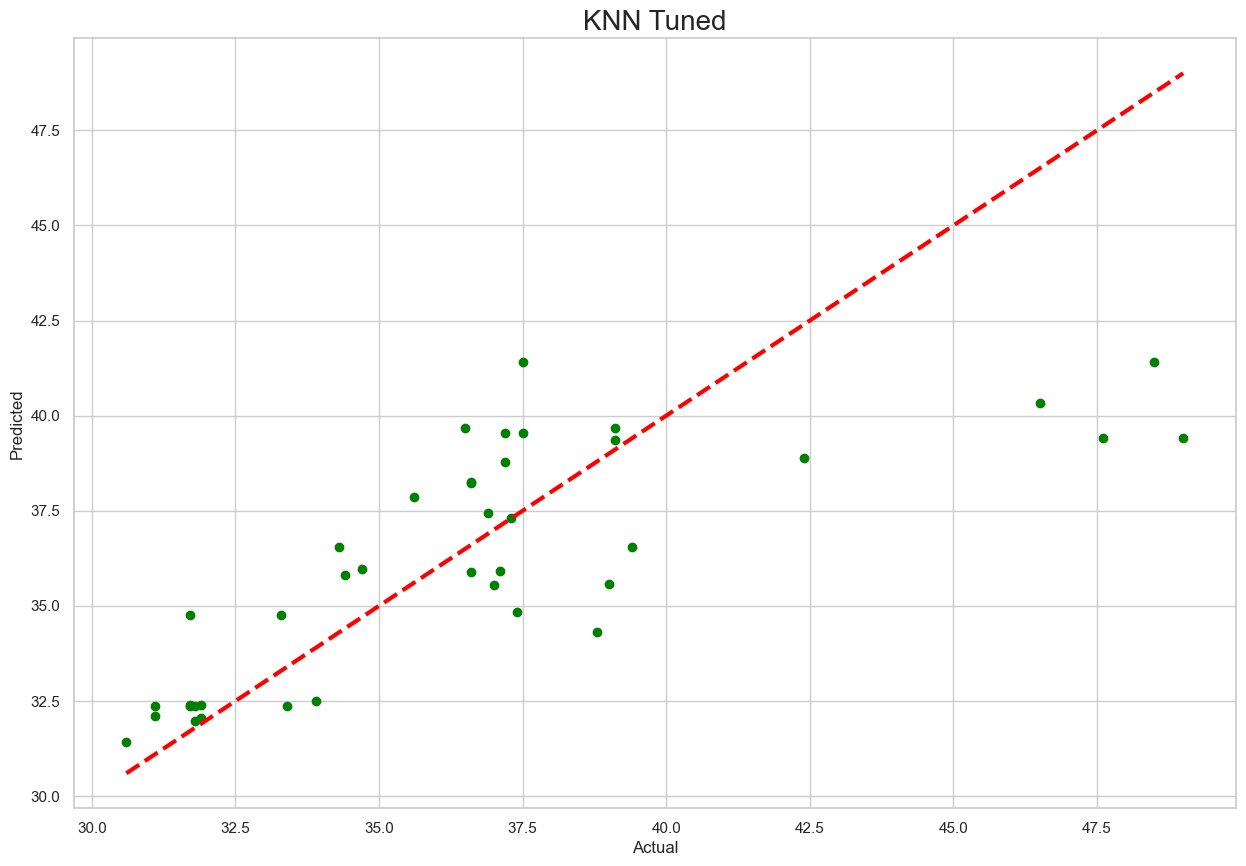

In [215]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,knn_tuned_pred_train,c='green')
plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()],'k--',c='red',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("KNN Tuned",fontsize=20)

In [216]:
knn_tuned_df[0:10]

Actual Output  KNN Tuned Predicted Output
Date                                                 
2018-07-01           31.8                       32.38
2019-12-01           36.5                       39.68
2020-05-01           30.6                       31.42
2020-08-01           33.9                       32.50
2018-04-01           31.1                       32.38
2021-09-01           42.4                       38.88
2020-01-01           34.7                       35.96
2021-07-01           37.2                       39.54
2018-06-01           31.7                       32.38
2018-11-01           39.0                       35.58

In [217]:
def getTotalAbsoluteError(X_t, y_t, modelInput):
    predictedValues = modelInput.predict(X_t)
    errors = y_t-predictedValues
    return(sum(abs(errors)))

Finding the optimal maximum depth number for the Decision Tree.


In [218]:

err=[]
errIndex=[]
errTest=[]
for treedepth in range(1,20):
    clf2 = DecisionTreeRegressor(random_state=2345, max_depth=treedepth)
    model2 = clf2.fit(X_train, y_train)
    err.append(getTotalAbsoluteError(X_train, y_train, model2))
    errTest.append(getTotalAbsoluteError(X_test, y_test, model2))
    errIndex.append(treedepth)
    
fig, ax = plt.subplots()
ax.plot(errIndex, err,'rs-' , color="orange",linewidth=1.5)
ax.plot(errIndex, errTest,'rs-' , color="green",linewidth=1.5)
ax.set_xlabel("Max tree Depth")
ax.set_ylabel("Total Error(MAE)")
ax.set_title("Error vs Tree Depth for training set")
plt.legend(["Train", "Validate"])

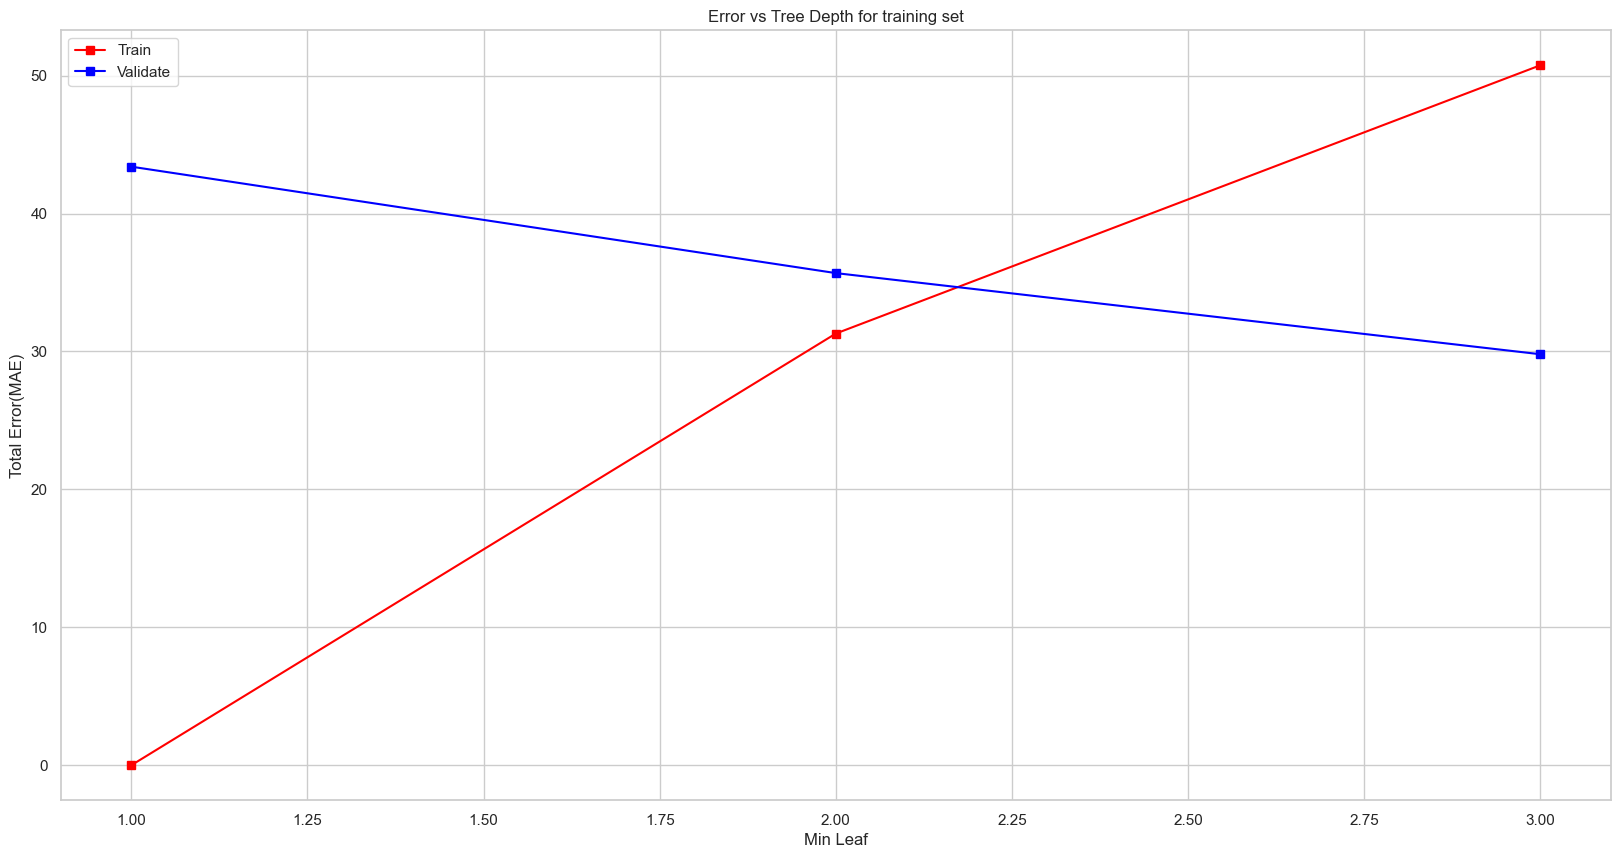

In [219]:
err=[]
errIndex=[]
errTest=[]
for leafcount in range(1,4):
    clf2 = DecisionTreeRegressor(random_state=2345, min_samples_leaf=leafcount)
    model2 = clf2.fit(X_train, y_train)
    err.append(getTotalAbsoluteError(X_train, y_train, model2))
    errTest.append(getTotalAbsoluteError(X_test, y_test, model2))
    errIndex.append(leafcount)
    
fig, ax = plt.subplots()
ax.plot(errIndex, err,'rs-' , color="red",linewidth=1.5)
ax.plot(errIndex, errTest,'rs-' , color="blue",linewidth=1.5)
ax.set_xlabel("Min Leaf")
ax.set_ylabel("Total Error(MAE)")
ax.set_title("Error vs Tree Depth for training set")
plt.legend(["Train", "Validate"])

Training the decision tree based oof max & min leaves based on the parameter tuning graph findings

In [407]:
dtr1 = DecisionTreeRegressor(max_depth=4,
                             min_samples_leaf=2,
                             random_state=1)

In [408]:
dt_model = dtr1.fit(X_train,y_train)

In [409]:
dt_model.score(X_test, y_test)

0.5954735121583977

In [410]:
dt_pred_test=dt_model.predict(X_test)
dt_pred_train=dt_model.predict(X_train)


In [411]:
print("Decision Tree results")
print("R2:", np.abs(r2_score(y_train,dt_pred_train)))
print("MAE:", MAE(y_train,dt_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_test,dt_pred_test)))

Decision Tree results
R2: 0.8244101680826362
MAE: 1.2314999999999992
RMSE: 3.7089677019544696


Text(0.5, 1.0, 'Decision Tree')

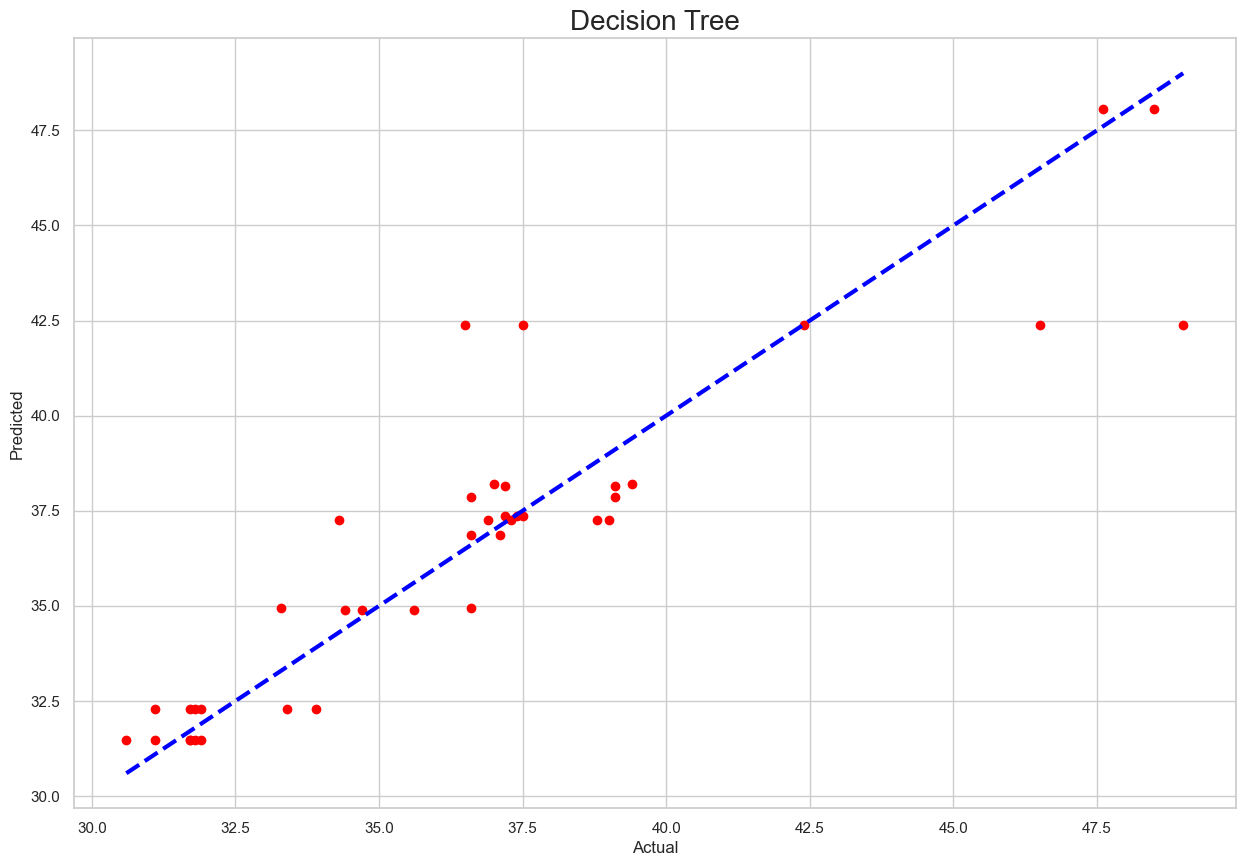

In [412]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,dt_pred_train,c='red')
plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Decision Tree",fontsize=20)

print the decision tree.

In [413]:
print(tree.export_text(clf2))

|--- feature_0 <= 44.55
|   |--- feature_2 <= 1.62
|   |   |--- feature_1 <= 337.73
|   |   |   |--- value: [34.90]
|   |   |--- feature_1 >  337.73
|   |   |   |--- value: [38.00]
|   |--- feature_2 >  1.62
|   |   |--- feature_3 <= 25.46
|   |   |   |--- feature_1 <= 322.39
|   |   |   |   |--- value: [40.83]
|   |   |   |--- feature_1 >  322.39
|   |   |   |   |--- value: [47.70]
|   |   |--- feature_3 >  25.46
|   |   |   |--- value: [38.70]
|--- feature_0 >  44.55
|   |--- feature_1 <= 704.18
|   |   |--- feature_0 <= 46.03
|   |   |   |--- value: [37.55]
|   |   |--- feature_0 >  46.03
|   |   |   |--- value: [36.48]
|   |--- feature_1 >  704.18
|   |   |--- feature_2 <= 2.14
|   |   |   |--- feature_1 <= 922.77
|   |   |   |   |--- feature_3 <= 24.14
|   |   |   |   |   |--- value: [31.53]
|   |   |   |   |--- feature_3 >  24.14
|   |   |   |   |   |--- value: [33.07]
|   |   |   |--- feature_1 >  922.77
|   |   |   |   |--- feature_3 <= 28.32
|   |   |   |   |   |--- value: [31

In [414]:
pred_dt_df=pd.DataFrame({"Actual Price":y_train, 'Decsion Tree Predicted Price':dt_pred_train})

In [594]:
pred_dt_df[0:10]

Actual Price  Decsion Tree Predicted Price
Date                                                  
2018-07-01          31.8                     32.300000
2019-12-01          36.5                     42.380000
2020-05-01          30.6                     31.466667
2020-08-01          33.9                     32.300000
2018-04-01          31.1                     32.300000
2021-09-01          42.4                     42.380000
2020-01-01          34.7                     34.900000
2021-07-01          37.2                     37.366667
2018-06-01          31.7                     31.466667
2018-11-01          39.0                     37.260000

In [416]:
lm=LinearRegression(fit_intercept=True)
lin_lm=lm.fit(X_train,y_train)

In [417]:
lm.coef_

array([-0.80482086, -0.01403439,  3.76557992,  0.47406332])

In [418]:
lm.score(X_test, y_test)

0.790326768500536

In [419]:
y_pred_test=lin_lm.predict(X_test)
y_pred_train=lin_lm.predict(X_train)


In [420]:
np.abs(r2_score(y_train,y_pred_train))

0.4640309923246978

In [421]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

2.670244712908536

In [422]:
print("Linear Regression results")
print("R2:", np.abs(r2_score(y_train,y_pred_train)))
print("MAE:", MAE(y_train,y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Linear Regression results
R2: 0.4640309923246978
MAE: 2.6310470853420567
RMSE: 2.670244712908536


Text(0.5, 1.0, 'Linear Regression')

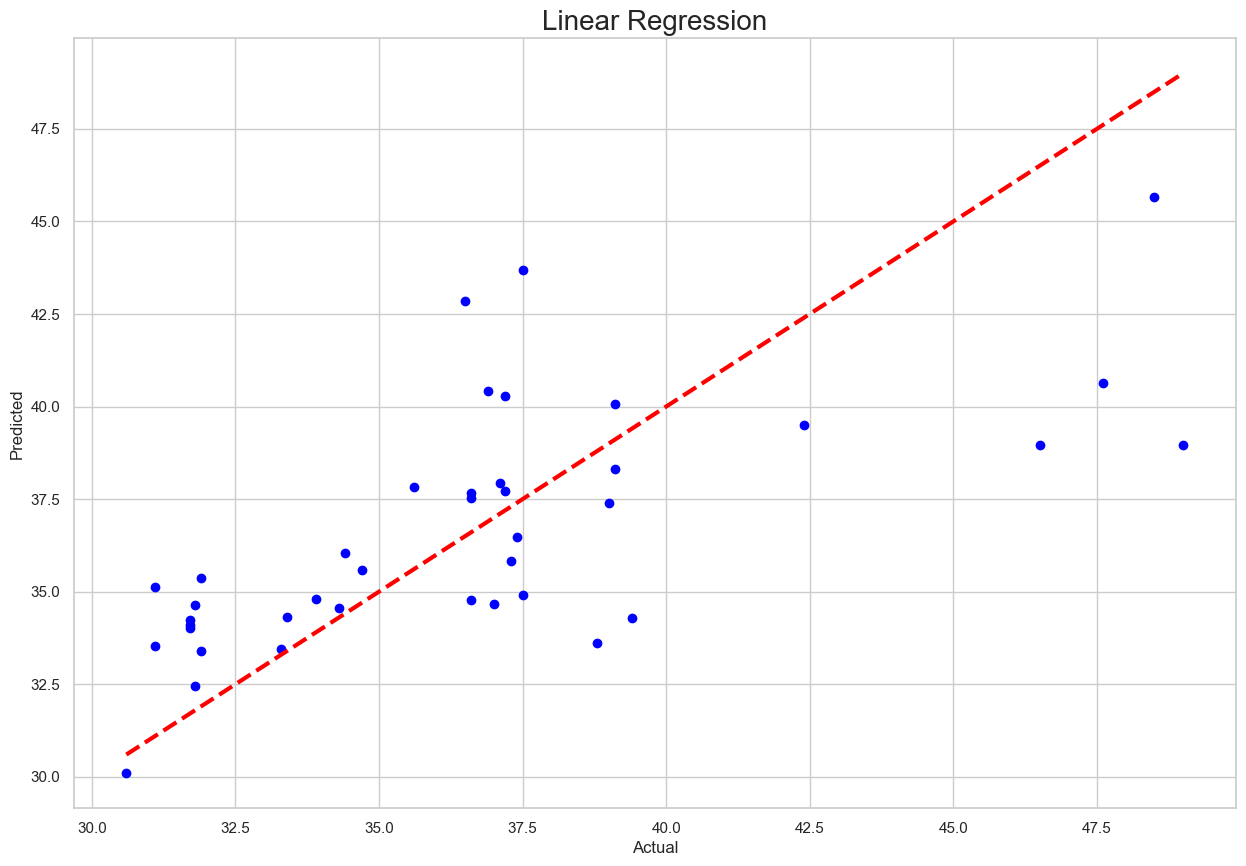

In [423]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train,c='blue')
plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()],'k--',c='red',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression",fontsize=20)

In [424]:
pred_y_df=pd.DataFrame({"Actual Output":y_train, 'Lin Reg Predicted Output':y_pred_train})

In [425]:
pred_y_df[0:10]

Actual Output  Lin Reg Predicted Output
Date                                               
2018-07-01           31.8                 34.639927
2019-12-01           36.5                 42.842289
2020-05-01           30.6                 30.095384
2020-08-01           33.9                 34.803229
2018-04-01           31.1                 33.541757
2021-09-01           42.4                 39.487718
2020-01-01           34.7                 35.590865
2021-07-01           37.2                 37.719165
2018-06-01           31.7                 34.234384
2018-11-01           39.0                 37.396300

In [426]:
df_col_merged_4.head()

Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
Date                                                                 
2018-01-01                                39.4               46.76   
2018-02-01                                37.0               44.59   
2018-03-01                                33.3               48.18   
2018-04-01                                31.1               45.71   
2018-05-01                                31.2               48.39   

            Raw Milk (TT)  Cream (TT)  Butter (TT)  
Date                                                
2018-01-01         166.56        1.24         8.85  
2018-02-01         302.97        1.31         9.45  
2018-03-01         646.08        1.68        20.18  
2018-04-01         847.51        1.48        23.73  
2018-05-01        1022.56        1.91        27.50

# Forecasting

In [427]:
forecast_df = df_col_merged_4.drop(columns=[' Raw Milk - Price(Euro/100kg) (TT)','Drinking Milk (TT)','Cream (TT)','Butter (TT)'])

In [428]:
forecast_df.head()

Raw Milk (TT)
Date                     
2018-01-01         166.56
2018-02-01         302.97
2018-03-01         646.08
2018-04-01         847.51
2018-05-01        1022.56

In [429]:
ts = forecast_df['Raw Milk (TT)']

<AxesSubplot:xlabel='Date'>

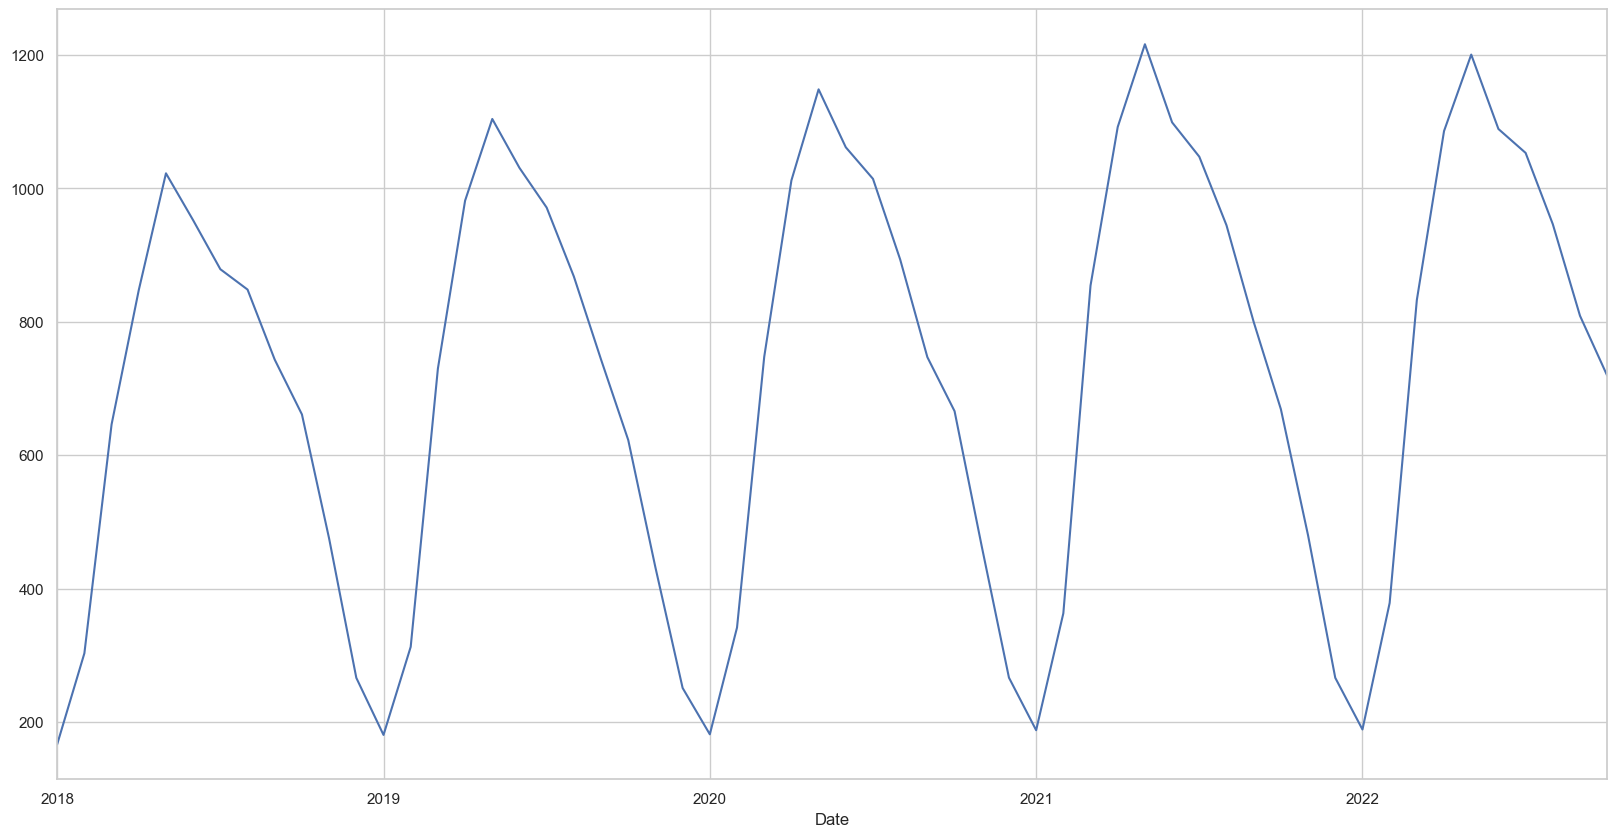

In [430]:
ts.plot()

In [431]:
ts.head()

Date
2018-01-01     166.56
2018-02-01     302.97
2018-03-01     646.08
2018-04-01     847.51
2018-05-01    1022.56
Name: Raw Milk (TT), dtype: float64

In [432]:
import statsmodels.api as st

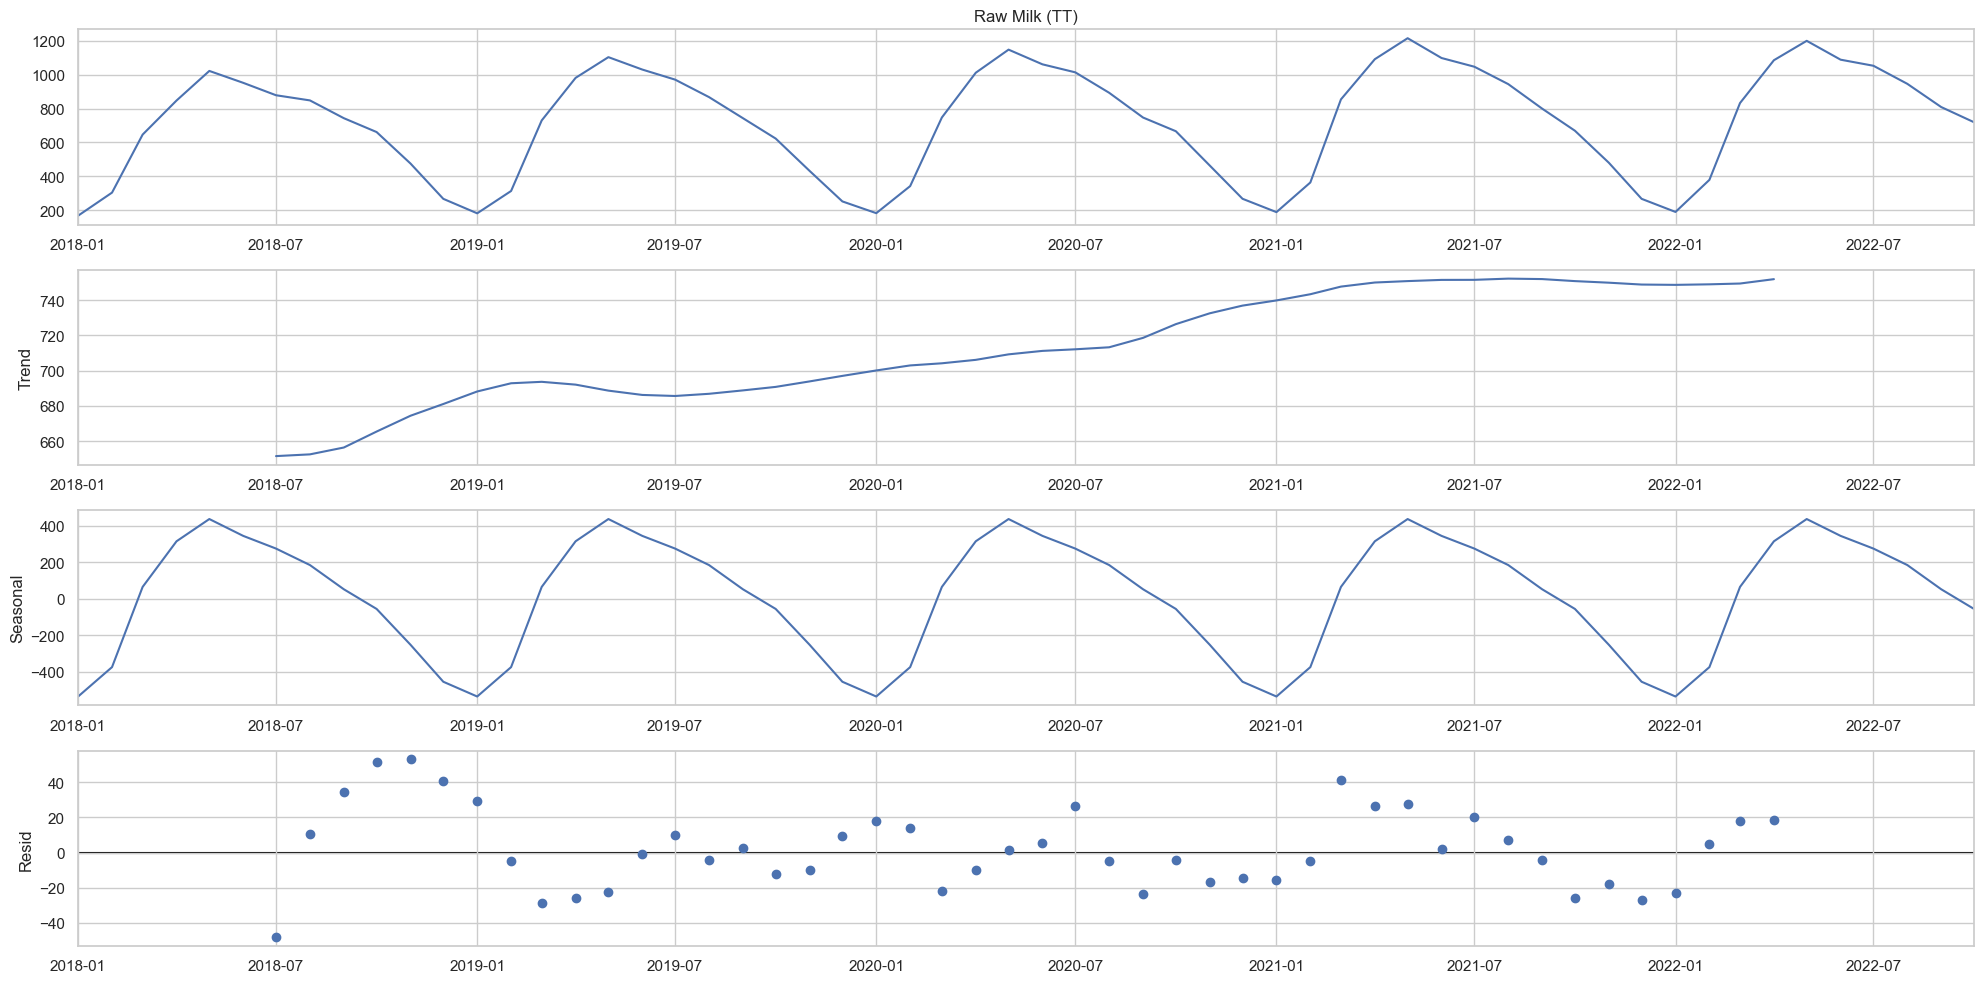

In [433]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [434]:
from statsmodels.tsa.stattools import adfuller

In [596]:
print('Dickey-Fuller Test Raw Milk')
dftest = adfuller(forecast_df['Raw Milk (TT)'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Dickey-Fuller Test Raw Milk
Test Statistic                 -1.549919
p-value                         0.508689
#Lags Used                     11.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


stats.ttest_1samp(a= sample, popmean = df_dairy_sample_cleaned['Thousand tonnes'].mean())

alpha = 0.05
if p > alpha:
     print('There is no significant difference from Ireland sample 2018 data to EU population 2022 data (fail to reject H0)')
else:
     print('There is a significant difference from Ireland sample 2018 data to EU population 2022 data (reject H0)')
     
     The test did not find any signficance difference - did or did not stationarity 
     
     

In [436]:
adftest=adfuller(ts)

In [437]:
adftest[1]

0.5086888426428873

In [438]:
len(ts)

58

In [439]:
train=ts[:48]
test=ts[48:]

In [440]:
import warnings
warnings.filterwarnings('ignore')


In [441]:
model=ARIMA(train,order=(9,1,9)).fit()

In [442]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [443]:
error=np.sqrt(mean_squared_error(test,pred))
error

37.90912486866464

In [444]:
test.mean(), np.sqrt(test.var())

(830.2869999999999, 326.8041423663075)

Text(0.5, 1.0, 'Raw Milk (TT)')

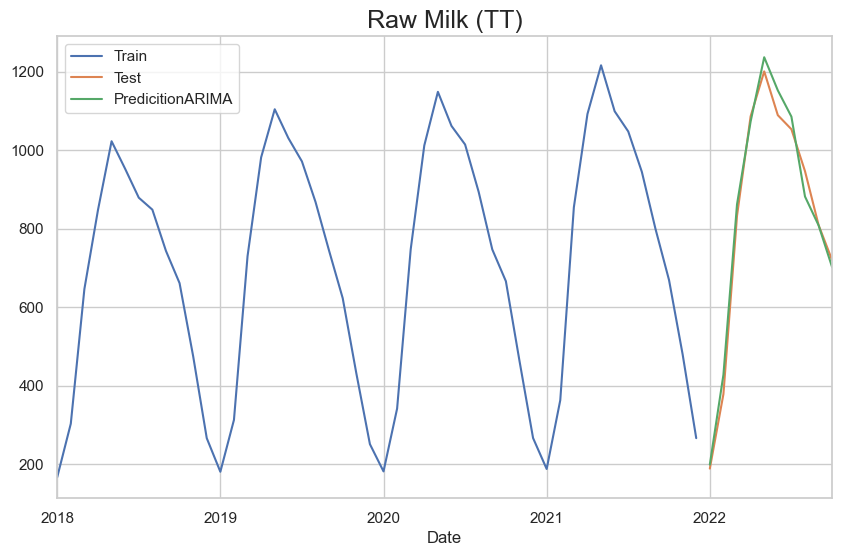

In [445]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='PredicitionARIMA')
plt.title("Raw Milk (TT)",fontsize=18)

In [446]:
final_model=ARIMA(ts,order=(9,1,9)).fit()

In [447]:
print(final_model.summary())

                               SARIMAX Results                                
Dep. Variable:          Raw Milk (TT)   No. Observations:                   58
Model:                 ARIMA(9, 1, 9)   Log Likelihood                -298.141
Date:                Wed, 11 Jan 2023   AIC                            634.281
Time:                        16:48:20   BIC                            673.099
Sample:                    01-01-2018   HQIC                           649.367
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0212      0.053     -0.400      0.689      -0.125       0.083
ar.L2         -0.0245      0.047     -0.520      0.603      -0.117       0.068
ar.L3         -0.9253      0.067    -13.734      0.0

In [448]:
prediction=final_model.predict(len(ts),len(ts)+13)

Text(0.5, 1.0, 'Raw Milk (TT) Prediction')

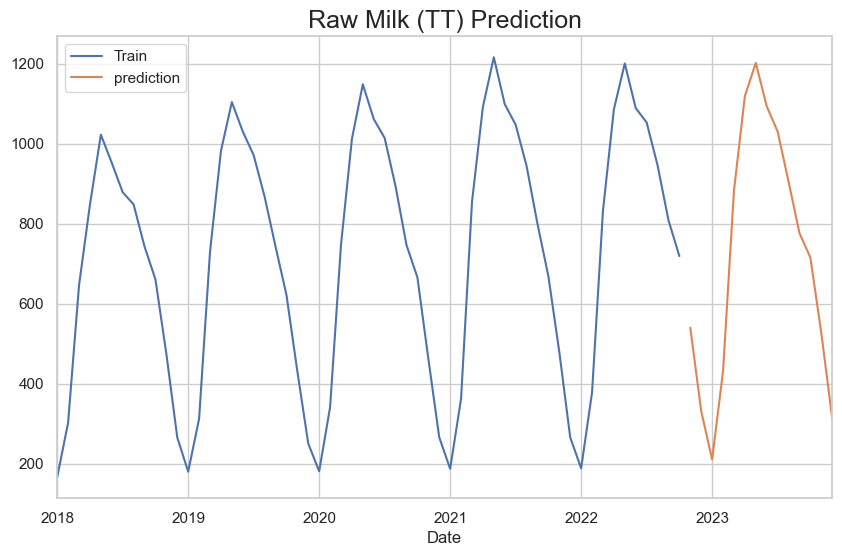

In [449]:
ts.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='prediction')
plt.title("Raw Milk (TT) Prediction",fontsize=18)

In [450]:
prediction.head(18)

2022-11-01     540.111542
2022-12-01     332.000977
2023-01-01     210.892828
2023-02-01     431.585971
2023-03-01     882.248232
2023-04-01    1119.102620
2023-05-01    1202.026885
2023-06-01    1093.582392
2023-07-01    1030.581192
2023-08-01     905.684413
2023-09-01     776.853589
2023-10-01     715.612949
2023-11-01     527.594958
2023-12-01     314.275459
Freq: MS, Name: predicted_mean, dtype: float64

# Butter Forecasting

In [451]:
forecast_df_butter = df_col_merged_4.drop(columns=[' Raw Milk - Price(Euro/100kg) (TT)','Drinking Milk (TT)','Cream (TT)','Raw Milk (TT)'])

In [452]:
ts_butter = forecast_df_butter['Butter (TT)']

<AxesSubplot:xlabel='Date'>

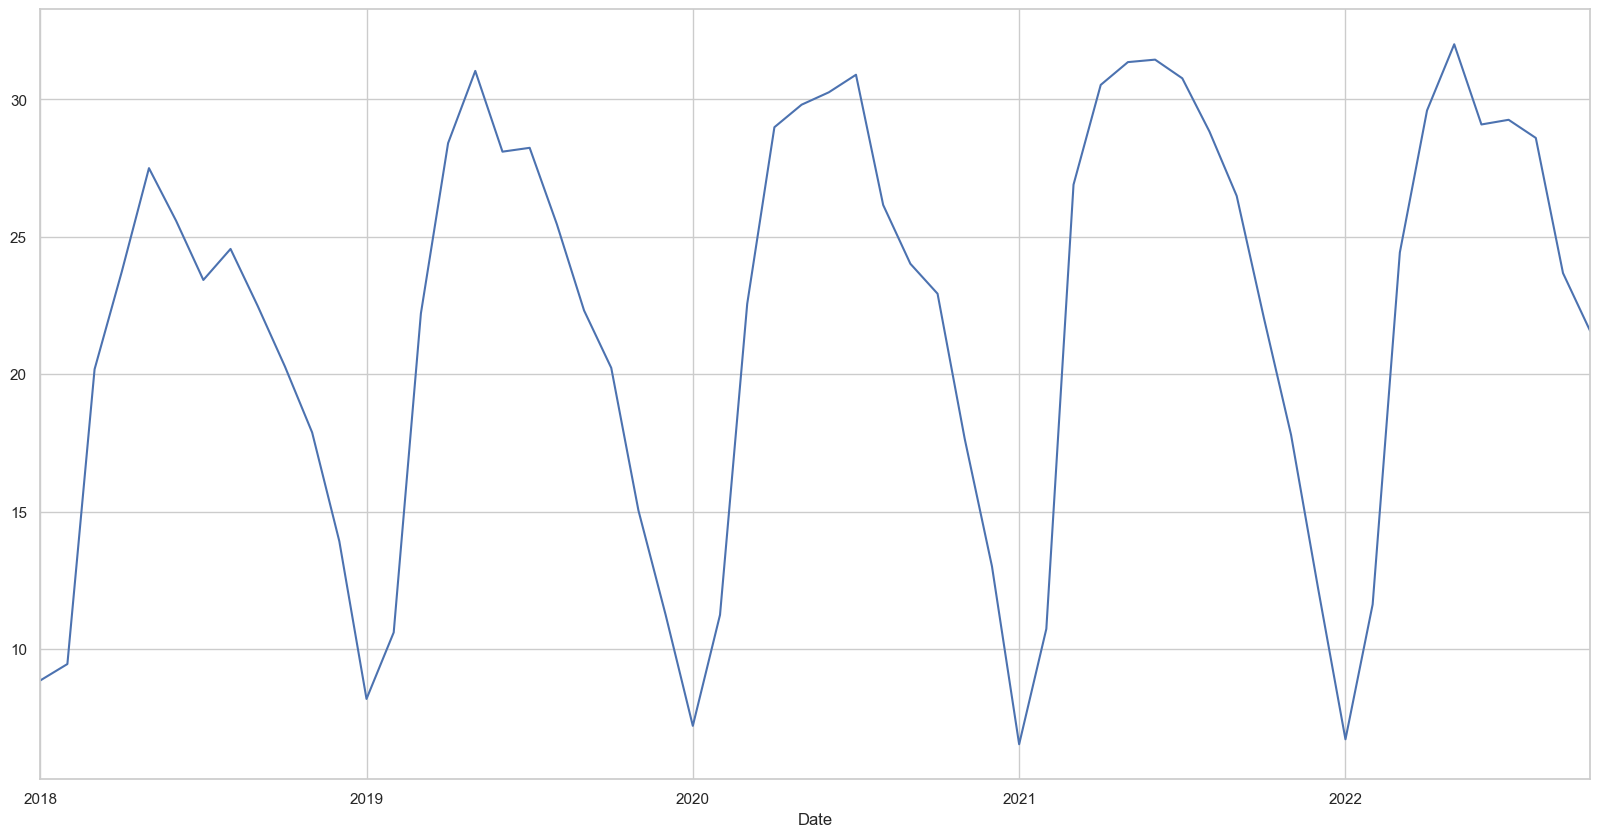

In [453]:
ts_butter.plot()

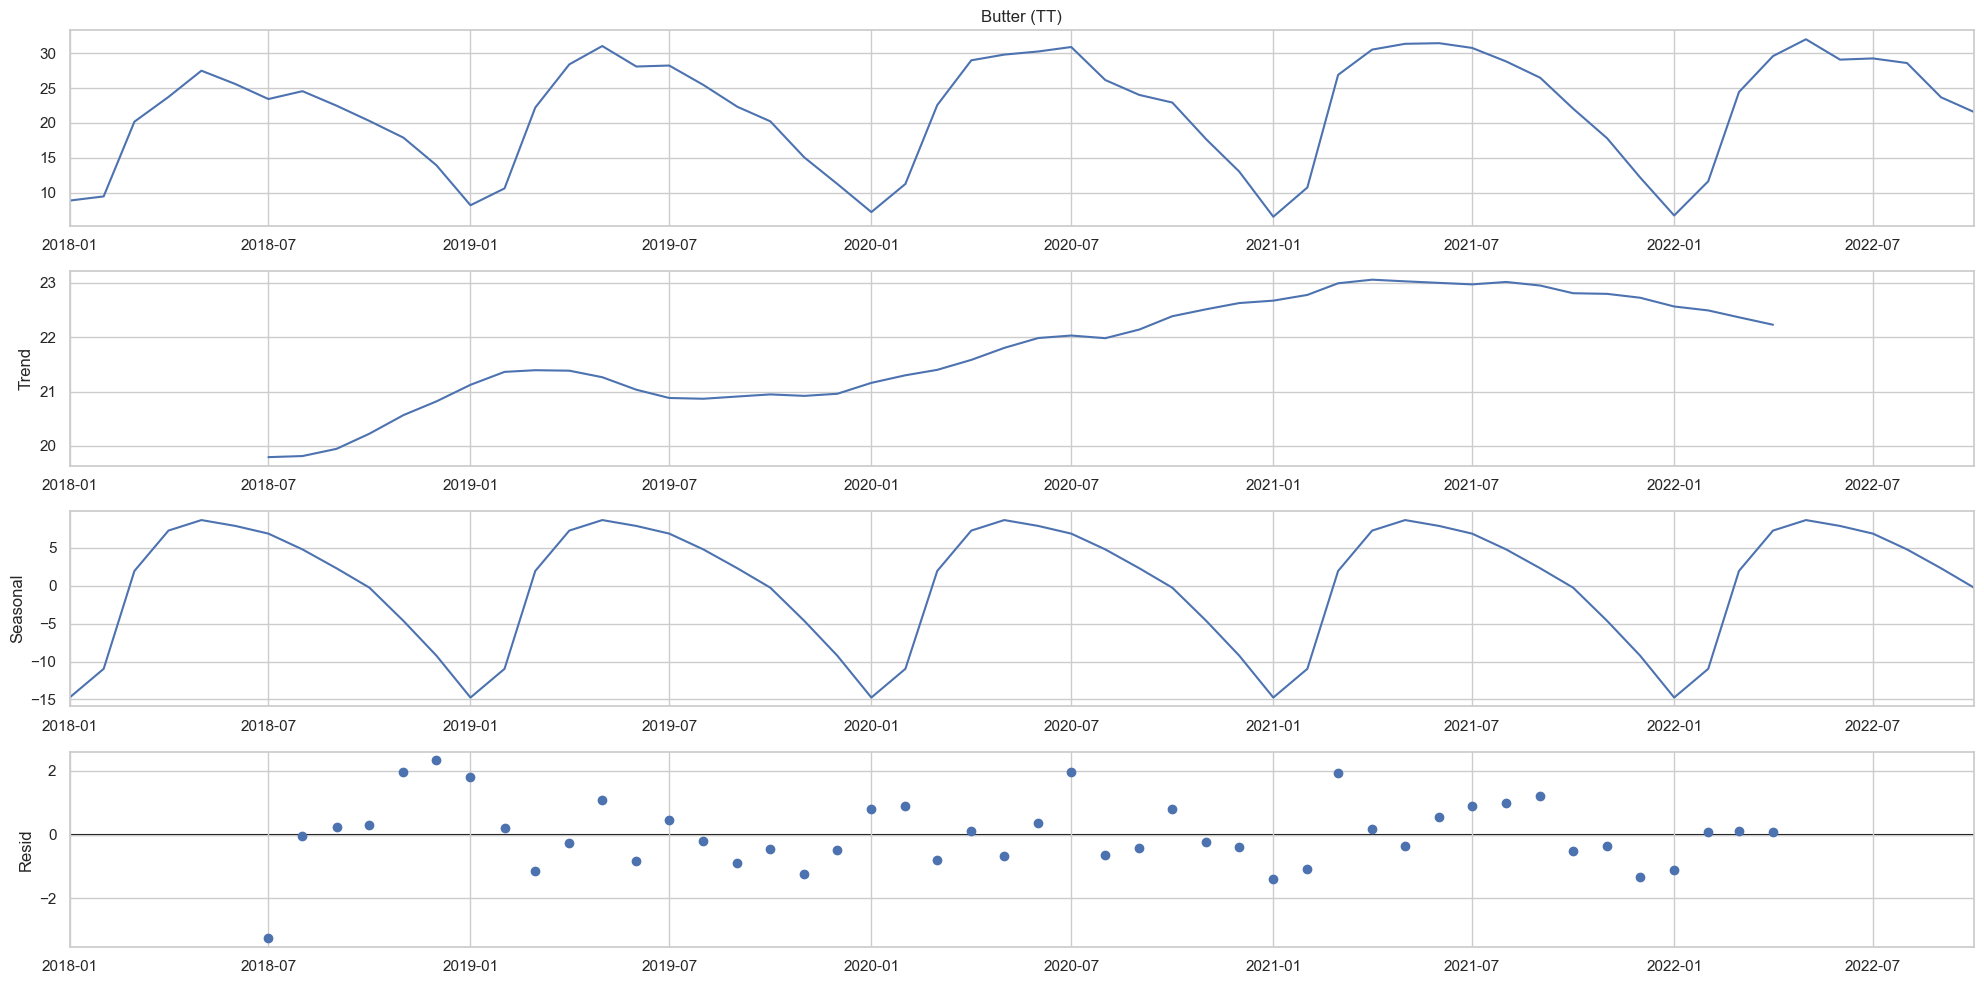

In [454]:
decomposition = sm.tsa.seasonal_decompose(ts_butter, model='additive')
fig = decomposition.plot()
plt.show()

In [598]:
print('Dickey-Fuller Test Butter')
dftest = adfuller(forecast_df_butter['Butter (TT)'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Dickey-Fuller Test Butter
Test Statistic                 -1.939992
p-value                         0.313488
#Lags Used                     11.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [456]:
train_butter=ts_butter[:48]
test_butter=ts_butter[48:]

In [457]:
model=ARIMA(train_butter,order=(6,1,1)).fit()

In [458]:
pred_butter=model.predict(start=len(train_butter),end=(len(ts_butter)-1))

In [459]:
error_butter=np.sqrt(mean_squared_error(test_butter,pred_butter))
error_butter

3.1516780222230545

In [460]:
test_butter.mean(), np.sqrt(test_butter.var())

(23.657, 8.349850364594033)

In [461]:
train_butter.plot(legend=True, label='Train', figsize=(10,6))
test_butter.plot(legend=True, label='Test')
pred_butter.plot(legend=True, label='PredcitionARIMA')
plt.title("Butter (TT)",fontsize=18)

Text(0.5, 1.0, 'Butter (TT)')

In [462]:
final_model=ARIMA(train_butter,order=(6,1,2)).fit()

In [463]:
print(final_model.summary())

                               SARIMAX Results                                
Dep. Variable:            Butter (TT)   No. Observations:                   48
Model:                 ARIMA(6, 1, 2)   Log Likelihood                -114.963
Date:                Wed, 11 Jan 2023   AIC                            247.926
Time:                        16:48:22   BIC                            264.577
Sample:                    01-01-2018   HQIC                           254.192
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5667      0.230      6.824      0.000       1.117       2.017
ar.L2         -1.3461      0.380     -3.540      0.000      -2.091      -0.601
ar.L3          0.5890      0.470      1.253      0.2

In [464]:
prediction_butter=final_model.predict(len(ts_butter),len(ts_butter)+13)

In [465]:
prediction_butter

2022-11-01    15.879202
2022-12-01    13.018152
2023-01-01    13.488973
2023-02-01    16.681559
2023-03-01    21.326844
2023-04-01    26.204096
2023-05-01    30.388457
2023-06-01    33.054013
2023-07-01    33.394730
2023-08-01    31.038610
2023-09-01    26.484891
2023-10-01    21.071648
2023-11-01    16.439323
2023-12-01    13.858606
Freq: MS, Name: predicted_mean, dtype: float64

In [466]:
prediction_butter=final_model.predict(len(ts_butter),len(ts_butter)+13)

Text(0.5, 1.0, 'Butter (TT) Prediction')

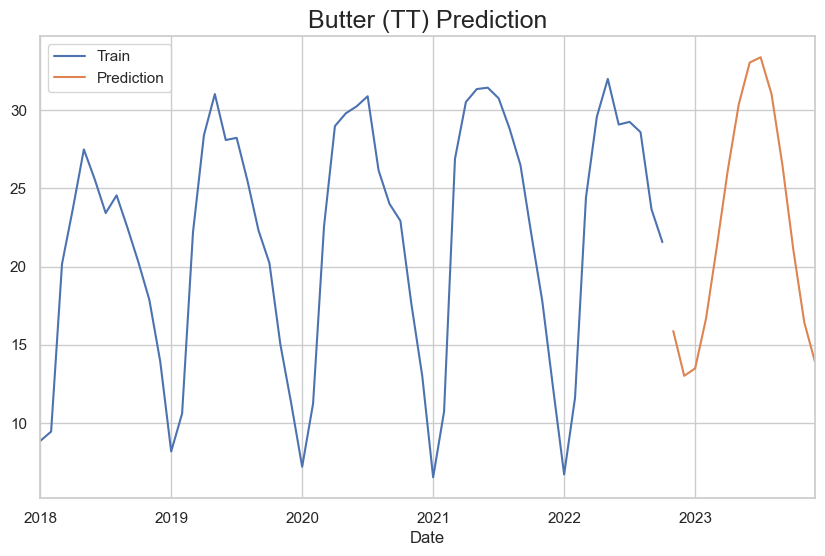

In [467]:
ts_butter.plot(legend=True, label='Train', figsize=(10,6))
prediction_butter.plot(legend=True, label='Prediction')
plt.title("Butter (TT) Prediction",fontsize=18)

In [468]:
prediction_butter

2022-11-01    15.879202
2022-12-01    13.018152
2023-01-01    13.488973
2023-02-01    16.681559
2023-03-01    21.326844
2023-04-01    26.204096
2023-05-01    30.388457
2023-06-01    33.054013
2023-07-01    33.394730
2023-08-01    31.038610
2023-09-01    26.484891
2023-10-01    21.071648
2023-11-01    16.439323
2023-12-01    13.858606
Freq: MS, Name: predicted_mean, dtype: float64

# Drinking Milk Forecasting

In [469]:
forecast_df_drinking_milk = df_col_merged_4.drop(columns=[' Raw Milk - Price(Euro/100kg) (TT)','Butter (TT)','Cream (TT)','Raw Milk (TT)'])

In [470]:
ts_drinking_milk = forecast_df_drinking_milk['Drinking Milk (TT)']

In [471]:
forecast_df_drinking_milk['Drinking Milk (TT)'].tail()

Date
2022-06-01    44.34
2022-07-01    43.81
2022-08-01    44.43
2022-09-01    42.69
2022-10-01    42.79
Name: Drinking Milk (TT), dtype: float64

In [472]:
ts_drinking_milk.plot()

<AxesSubplot:xlabel='Date'>

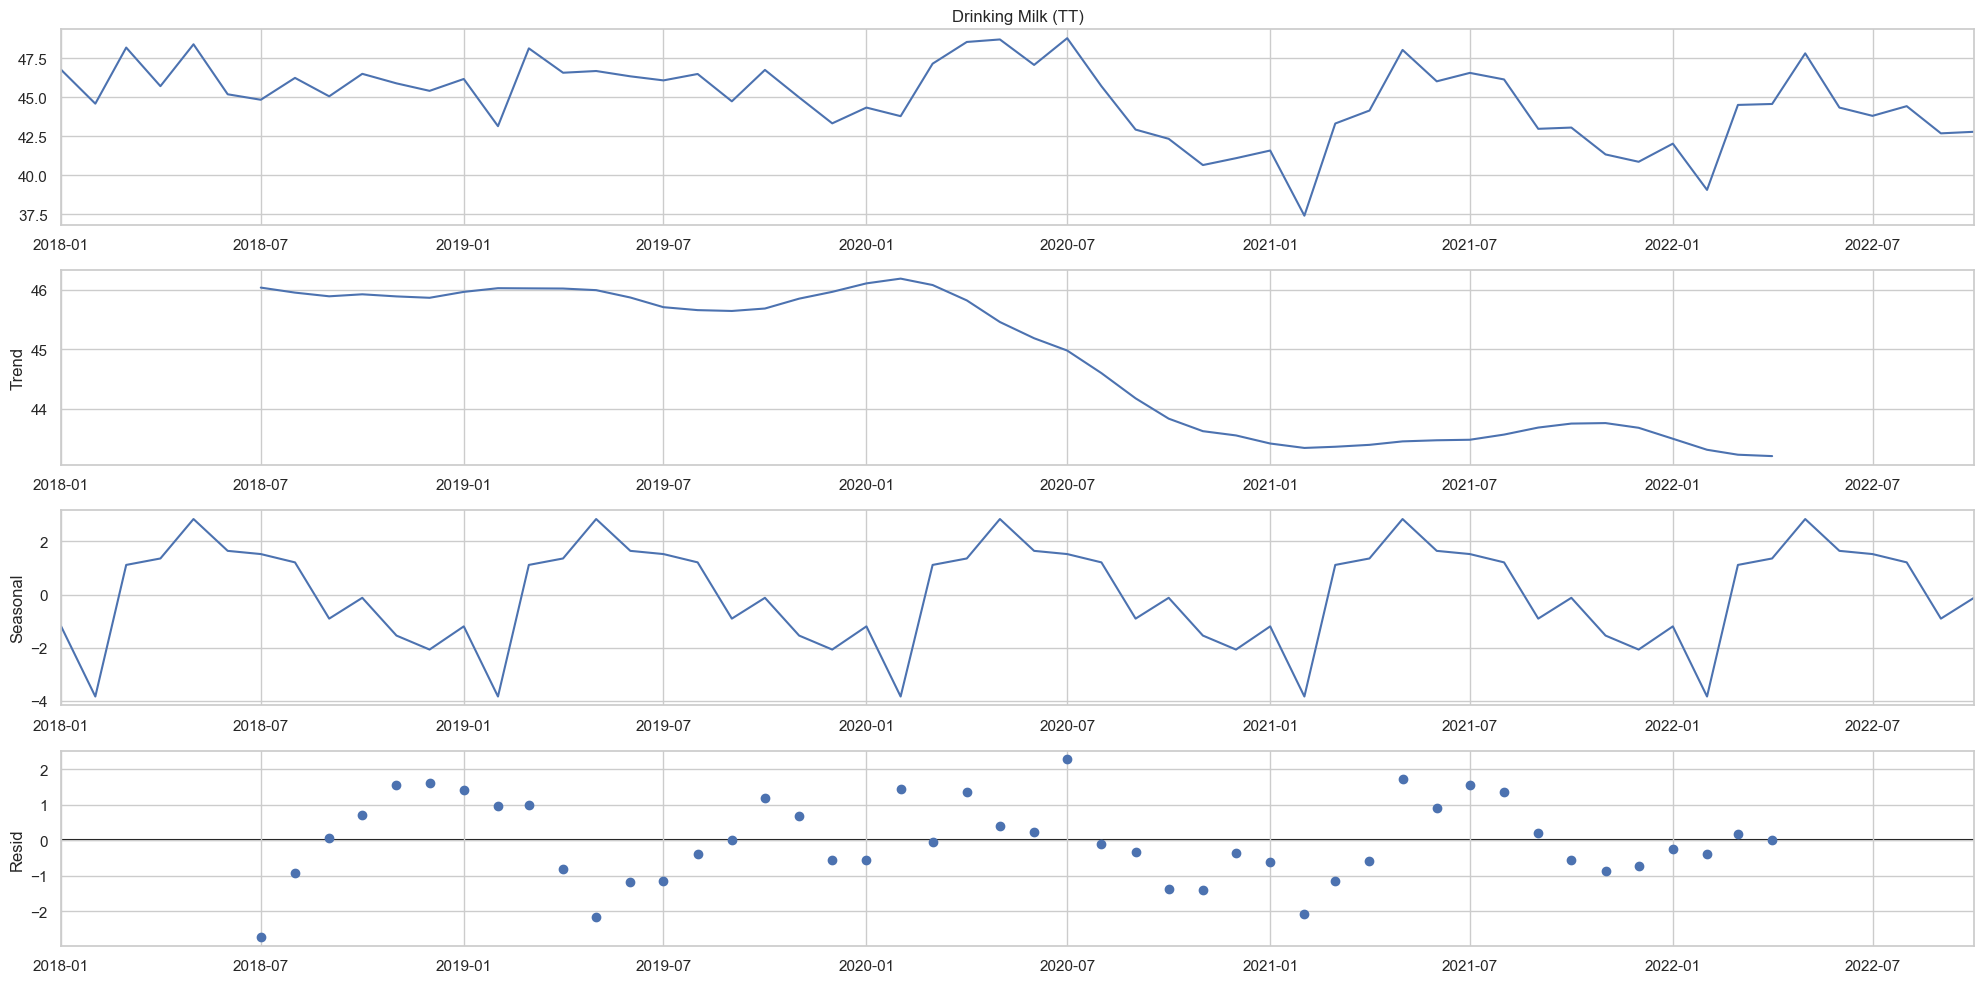

In [473]:
decomposition = sm.tsa.seasonal_decompose(ts_drinking_milk, model='additive')
fig = decomposition.plot()
plt.show()

In [599]:
print('Dickey-Fuller Test Drinking Milk')
dftest = adfuller(forecast_df_drinking_milk['Drinking Milk (TT)'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Dickey-Fuller Test Drinking Milk
Test Statistic                 -0.306266
p-value                         0.924612
#Lags Used                     11.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [475]:
train_drinking_milk=ts_drinking_milk[:48]
test_drinking_milk=ts_drinking_milk[48:]

In [476]:
model=ARIMA(train_drinking_milk,order=(8,1,2)).fit()

In [477]:
pred_drinking_milk=model.predict(start=len(train_drinking_milk),end=(len(ts_drinking_milk)-1))

In [478]:
pred_drinking_milk

2022-01-01    40.300293
2022-02-01    40.777498
2022-03-01    42.573220
2022-04-01    43.652586
2022-05-01    45.568223
2022-06-01    45.892450
2022-07-01    45.879780
2022-08-01    45.048886
2022-09-01    43.779677
2022-10-01    42.850154
Freq: MS, Name: predicted_mean, dtype: float64

In [479]:
error_butter=np.sqrt(mean_squared_error(test_drinking_milk,pred_drinking_milk))
error_butter

1.542526788911699

In [480]:
test_drinking_milk.mean(), np.sqrt(test_drinking_milk.var())

(43.605000000000004, 2.242108382750487)

Text(0.5, 1.0, 'Drinking Milk (TT)')

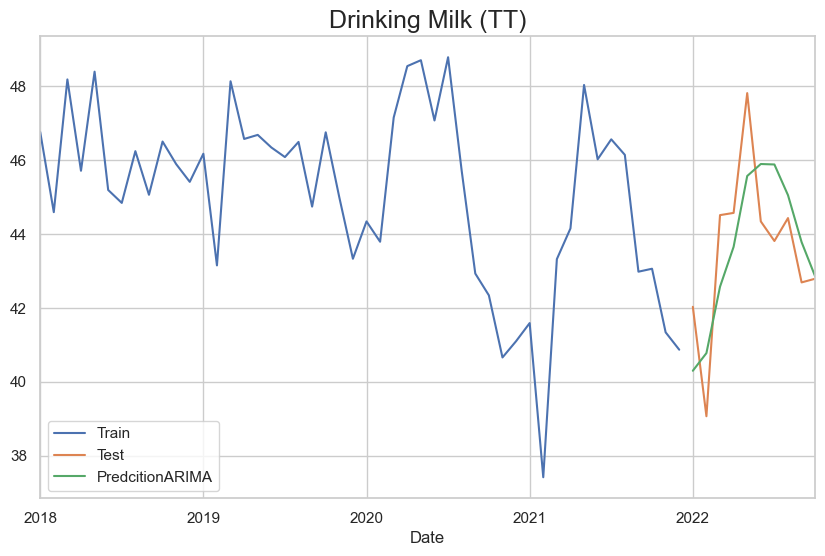

In [481]:
train_drinking_milk.plot(legend=True, label='Train', figsize=(10,6))
test_drinking_milk.plot(legend=True, label='Test')
pred_drinking_milk.plot(legend=True, label='PredcitionARIMA')
plt.title("Drinking Milk (TT)",fontsize=18)

In [482]:
final_model=ARIMA(train_drinking_milk,order=(8,1,2)).fit()

In [483]:
print(final_model.summary())

                               SARIMAX Results                                
Dep. Variable:     Drinking Milk (TT)   No. Observations:                   48
Model:                 ARIMA(8, 1, 2)   Log Likelihood                 -89.692
Date:                Wed, 11 Jan 2023   AIC                            201.383
Time:                        16:48:26   BIC                            221.735
Sample:                    01-01-2018   HQIC                           209.042
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7311      0.312      2.346      0.019       0.120       1.342
ar.L2         -0.1740      0.299     -0.582      0.561      -0.760       0.412
ar.L3         -0.4003      0.247     -1.621      0.1

In [484]:
prediction_drinking_milk=final_model.predict(len(ts_drinking_milk),len(ts_drinking_milk)+13)

In [485]:
prediction_drinking_milk

2022-11-01    41.629354
2022-12-01    41.258916
2023-01-01    41.074425
2023-02-01    41.650377
2023-03-01    42.669681
2023-04-01    43.745384
2023-05-01    44.840538
2023-06-01    45.243855
2023-07-01    45.265047
2023-08-01    44.648651
2023-09-01    43.775350
2023-10-01    42.860133
2023-11-01    42.037320
2023-12-01    41.660899
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Drinking Milk (TT) Prediction')

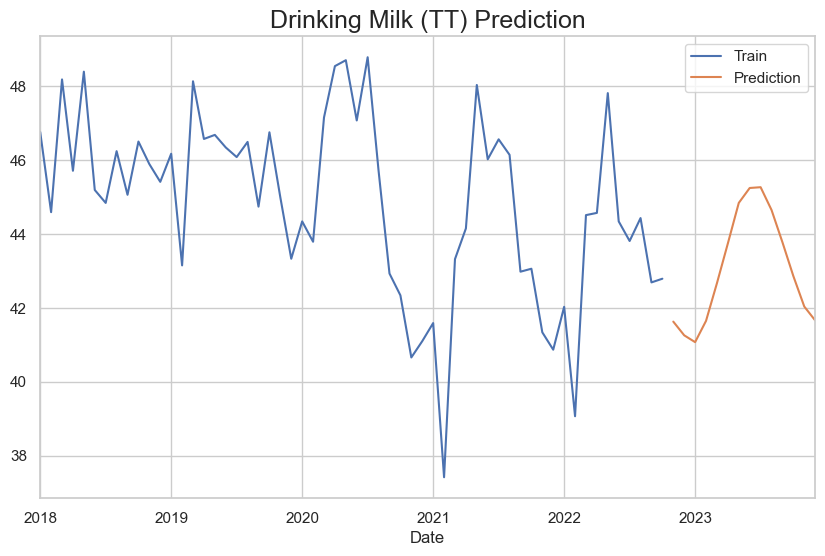

In [486]:
ts_drinking_milk.plot(legend=True, label='Train', figsize=(10,6))
prediction_drinking_milk.plot(legend=True, label='Prediction')
plt.title("Drinking Milk (TT) Prediction",fontsize=18)

# Cream Forecasting

In [487]:
forecast_df_cream = df_col_merged_4.drop(columns=[' Raw Milk - Price(Euro/100kg) (TT)','Butter (TT)','Drinking Milk (TT)','Raw Milk (TT)'])

In [488]:
ts_cream = forecast_df_cream['Cream (TT)']

<AxesSubplot:xlabel='Date'>

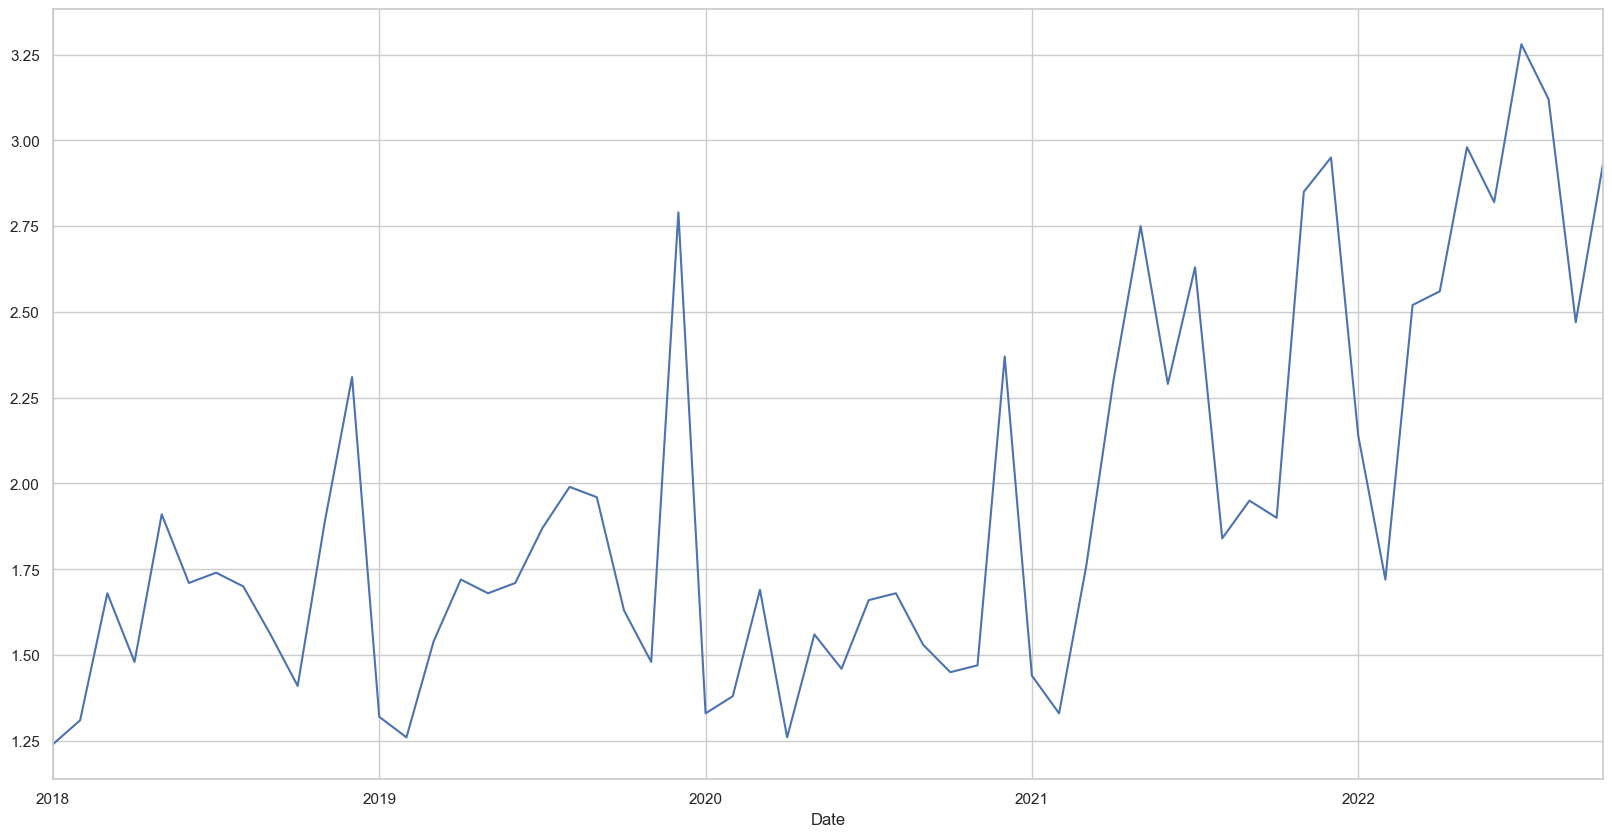

In [489]:
ts_cream.plot()

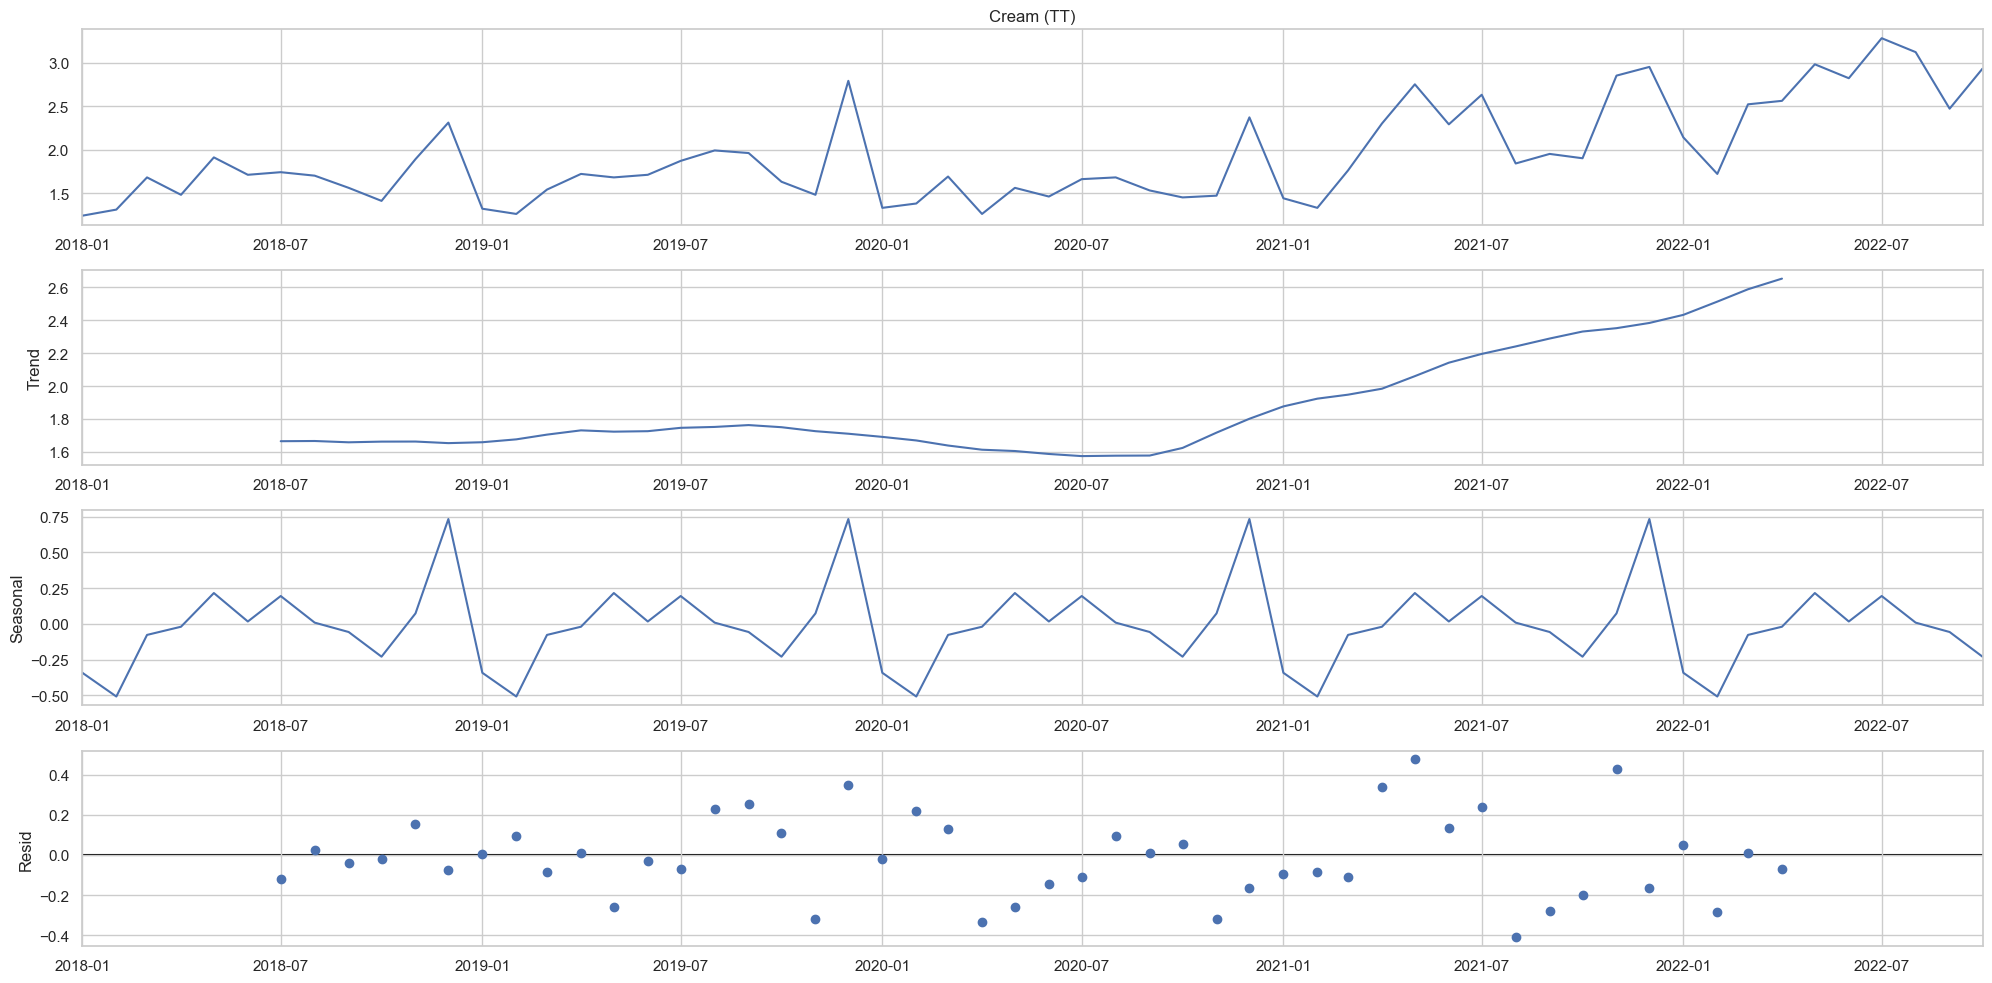

In [490]:
decomposition = sm.tsa.seasonal_decompose(ts_cream, model='additive')
fig = decomposition.plot()
plt.show()

In [600]:
print('Dickey-Fuller Test Cream')
dftest = adfuller(forecast_df_cream['Cream (TT)'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Dickey-Fuller Test Cream
Test Statistic                  1.778546
p-value                         0.998306
#Lags Used                     11.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [492]:
train_cream=ts_cream[:48]
test_cream=ts_cream[48:]

In [493]:
model=ARIMA(train_cream,order=(10,1,5)).fit()

In [494]:
pred_cream=model.predict(start=len(train_cream),end=(len(ts_cream)-1))

In [495]:
error_cream=np.sqrt(mean_squared_error(test_cream,pred_cream))
error_cream

0.5874061937925337

In [496]:
test_cream.mean(), np.sqrt(test_cream.var())

(2.6540000000000004, 0.47331455361806346)

In [497]:
train_cream.plot(legend=True, label='Train', figsize=(10,6))
test_cream.plot(legend=True, label='Test')
pred_cream.plot(legend=True, label='PredcitionARIMA')
plt.title("Cream (TT)",fontsize=18)

Text(0.5, 1.0, 'Cream (TT)')

In [498]:
final_model=ARIMA(train_cream,order=(9,1,3)).fit()

In [499]:
print(final_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Cream (TT)   No. Observations:                   48
Model:                 ARIMA(9, 1, 3)   Log Likelihood                 -13.144
Date:                Wed, 11 Jan 2023   AIC                             52.287
Time:                        16:48:29   BIC                             76.339
Sample:                    01-01-2018   HQIC                            61.338
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8866      0.375     -2.362      0.018      -1.622      -0.151
ar.L2         -1.4430      0.452     -3.190      0.001      -2.330      -0.556
ar.L3         -1.0473      0.668     -1.568      0.1

In [500]:
prediction_cream=final_model.predict(len(ts_cream),len(ts_cream)+13)

Text(0.5, 1.0, 'Cream (TT) Prediction')

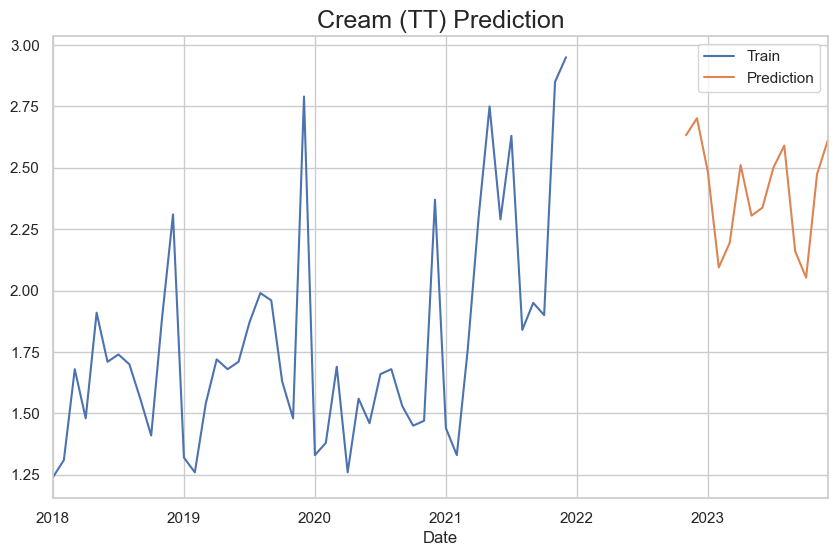

In [501]:
train_cream.plot(legend=True, label='Train', figsize=(10,6))
prediction_cream.plot(legend=True, label='Prediction')
plt.title("Cream (TT) Prediction",fontsize=18)

In [502]:
df_col_merged_4.head()

Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
Date                                                                 
2018-01-01                                39.4               46.76   
2018-02-01                                37.0               44.59   
2018-03-01                                33.3               48.18   
2018-04-01                                31.1               45.71   
2018-05-01                                31.2               48.39   

            Raw Milk (TT)  Cream (TT)  Butter (TT)  
Date                                                
2018-01-01         166.56        1.24         8.85  
2018-02-01         302.97        1.31         9.45  
2018-03-01         646.08        1.68        20.18  
2018-04-01         847.51        1.48        23.73  
2018-05-01        1022.56        1.91        27.50

In [503]:
df_col_merged_5 = df_col_merged_4.copy()

In [504]:
all_predictions = pd.DataFrame(columns=['Drinking Milk (TT)','Raw Milk (TT)','Cream (TT)','Butter (TT)'])

In [505]:
all_predictions['Raw Milk (TT)'] = prediction

In [506]:
all_predictions.head()

Drinking Milk (TT)  Raw Milk (TT) Cream (TT) Butter (TT)
2022-11-01                NaN     540.111542        NaN         NaN
2022-12-01                NaN     332.000977        NaN         NaN
2023-01-01                NaN     210.892828        NaN         NaN
2023-02-01                NaN     431.585971        NaN         NaN
2023-03-01                NaN     882.248232        NaN         NaN

In [507]:
all_predictions['Drinking Milk (TT)'] = prediction_drinking_milk

In [508]:
all_predictions.head()

Drinking Milk (TT)  Raw Milk (TT) Cream (TT) Butter (TT)
2022-11-01           41.629354     540.111542        NaN         NaN
2022-12-01           41.258916     332.000977        NaN         NaN
2023-01-01           41.074425     210.892828        NaN         NaN
2023-02-01           41.650377     431.585971        NaN         NaN
2023-03-01           42.669681     882.248232        NaN         NaN

In [509]:
all_predictions['Cream (TT)'] = prediction_cream

In [510]:
all_predictions.head()

Drinking Milk (TT)  Raw Milk (TT)  Cream (TT) Butter (TT)
2022-11-01           41.629354     540.111542    2.632594         NaN
2022-12-01           41.258916     332.000977    2.701728         NaN
2023-01-01           41.074425     210.892828    2.482988         NaN
2023-02-01           41.650377     431.585971    2.094200         NaN
2023-03-01           42.669681     882.248232    2.194782         NaN

In [511]:
all_predictions['Butter (TT)'] = prediction_butter

In [512]:
all_predictions.head(20)

Drinking Milk (TT)  Raw Milk (TT)  Cream (TT)  Butter (TT)
2022-11-01           41.629354     540.111542    2.632594    15.879202
2022-12-01           41.258916     332.000977    2.701728    13.018152
2023-01-01           41.074425     210.892828    2.482988    13.488973
2023-02-01           41.650377     431.585971    2.094200    16.681559
2023-03-01           42.669681     882.248232    2.194782    21.326844
2023-04-01           43.745384    1119.102620    2.511021    26.204096
2023-05-01           44.840538    1202.026885    2.305374    30.388457
2023-06-01           45.243855    1093.582392    2.337696    33.054013
2023-07-01           45.265047    1030.581192    2.500284    33.394730
2023-08-01           44.648651     905.684413    2.590476    31.038610
2023-09-01           43.775350     776.853589    2.159813    26.484891
2023-10-01           42.860133     715.612949    2.052649    21.071648
2023-11-01           42.037320     527.594958    2.473551    16.439323
2023-12-01           41.660899     314.275459    2.613435    13.858606

In [513]:
df_col_merged_6 = df_col_merged_5.drop(columns=' Raw Milk - Price(Euro/100kg) (TT)')

In [514]:
df_col_merged_7 = df_col_merged_6.append(all_predictions)

In [515]:
prices_dataframe = pd.DataFrame(columns=[ 'Raw Milk - Price(Euro/100kg) (TT)']) 

In [516]:
prices_dataframe['Raw Milk - Price(Euro/100kg) (TT)'] = df_col_merged_5[ ' Raw Milk - Price(Euro/100kg) (TT)']

In [517]:
prices_dataframe.head()

Raw Milk - Price(Euro/100kg) (TT)
Date                                         
2018-01-01                               39.4
2018-02-01                               37.0
2018-03-01                               33.3
2018-04-01                               31.1
2018-05-01                               31.2

# Using Forecasted dairy production as input, predict using Decision Tree

In [518]:
dt_pred_price=dt_model.predict(all_predictions)

In [519]:
dt_pred_price

array([42.38      , 42.38      , 42.38      , 42.38      , 36.85      ,
       36.85      , 37.36666667, 37.36666667, 37.36666667, 37.36666667,
       42.38      , 42.38      , 42.38      , 42.38      ])

In [520]:
df_pred_price = pd.DataFrame({'Predicted Price Decision Tree': dt_pred_price}) 

In [521]:
df_pred_price.head(20)

Predicted Price Decision Tree
0                       42.380000
1                       42.380000
2                       42.380000
3                       42.380000
4                       36.850000
5                       36.850000
6                       37.366667
7                       37.366667
8                       37.366667
9                       37.366667
10                      42.380000
11                      42.380000
12                      42.380000
13                      42.380000

In [522]:
all_predictions

Drinking Milk (TT)  Raw Milk (TT)  Cream (TT)  Butter (TT)
2022-11-01           41.629354     540.111542    2.632594    15.879202
2022-12-01           41.258916     332.000977    2.701728    13.018152
2023-01-01           41.074425     210.892828    2.482988    13.488973
2023-02-01           41.650377     431.585971    2.094200    16.681559
2023-03-01           42.669681     882.248232    2.194782    21.326844
2023-04-01           43.745384    1119.102620    2.511021    26.204096
2023-05-01           44.840538    1202.026885    2.305374    30.388457
2023-06-01           45.243855    1093.582392    2.337696    33.054013
2023-07-01           45.265047    1030.581192    2.500284    33.394730
2023-08-01           44.648651     905.684413    2.590476    31.038610
2023-09-01           43.775350     776.853589    2.159813    26.484891
2023-10-01           42.860133     715.612949    2.052649    21.071648
2023-11-01           42.037320     527.594958    2.473551    16.439323
2023-12-01           41.660899     314.275459    2.613435    13.858606

In [523]:
lin_reg_pred = lin_lm.predict(all_predictions)

In [524]:
lin_reg_pred

array([41.75850438, 43.88136002, 45.12903609, 41.61768033, 37.05345855,
       36.36655342, 35.53062916, 38.11334035, 39.75422445, 41.2258396 ,
       39.95630572, 38.58261228, 41.27247318, 43.87255606])

In [525]:
df_col_merged_4.head()

Raw Milk - Price(Euro/100kg) (TT)  Drinking Milk (TT)  \
Date                                                                 
2018-01-01                                39.4               46.76   
2018-02-01                                37.0               44.59   
2018-03-01                                33.3               48.18   
2018-04-01                                31.1               45.71   
2018-05-01                                31.2               48.39   

            Raw Milk (TT)  Cream (TT)  Butter (TT)  
Date                                                
2018-01-01         166.56        1.24         8.85  
2018-02-01         302.97        1.31         9.45  
2018-03-01         646.08        1.68        20.18  
2018-04-01         847.51        1.48        23.73  
2018-05-01        1022.56        1.91        27.50

In [526]:
final_df_totals = pd.DataFrame(columns=['Drinking Milk (TT)','Raw Milk (TT)','Cream (TT)','Butter (TT)'])

In [527]:
final_df_totals = df_col_merged_7.groupby(df_col_merged_7.index.year)['Raw Milk (TT)', 'Drinking Milk (TT)','Cream (TT)','Butter (TT)'].sum()

In [528]:
df_col_merged_7.tail()

Drinking Milk (TT)  Raw Milk (TT)  Cream (TT)  Butter (TT)
2023-08-01           44.648651     905.684413    2.590476    31.038610
2023-09-01           43.775350     776.853589    2.159813    26.484891
2023-10-01           42.860133     715.612949    2.052649    21.071648
2023-11-01           42.037320     527.594958    2.473551    16.439323
2023-12-01           41.660899     314.275459    2.613435    13.858606

In [529]:
final_df_totals.head(8)

Raw Milk (TT)  Drinking Milk (TT)  Cream (TT)  Butter (TT)
2018    7810.240000           552.76000   19.940000   237.840000
2019    8226.620000           549.42000   20.950000   251.070000
2020    8542.270000           541.11000   18.840000   264.720000
2021    9018.370000           521.48000   25.990000   275.600000
2022    9174.982520           518.93827   31.874322   265.467353
2023    9210.041489           519.47166   28.316268   283.431750

# Interactive Visualisations

In [530]:
from ipywidgets import interact

In [531]:
import altair as alt 

In [532]:
import matplotlib as mpl

In [533]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [534]:
import plotly.express as px

In [535]:
def multi_plot(df, title, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Scatter(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
         yaxis_type="log"       
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800,
        width=1200
        
    )
    fig.update_layout(legend_title_text = "Dairy Product")
    fig.update_xaxes(title_text="Year")
    fig.update_yaxes(title_text="Product Produced (TT)")
    fig.show()
    
multi_plot(final_df_totals, title="Total Dairy Produced Yearly (TT) by Category")    

In [536]:
def multi_plot(df, title, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Scatter(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
         yaxis_type="log"       
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800,
        width=1200
      
        
    )
    fig.update_layout(legend_title_text = "Dairy Product")
    fig.update_xaxes(title_text="Year")
    fig.update_yaxes(title_text="Product Produced (TT)")
    fig.show()
    
multi_plot(df_col_merged_7, title="Total Dairy Produced Monthly (TT) by Category")    

In [537]:

import plotly.express as px



fig = px.bar(final_df_totals, x=final_df_totals.index, y=["Raw Milk (TT)","Drinking Milk (TT)","Cream (TT)","Butter (TT)"], title="Total Dairy Produced Yearly (TT) by Category")
fig.update_layout(legend_title_text = "Product")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Product Produced (TT)")

fig.show()

In [538]:
all_predictions = pd.DataFrame(columns=['Drinking Milk (TT)','Raw Milk (TT)','Cream (TT)','Butter (TT)'])

In [539]:
predicted_prices_for_plot = pd.DataFrame(columns=['Raw Milk - Price(Euro/100kg)'])

In [540]:
predicted_prices_for_plot['Raw Milk - Price(Euro/100kg)'] = df_col_merged_4[" Raw Milk - Price(Euro/100kg) (TT)"]

In [541]:
predicted_prices_for_plot.tail()

Raw Milk - Price(Euro/100kg)
Date                                    
2022-06-01                          55.5
2022-07-01                          57.8
2022-08-01                          59.7
2022-09-01                          64.3
2022-10-01                          68.5

In [542]:
predicted_prices_for_plot.reset_index(drop=True, inplace=True)

In [543]:
predicted_prices_for_plot.head()

Raw Milk - Price(Euro/100kg)
0                          39.4
1                          37.0
2                          33.3
3                          31.1
4                          31.2

In [544]:
dt_pred_price

array([42.38      , 42.38      , 42.38      , 42.38      , 36.85      ,
       36.85      , 37.36666667, 37.36666667, 37.36666667, 37.36666667,
       42.38      , 42.38      , 42.38      , 42.38      ])

In [545]:
df_dt_pred_price = pd.DataFrame (dt_pred_price, columns = ['Raw Milk - Price(Euro/100kg)'])

In [546]:
df_dt_pred_price.head()

Raw Milk - Price(Euro/100kg)
0                         42.38
1                         42.38
2                         42.38
3                         42.38
4                         36.85

In [547]:
predicted_prices_for_plot_2 = predicted_prices_for_plot.append(df_dt_pred_price)

In [548]:
predicted_prices_for_plot_2.rename(columns = {'Raw Milk - Price(Euro/100kg)':'Decision Tree Prediction'}, inplace = True)

In [549]:
predicted_prices_for_plot_2.head()

Decision Tree Prediction
0                      39.4
1                      37.0
2                      33.3
3                      31.1
4                      31.2

In [550]:
df_column_2 = pd.DataFrame(columns=['Raw Milk - Price(Euro/100kg)'])

In [551]:
df_column_2['Raw Milk - Price(Euro/100kg)'] = df_col_merged_4[" Raw Milk - Price(Euro/100kg) (TT)"]

In [552]:
df_column_2.reset_index(drop=True, inplace=True)

In [553]:
df_column_2.head()

Raw Milk - Price(Euro/100kg)
0                          39.4
1                          37.0
2                          33.3
3                          31.1
4                          31.2

In [554]:
df_column_2.head()

Raw Milk - Price(Euro/100kg)
0                          39.4
1                          37.0
2                          33.3
3                          31.1
4                          31.2

In [555]:
df_lin_reg_pred = pd.DataFrame(lin_reg_pred, columns = ['Raw Milk - Price(Euro/100kg)'])

In [556]:
df_column_3 = df_column_2.append(df_lin_reg_pred)

In [557]:
df_column_3.reset_index(drop=True, inplace=True)

In [558]:
df_column_3.rename(columns = {'Raw Milk - Price(Euro/100kg)':'Linear Regression Prediction'}, inplace = True)

In [559]:
df_column_3.head()

Linear Regression Prediction
0                          39.4
1                          37.0
2                          33.3
3                          31.1
4                          31.2

In [560]:
predicted_prices_for_plot_2.head()

Decision Tree Prediction
0                      39.4
1                      37.0
2                      33.3
3                      31.1
4                      31.2

In [561]:
df_column_3.reset_index(inplace=True, drop=True)

In [562]:
predicted_prices_for_plot_2.reset_index(inplace=True, drop=True)

In [563]:
df_col_pred_merged = pd.concat([predicted_prices_for_plot_2,df_column_3 ], axis=1)

In [564]:
df_col_pred_merged.head()

Decision Tree Prediction  Linear Regression Prediction
0                      39.4                          39.4
1                      37.0                          37.0
2                      33.3                          33.3
3                      31.1                          31.1
4                      31.2                          31.2

In [634]:
def multi_plot(df, title, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Scatter(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
         yaxis_type="log"       
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800,
        width=1200
      
        
    )
    fig.update_layout(legend_title_text = "Dairy Product")
    fig.update_xaxes(title_text="Month 0 = Jan 2018 - Month 71 = Dec 2023}")
    fig.update_yaxes(title_text="Price)")
    fig.show()
    
multi_plot(df_col_pred_merged, title="Forecasted Price of Raw Milk")    

In [566]:
import plotly.graph_objects as go

# Sentiment Analysis

In [567]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [568]:
train = pd.read_csv("Milk_prices_tweets.csv", encoding= 'unicode_escape')

In [569]:
train.head()

ID                                              Tweet
0   1  We have a WhatsApp group where we monitor the ...
1   2  We got so much information and yet nothing abo...
2   3  Hard hitIrish consumers face shelling out more...
3   4  Hey @circleKireland, can you explain why I was...
4   5  Can someone explain to me why home-produced bu...

In [570]:
train.shape

(5, 2)

In [571]:
train["Tweet"].loc[1]

'We got so much information and yet nothing about the price of the milk or why it had to be raw? Also isn\x92t raw milk a bit dangerous? Like is it pasteurised?'

In [572]:
train["word_count"] = train["Tweet"].apply(lambda x : len(str(x).split(" ")))

In [573]:
train.head()

ID                                              Tweet  word_count
0   1  We have a WhatsApp group where we monitor the ...          16
1   2  We got so much information and yet nothing abo...          32
2   3  Hard hitIrish consumers face shelling out more...          41
3   4  Hey @circleKireland, can you explain why I was...          53
4   5  Can someone explain to me why home-produced bu...          50

Getting the character count for each tweet.

In [574]:
train["char_count"]=train["Tweet"].str.len()

In [575]:
train.head()

ID                                              Tweet  word_count  \
0   1  We have a WhatsApp group where we monitor the ...          16   
1   2  We got so much information and yet nothing abo...          32   
2   3  Hard hitIrish consumers face shelling out more...          41   
3   4  Hey @circleKireland, can you explain why I was...          53   
4   5  Can someone explain to me why home-produced bu...          50   

   char_count  
0          89  
1         156  
2         227  
3         267  
4         273

Finding the average word count for each tweet

In [576]:
def avg_word(sentence):
    words=sentence.split()
    return(sum(len(word) for word in words)/len(words))

In [577]:
train["avg_word"] = train["Tweet"].apply(lambda x : avg_word(x))

In [578]:
train.head()

ID                                              Tweet  word_count  \
0   1  We have a WhatsApp group where we monitor the ...          16   
1   2  We got so much information and yet nothing abo...          32   
2   3  Hard hitIrish consumers face shelling out more...          41   
3   4  Hey @circleKireland, can you explain why I was...          53   
4   5  Can someone explain to me why home-produced bu...          50   

   char_count  avg_word  
0          89  4.625000  
1         156  3.906250  
2         227  4.560976  
3         267  4.134615  
4         273  4.571429

In [579]:
import nltk

In [580]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [581]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

splitting each tweet into individual words - check to see if the they are in the stop library. If it is, store in the stop list

In [582]:
train["stopwords"]=train["Tweet"].apply(lambda x : len([x for x in x.split() if x in stop]))

In [583]:
train.head()

ID                                              Tweet  word_count  \
0   1  We have a WhatsApp group where we monitor the ...          16   
1   2  We got so much information and yet nothing abo...          32   
2   3  Hard hitIrish consumers face shelling out more...          41   
3   4  Hey @circleKireland, can you explain why I was...          53   
4   5  Can someone explain to me why home-produced bu...          50   

   char_count  avg_word  stopwords  
0          89  4.625000          7  
1         156  3.906250         15  
2         227  4.560976         15  
3         267  4.134615         22  
4         273  4.571429         20

splitting each tweet into individual words - if there are any hashtags, add them to list

In [584]:
train["hashtags"]=train["Tweet"].apply(lambda x : len([x for x in x.split() if x.startswith("#")]))

In [585]:
train.head()

ID                                              Tweet  word_count  \
0   1  We have a WhatsApp group where we monitor the ...          16   
1   2  We got so much information and yet nothing abo...          32   
2   3  Hard hitIrish consumers face shelling out more...          41   
3   4  Hey @circleKireland, can you explain why I was...          53   
4   5  Can someone explain to me why home-produced bu...          50   

   char_count  avg_word  stopwords  hashtags  
0          89  4.625000          7         0  
1         156  3.906250         15         0  
2         227  4.560976         15         0  
3         267  4.134615         22         0  
4         273  4.571429         20         0

splitting each tweet into individual words - if there are any upper case characters, add them to list

In [586]:
train["upper"]=train["Tweet"].apply(lambda x : len([x for x in x.split() if x.isupper()]))

In [587]:
train.head()

ID                                              Tweet  word_count  \
0   1  We have a WhatsApp group where we monitor the ...          16   
1   2  We got so much information and yet nothing abo...          32   
2   3  Hard hitIrish consumers face shelling out more...          41   
3   4  Hey @circleKireland, can you explain why I was...          53   
4   5  Can someone explain to me why home-produced bu...          50   

   char_count  avg_word  stopwords  hashtags  upper  
0          89  4.625000          7         0      1  
1         156  3.906250         15         0      0  
2         227  4.560976         15         0      0  
3         267  4.134615         22         0      2  
4         273  4.571429         20         0      0

In [588]:
train["Tweet"] = train["Tweet"].str.replace('[^\w\s]','')

In [589]:
train.head()

ID                                              Tweet  word_count  \
0   1  We have a WhatsApp group where we monitor the ...          16   
1   2  We got so much information and yet nothing abo...          32   
2   3  Hard hitIrish consumers face shelling out more...          41   
3   4  Hey circleKireland can you explain why I was j...          53   
4   5  Can someone explain to me why homeproduced but...          50   

   char_count  avg_word  stopwords  hashtags  upper  
0          89  4.625000          7         0      1  
1         156  3.906250         15         0      0  
2         227  4.560976         15         0      0  
3         267  4.134615         22         0      2  
4         273  4.571429         20         0      0

In [590]:
from textblob import TextBlob

In [591]:
train["Tweet"][:5].apply(lambda x : str(TextBlob(x).correct()))

0    He have a WhatsApp group where we monitor the ...
1    He got so much information and yet nothing abo...
2    Hard hitIrish consumers face shelling out more...
3    Key circleKireland can you explain why I was j...
4    An someone explain to me why homeproduced butt...
Name: Tweet, dtype: object

In [592]:
train["sentiment"] = train["Tweet"].apply(lambda x: TextBlob(x).sentiment[0])

In [593]:
train.head()

ID                                              Tweet  word_count  \
0   1  We have a WhatsApp group where we monitor the ...          16   
1   2  We got so much information and yet nothing abo...          32   
2   3  Hard hitIrish consumers face shelling out more...          41   
3   4  Hey circleKireland can you explain why I was j...          53   
4   5  Can someone explain to me why homeproduced but...          50   

   char_count  avg_word  stopwords  hashtags  upper  sentiment  
0          89  4.625000          7         0      1   0.100000  
1         156  3.906250         15         0      0  -0.215385  
2         227  4.560976         15         0      0  -0.041061  
3         267  4.134615         22         0      2   0.250000  
4         273  4.571429         20         0      0   0.400000